In [1]:
!pip install scikit-optimize

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Functions

In [4]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [5]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    sns.scatterplot(test_label, predicted_dv, color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [6]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [7]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [8]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

# Unhashing

In [9]:
genre_mapping = {'0ef0aa70-f86c-4141-8054-8b39af97867d': 'Biography',
                '287a1485-7a88-4c2f-bc94-ca418b6c47a1': 'Cartoons',
                '66fad8c3-d84f-458d-a8bf-5b4f154969e0': 'Show',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Theater',
                '9fa28b61-a257-4a3e-945b-a9ef76a146d6': 'Fantasy',
                'b0836a1d-635f-4d89-bcc5-25d10ba56642': 'Anime',
                'd7214feb-8c11-4aea-aabb-ac98a8d56fd5': 'History',
                'dc65dbc8-34ba-4df1-b32c-4f895e10bff8': 'Shorts',
                'eb001d27-5be3-4d42-9d88-90d593f2627d': 'War_movies',
                '364fdc2e-bdfe-40be-b2c5-d30f43ec432e': 'Crime'}

In [10]:
types_mapping = {'1f22ccf1-288a-4e6e-b39a-7502799e7125': 'Лекции',
    '6d640e04-be3a-4c8c-852e-4e9b12449d5d': 'Концерты',
    '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Театр',
    '2f7908cc-e2fd-43cf-b626-ec1aef436160': 'Курсы' }

In [5]:
import pickle

with open('./income_target.pkl', 'rb') as f:
    df = pickle.load(f, encoding='utf-8')

In [6]:
df.head().T

0  \
actor               [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 39124be...   
age_access_type                                                    16   
country                                                         [usa]   
average_rating                                                    NaN   
duration                                                      5280000   
type                                                            MOVIE   
name                                                 Роман с кукушкой   
release_year                                                     2021   
genre                                      [Comedy, Melodrama, Drama]   
director                       [f5fba6fe-94b3-4e69-acfc-da6867320386]   
element_uid                      a367ca50-ef7d-4a4c-b89a-c8692defa697   
subscription_only                                               False   
av_rate_x                                                    0.010101   
av_rate_y                                                    0.006173   
users_number_x                                                      5   
users_number_y                                                      6   
user_count_3months                                                  5   
av_ratings_3months                                           0.010101   
min_ts                                            2022-07-14 11:49:33   
price                                                        114578.0   

                                                                    1  \
actor               [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, fd401c6...   
age_access_type                                                    12   
country                                                         [usa]   
average_rating                                                   6.78   
duration                                                      4800000   
type                                                            MOVIE   
name                                                    Лесная братва   
release_year                                                     2006   
genre                  [Family, 287a1485-7a88-4c2f-bc94-ca418b6c47a1]   
director            [e6af9a88-9cdc-469b-96ba-e77d203d703f, 8a0d275...   
element_uid                      97192c07-5ad7-481f-a5e6-e81ec438d693   
subscription_only                                               False   
av_rate_x                                                    0.004102   
av_rate_y                                                    0.004296   
users_number_x                                                     30   
users_number_y                                                     32   
user_count_3months                                                 30   
av_ratings_3months                                           0.004102   
min_ts                                            2020-09-20 14:47:45   
price                                                        346649.0   

                                                                    2  \
actor               [21c7a451-d42c-4c4b-90ee-7bc9658f9361, dd3fe56...   
age_access_type                                                    16   
country                                                [germany, usa]   
average_rating                                                   7.75   
duration                                                      7620000   
type                                                            MOVIE   
name                                                    Звездный путь   
release_year                                                     2009   
genre                           [Sci-Fi, Action, Thriller, Adventure]   
director                       [5a7ba90d-25b5-40ed-aa38-c923850c254c]   
element_uid                      1ff9b60d-ffe3-4eb7-bd7a-eb697255b4fa   
subscription_only                                               False   
av_rate_x                                          

In [7]:
all_genres = []

for item_genres in df['genre']:
    all_genres.extend(item_genres)

In [8]:
all_unique_genres = set(all_genres)

In [9]:
len(all_unique_genres)

27

In [10]:
all_unique_genres

{'0ef0aa70-f86c-4141-8054-8b39af97867d',
 '287a1485-7a88-4c2f-bc94-ca418b6c47a1',
 '364fdc2e-bdfe-40be-b2c5-d30f43ec432e',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 '7b7c97f6-1adb-4b43-bfe8-9455812fac0b',
 '9fa28b61-a257-4a3e-945b-a9ef76a146d6',
 'Action',
 'Adventure',
 'ArtHouse',
 'Comedy',
 'Detective',
 'Documentary',
 'Drama',
 'Family',
 'ForKids',
 'Horror',
 'Humor',
 'Melodrama',
 'Music',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'b0836a1d-635f-4d89-bcc5-25d10ba56642',
 'd7214feb-8c11-4aea-aabb-ac98a8d56fd5',
 'dc65dbc8-34ba-4df1-b32c-4f895e10bff8',
 'eb001d27-5be3-4d42-9d88-90d593f2627d'}

In [11]:
decoded_genres = [genre_mapping.get(genre, genre) for genre in all_unique_genres]

In [12]:
decoded_genres

['Detective',
 'Horror',
 'Fantasy',
 'Humor',
 'Anime',
 'War_movies',
 'Family',
 'Shorts',
 'ForKids',
 'Biography',
 'Crime',
 'Drama',
 'Sport',
 'Cartoons',
 'Documentary',
 'Sci-Fi',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 'Comedy',
 'Music',
 'Adventure',
 'Melodrama',
 'Thriller',
 'ArtHouse',
 'History',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 'Action',
 'Theater']

In [13]:
all_genres = []

for col in ['actor', 'country', 'genre', 'director']:
    print(f'======{col}======')
    all_values = []
    for i, item_values in enumerate(df[col]):
        try:
            all_values.extend(item_values)
        except:
            print(i, item_values)
    all_values = set(all_values)
    print('Len:', len(all_values))
    # print(all_values)

======actor======
Len: 14397
======country======
Len: 90
======genre======
Len: 27
======director======
Len: 3062


# Preprocessing

1. Multiple value categorical features: tops' tf-idf
    * actor: top 5
    * country: 1st
    * genre: top 3
    * director: 1st 
2. Just categorical 
    * type: ohe
    * release year: periods: 1918-1969, 1970-1979, 1980-1989, ... с 2000 по годам
3. Numeric and categorical ordered
    * age_access: scale
    * avg_rating: knn-imputer, scale
    * duration: scale
4. textual
    * name: catboost.text
5. target:
    * log
    
## Multiple value categorical features: tops' tf-idf

In [14]:
mltpl_cat_features = ['actor', 'country', 'genre', 'director']
num_features = ['age_access_type', 'average_rating', 'duration']
skewed_num_features = ['duration']
text_features = ['name']
mltpl_cat_n_top = {'actor': 5, 'country': 1, 'genre': 3, 'director': 1}

In [15]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
# from spacy.tokenizer import Tokenizer
# from spacy.lang.en import English
# nlp = English()


class Preprocesser:
    def __init__(self, 
                mulpiple_cat_features: list,
                skewed_num_features: list,
               # text_features: list,
               # release_year_feature: str,
                mltpl_cat_n_top: dict):
        self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
        #self.text_features = text_features
        self.mltpl_cat_n_top = mltpl_cat_n_top
       # self.release_year_feature = release_year_feature
        # self.tokenizer = Tokenizer(nlp.vocab)
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        for col in self.mulpiple_cat_features:
            feature_number = self.mltpl_cat_n_top[col]
            df_pr[[f'{col}_{i}' for i in range(feature_number)]] = pd.DataFrame(np.full((len(df), feature_number), np.nan))
            for i in df_pr.index:
                names = df_pr.loc[i, col]
                for k, name in enumerate(names[:int(feature_number)]):
                    df_pr.loc[i, f'{col}_{k}'] = name
            df_pr.drop(col, axis=1, inplace=True)

        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[col] = df_pr[col].apply(lambda x: self.tokenizer(x))
        return df_pr
            
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
        df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
        # df_pr = self.__preprocess_text_features(df_pr)
        
        return df_pr
        

In [16]:
preprocesser = Preprocesser(mltpl_cat_features,
            skewed_num_features,
            #text_features,
            mltpl_cat_n_top)

In [17]:
df_pr = preprocesser.preprocess(df)

In [18]:
df_pr.isnull().sum()

age_access_type          0
average_rating         139
duration                 0
type                     0
name                     0
release_year             0
element_uid              0
subscription_only        0
av_rate_x                0
av_rate_y                0
users_number_x           0
users_number_y           0
user_count_3months       0
av_ratings_3months       0
min_ts                   0
price                    0
actor_0                  0
actor_1                 18
actor_2                 49
actor_3                106
actor_4               1248
country_0                0
genre_0                  0
genre_1                976
genre_2               2372
director_0               0
dtype: int64

In [19]:
df_pr['subscription_only'] = df_pr['subscription_only'].astype(int)

In [20]:
data = df_pr[['age_access_type', 'average_rating', 'duration', 'type',
       'release_year', 'subscription_only', 'user_count_3months',
       'av_ratings_3months', 'price', 'actor_0', 'actor_1',
       'actor_2', 'actor_3', 'actor_4', 'country_0', 'genre_0', 'genre_1',
       'genre_2', 'director_0']]

In [21]:
NUMERICAL = ['average_rating', 'duration', 'subscription_only', 'user_count_3months',
             'av_ratings_3months', 'price']

num_data = data.loc[:,NUMERICAL]
corr_matrix = num_data.corr(method='pearson').round(4)
corr_matrix

duration  subscription_only  user_count_3months  \
duration              1.0000             0.0652              0.0506   
subscription_only     0.0652             1.0000             -0.0070   
user_count_3months    0.0506            -0.0070              1.0000   
av_ratings_3months    0.2467             0.0977              0.1016   
price                 0.1003             0.0460              0.3254   

                    av_ratings_3months   price  
duration                        0.2467  0.1003  
subscription_only               0.0977  0.0460  
user_count_3months              0.1016  0.3254  
av_ratings_3months              1.0000  0.0845  
price                           0.0845  1.0000

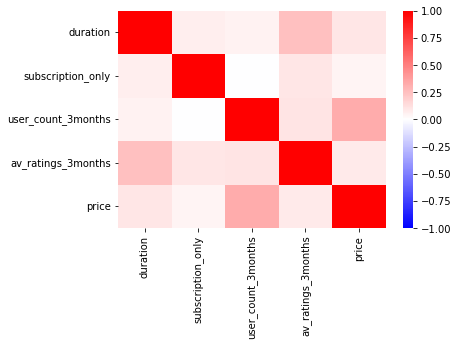

In [22]:
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='bwr')
plt.show()

## DEAL WITH empty values

In [23]:
cat_features = ['type', 'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4',
               'country_0', 'genre_0', 'genre_1', 'genre_2', 'director_0']
num_features = ['age_access_type', 'average_rating', 'duration', 'release_year', 'subscription_only']
text_features = ['name']

In [24]:
data[cat_features] = data[cat_features].replace(np.nan, 'Na')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140 entries, 0 to 4139
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_access_type     4140 non-null   object 
 1   average_rating      4001 non-null   object 
 2   duration            4140 non-null   float64
 3   type                4140 non-null   object 
 4   release_year        4140 non-null   object 
 5   subscription_only   4140 non-null   int64  
 6   user_count_3months  4140 non-null   int64  
 7   av_ratings_3months  4140 non-null   float64
 8   price               4140 non-null   float32
 9   actor_0             4140 non-null   object 
 10  actor_1             4140 non-null   object 
 11  actor_2             4140 non-null   object 
 12  actor_3             4140 non-null   object 
 13  actor_4             4140 non-null   object 
 14  country_0           4140 non-null   object 
 15  genre_0             4140 non-null   object 
 16  genre_

In [26]:
data['release_year'] = data['release_year'].astype(int)
data['average_rating'] = data['average_rating'].astype(float)
data['age_access_type'] = data['age_access_type'].astype(int)

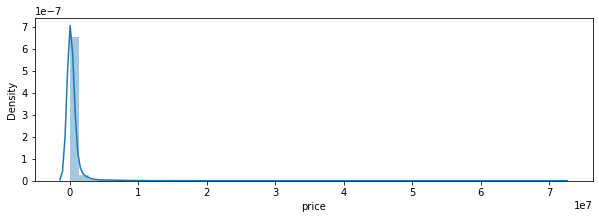

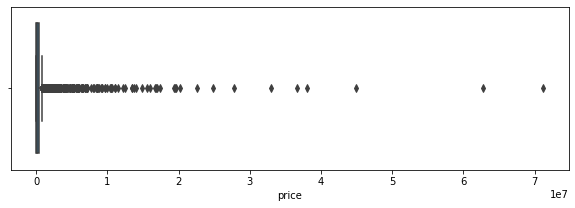

In [27]:
plt.figure(figsize=(10, 3))
sns.distplot(data['price'])
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(data['price'], orient='h')
plt.show()

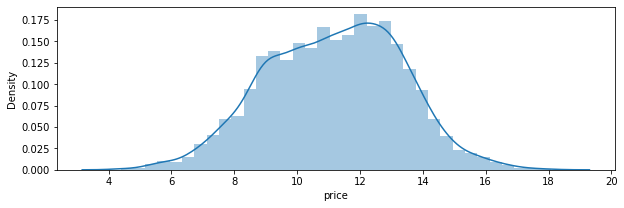

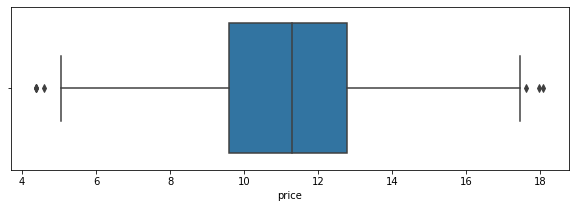

In [29]:
plt.figure(figsize=(10, 3))
sns.distplot(data['price'].apply(lambda x: np.log1p(x)))
plt.show()

plt.figure(figsize=(10, 3))
sns.boxplot(data['price'].apply(lambda x: np.log1p(x)), orient='h')
plt.show()

### Split

In [31]:
X, y = data.drop('price', axis=1), data['price']

y = y.apply(lambda x: np.log1p(x))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True)

In [34]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((3353, 18), (373, 18), (414, 18), (3353,), (373,), (414,))

In [35]:
X_train.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'release_year',
       'subscription_only', 'user_count_3months', 'av_ratings_3months',
       'actor_0', 'actor_1', 'actor_2', 'actor_3', 'actor_4', 'country_0',
       'genre_0', 'genre_1', 'genre_2', 'director_0'],
      dtype='object')

## Modeling

In [36]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [37]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
                         cat_features=cat_features)

val_dataset = cat.Pool(X_val, y_val,
                       cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.061573
0:	learn: 1.7213410	test: 1.7126392	best: 1.7126392 (0)	total: 76.5ms	remaining: 1m 16s
100:	learn: 1.1116828	test: 1.2234176	best: 1.2234176 (100)	total: 1.39s	remaining: 12.4s
200:	learn: 1.0023776	test: 1.1840389	best: 1.1839482 (199)	total: 2.69s	remaining: 10.7s
300:	learn: 0.9322046	test: 1.1586366	best: 1.1586366 (300)	total: 4.18s	remaining: 9.7s
400:	learn: 0.8861605	test: 1.1475832	best: 1.1463059 (389)	total: 5.59s	remaining: 8.35s
500:	learn: 0.8444460	test: 1.1455994	best: 1.1451861 (499)	total: 7.31s	remaining: 7.28s
600:	learn: 0.8068046	test: 1.1426870	best: 1.1419437 (560)	total: 8.69s	remaining: 5.77s
700:	learn: 0.7757292	test: 1.1392005	best: 1.1371189 (693)	total: 10.2s	remaining: 4.33s
800:	learn: 0.7453560	test: 1.1342842	best: 1.1335717 (796)	total: 11.6s	remaining: 2.89s
900:	learn: 0.7178571	test: 1.1316977	best: 1.1316977 (900)	total: 13s	remaining: 1.43s
999:	learn: 0.6942286	test: 1.1319570	best: 1.1310213 (912)	total: 14.4s	re

In [38]:
y_pred = cat_model.predict(test_dataset)

In [39]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [40]:
cat_model.save_model('cat_reg_income')

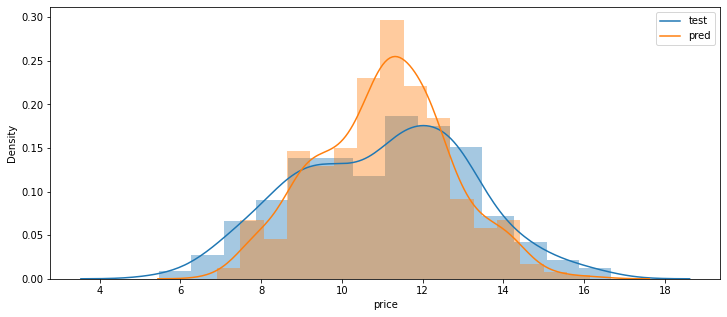

In [41]:
plt.figure(figsize=(12, 5))
sns.distplot(y_test)
sns.distplot(y_pred)
plt.legend(['test', 'pred'])
plt.show()

In [42]:
def inverse_transform(feature):
    return np.expm1(feature)

In [43]:
calc_metrics(inverse_transform(y_test), inverse_transform(y_pred))

*** VAL **: 
MSE:   1323119413460.5132
RMSE:  1150269.2786736996
R2:    0.4100082889047091
MAE:   348657.3999547168
MedAE: 48893.40588060346
------------------------------


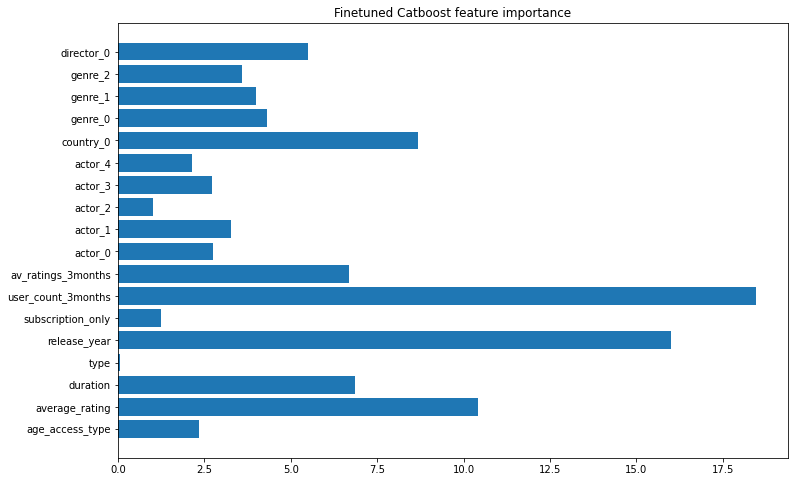

In [44]:
imp = cat_model.get_feature_importance(data=train_dataset)
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
axes.barh(width=imp, y=cat_model.feature_names_)
axes.set_title('Finetuned Catboost feature importance')
plt.savefig('cat_feature_importance_2.png')
plt.show()

# Tuning

In [47]:
train_dataset = cat.Pool(X_train,
                         y_train,
                         cat_features=cat_features)

test_dataset = cat.Pool(X_test, y_test,
                         cat_features=cat_features)

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
    'cat_features': cat_features
}

In [48]:
parameters_distr = {'depth': randint(3, 7),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [100, 1000, 5000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5, n_jobs=-1, verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_income', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 1.7187197	total: 615ms	remaining: 51m 15s
1:	learn: 1.6882080	total: 1.2s	remaining: 49m 54s
2:	learn: 1.6546765	total: 2.08s	remaining: 57m 51s
3:	learn: 1.6240246	total: 2.84s	remaining: 59m 6s
4:	learn: 1.5882043	total: 3.15s	remaining: 52m 23s
5:	learn: 1.5683401	total: 3.22s	remaining: 44m 43s
6:	learn: 1.5489801	total: 3.5s	remaining: 41m 38s
7:	learn: 1.5310186	total: 3.75s	remaining: 38m 59s
8:	learn: 1.5057791	total: 4s	remaining: 36m 55s
9:	learn: 1.4828146	total: 4.06s	remaining: 33m 45s
10:	learn: 1.4609442	total: 4.18s	remaining: 31m 35s
11:	learn: 1.4417322	total: 4.44s	remaining: 30m 45s
12:	learn: 1.4242792	total: 4.71s	remaining: 30m 7s
13:	learn: 1.4124431	total: 6.15s	remaining: 36m 28s
14:	learn: 1.3991285	total: 6.54s	remaining: 36m 12s
15:	learn: 1.3872842	total: 6.6s	remaining: 34m 16s
16:	learn: 1.3777292	total: 7.68s	remaining: 37m 30s
17:	learn: 1.3651931	total: 7.98s	remaining: 36m 48s
18:

0:	learn: 1.7035555	total: 428ms	remaining: 35m 38s
1:	learn: 1.6639335	total: 521ms	remaining: 21m 41s
2:	learn: 1.6282245	total: 818ms	remaining: 22m 42s
3:	learn: 1.5968036	total: 936ms	remaining: 19m 29s
4:	learn: 1.5750989	total: 1.03s	remaining: 17m 9s
5:	learn: 1.5495022	total: 1.33s	remaining: 18m 31s
6:	learn: 1.5242677	total: 1.61s	remaining: 19m 7s
7:	learn: 1.5067856	total: 1.95s	remaining: 20m 15s
8:	learn: 1.4832124	total: 2.33s	remaining: 21m 30s
9:	learn: 1.4677264	total: 2.34s	remaining: 19m 29s
10:	learn: 1.4479371	total: 2.63s	remaining: 19m 52s
11:	learn: 1.4290205	total: 2.88s	remaining: 19m 57s
12:	learn: 1.4196116	total: 3.51s	remaining: 22m 26s
13:	learn: 1.4072049	total: 3.56s	remaining: 21m 6s
14:	learn: 1.3976960	total: 4.01s	remaining: 22m 11s
15:	learn: 1.3887920	total: 4.49s	remaining: 23m 17s
16:	learn: 1.3758924	total: 4.99s	remaining: 24m 23s
17:	learn: 1.3634087	total: 5.21s	remaining: 24m 2s
18:	learn: 1.3559907	total: 5.38s	remaining: 23m 30s
19:	lea

0:	learn: 1.7236943	total: 967ms	remaining: 16m 6s
1:	learn: 1.6842300	total: 1.15s	remaining: 9m 34s
2:	learn: 1.6425515	total: 1.95s	remaining: 10m 48s
3:	learn: 1.6014706	total: 2.68s	remaining: 11m 7s
4:	learn: 1.5687798	total: 2.98s	remaining: 9m 53s
5:	learn: 1.5431825	total: 3.54s	remaining: 9m 46s
6:	learn: 1.5107476	total: 3.65s	remaining: 8m 37s
7:	learn: 1.4898021	total: 4.4s	remaining: 9m 5s
8:	learn: 1.4677570	total: 4.67s	remaining: 8m 34s
9:	learn: 1.4419041	total: 5.62s	remaining: 9m 16s
10:	learn: 1.4267839	total: 6.34s	remaining: 9m 30s
11:	learn: 1.4127226	total: 7.68s	remaining: 10m 32s
12:	learn: 1.3938835	total: 9.24s	remaining: 11m 41s
13:	learn: 1.3774510	total: 9.71s	remaining: 11m 23s
14:	learn: 1.3679272	total: 9.98s	remaining: 10m 55s
15:	learn: 1.3608674	total: 10.8s	remaining: 11m 2s
16:	learn: 1.3519010	total: 11.4s	remaining: 11m
17:	learn: 1.3397309	total: 12.5s	remaining: 11m 23s
18:	learn: 1.3312911	total: 13.5s	remaining: 11m 39s
19:	learn: 1.3224337

0:	learn: 1.7090317	total: 532ms	remaining: 44m 18s
1:	learn: 1.6795057	total: 841ms	remaining: 35m 1s
2:	learn: 1.6438822	total: 969ms	remaining: 26m 53s
3:	learn: 1.6088740	total: 1.33s	remaining: 27m 45s
4:	learn: 1.5839850	total: 1.8s	remaining: 29m 55s
5:	learn: 1.5545610	total: 2.18s	remaining: 30m 16s
6:	learn: 1.5257628	total: 2.3s	remaining: 27m 22s
7:	learn: 1.4997650	total: 2.58s	remaining: 26m 47s
8:	learn: 1.4749768	total: 2.6s	remaining: 24m 1s
9:	learn: 1.4540535	total: 2.79s	remaining: 23m 10s
10:	learn: 1.4389706	total: 2.83s	remaining: 21m 22s
11:	learn: 1.4188558	total: 3.03s	remaining: 21m
12:	learn: 1.4062802	total: 3.14s	remaining: 20m 4s
13:	learn: 1.3931339	total: 4.41s	remaining: 26m 11s
14:	learn: 1.3812445	total: 4.51s	remaining: 25m
15:	learn: 1.3655233	total: 5.28s	remaining: 27m 25s
16:	learn: 1.3540173	total: 5.8s	remaining: 28m 21s
17:	learn: 1.3456822	total: 6.06s	remaining: 27m 58s
18:	learn: 1.3378734	total: 6.38s	remaining: 27m 52s
19:	learn: 1.32940

0:	learn: 1.7055947	total: 615ms	remaining: 10m 14s
1:	learn: 1.6634713	total: 1.16s	remaining: 9m 36s
2:	learn: 1.6192618	total: 2.91s	remaining: 16m 7s
3:	learn: 1.5822815	total: 3.25s	remaining: 13m 28s
4:	learn: 1.5426692	total: 3.75s	remaining: 12m 26s
5:	learn: 1.5093092	total: 4.3s	remaining: 11m 53s
6:	learn: 1.4825268	total: 5.54s	remaining: 13m 6s
7:	learn: 1.4584809	total: 6.28s	remaining: 12m 58s
8:	learn: 1.4322914	total: 6.91s	remaining: 12m 41s
9:	learn: 1.4110940	total: 7.28s	remaining: 12m
10:	learn: 1.3925227	total: 7.69s	remaining: 11m 31s
11:	learn: 1.3785165	total: 7.71s	remaining: 10m 34s
12:	learn: 1.3645291	total: 7.93s	remaining: 10m 2s
13:	learn: 1.3518028	total: 8.49s	remaining: 9m 58s
14:	learn: 1.3432317	total: 8.81s	remaining: 9m 38s
15:	learn: 1.3293598	total: 9.29s	remaining: 9m 31s
16:	learn: 1.3196469	total: 9.95s	remaining: 9m 35s
17:	learn: 1.3097639	total: 10.2s	remaining: 9m 14s
18:	learn: 1.2987623	total: 10.4s	remaining: 8m 58s
19:	learn: 1.28814

0:	learn: 1.7295035	total: 208ms	remaining: 17m 20s
1:	learn: 1.6854600	total: 1.61s	remaining: 1h 7m 8s
2:	learn: 1.6444738	total: 1.89s	remaining: 52m 29s
3:	learn: 1.6155248	total: 2s	remaining: 41m 43s
4:	learn: 1.5809592	total: 2.5s	remaining: 41m 42s
5:	learn: 1.5609636	total: 2.73s	remaining: 37m 49s
6:	learn: 1.5317540	total: 3.02s	remaining: 35m 56s
7:	learn: 1.5147192	total: 3.09s	remaining: 32m 11s
8:	learn: 1.4952325	total: 3.65s	remaining: 33m 41s
9:	learn: 1.4749930	total: 4.49s	remaining: 37m 21s
10:	learn: 1.4548776	total: 5.24s	remaining: 39m 35s
11:	learn: 1.4425715	total: 5.86s	remaining: 40m 36s
12:	learn: 1.4286634	total: 6.53s	remaining: 41m 46s
13:	learn: 1.4141648	total: 7.08s	remaining: 42m 2s
14:	learn: 1.4001746	total: 7.99s	remaining: 44m 15s
15:	learn: 1.3874172	total: 8.38s	remaining: 43m 31s
16:	learn: 1.3795274	total: 8.51s	remaining: 41m 35s
17:	learn: 1.3720142	total: 9.34s	remaining: 43m 3s
18:	learn: 1.3651740	total: 9.81s	remaining: 42m 52s
19:	lear

0:	learn: 1.7217307	total: 921ms	remaining: 1h 16m 43s
1:	learn: 1.6865105	total: 1.84s	remaining: 1h 16m 32s
2:	learn: 1.6544485	total: 2.93s	remaining: 1h 21m 20s
3:	learn: 1.6234455	total: 4.49s	remaining: 1h 33m 29s
4:	learn: 1.6004817	total: 4.93s	remaining: 1h 22m 4s
5:	learn: 1.5751802	total: 6.98s	remaining: 1h 36m 47s
6:	learn: 1.5561323	total: 7.24s	remaining: 1h 26m 3s
7:	learn: 1.5315180	total: 7.95s	remaining: 1h 22m 38s
8:	learn: 1.5095201	total: 9.09s	remaining: 1h 23m 59s
9:	learn: 1.4887854	total: 10.3s	remaining: 1h 25m 30s
10:	learn: 1.4702830	total: 10.8s	remaining: 1h 21m 52s
11:	learn: 1.4514832	total: 11.9s	remaining: 1h 22m 43s
12:	learn: 1.4405612	total: 12.4s	remaining: 1h 19m 25s
13:	learn: 1.4290354	total: 16.1s	remaining: 1h 35m 27s
14:	learn: 1.4152377	total: 17.1s	remaining: 1h 34m 56s
15:	learn: 1.3979821	total: 18.4s	remaining: 1h 35m 39s
16:	learn: 1.3856437	total: 19.4s	remaining: 1h 34m 38s
17:	learn: 1.3759401	total: 20.5s	remaining: 1h 34m 38s
18:	

0:	learn: 1.7389985	total: 1.31s	remaining: 21m 53s
1:	learn: 1.7059895	total: 2.74s	remaining: 22m 47s
2:	learn: 1.6720674	total: 3.47s	remaining: 19m 13s
3:	learn: 1.6498271	total: 4.83s	remaining: 20m 2s
4:	learn: 1.6191347	total: 4.89s	remaining: 16m 13s
5:	learn: 1.5931863	total: 6.24s	remaining: 17m 12s
6:	learn: 1.5669158	total: 7.16s	remaining: 16m 55s
7:	learn: 1.5431335	total: 7.46s	remaining: 15m 25s
8:	learn: 1.5285663	total: 7.73s	remaining: 14m 11s
9:	learn: 1.5066250	total: 8.17s	remaining: 13m 28s
10:	learn: 1.4861330	total: 8.63s	remaining: 12m 55s
11:	learn: 1.4680497	total: 9.19s	remaining: 12m 36s
12:	learn: 1.4498012	total: 9.79s	remaining: 12m 23s
13:	learn: 1.4338617	total: 10.4s	remaining: 12m 10s
14:	learn: 1.4230487	total: 10.4s	remaining: 11m 23s
15:	learn: 1.4112441	total: 11.4s	remaining: 11m 42s
16:	learn: 1.3958572	total: 12.7s	remaining: 12m 13s
17:	learn: 1.3861909	total: 13.2s	remaining: 12m 1s
18:	learn: 1.3733597	total: 13.7s	remaining: 11m 47s
19:	l

154:	learn: 1.1321932	total: 1m 20s	remaining: 41m 44s
155:	learn: 1.1318253	total: 1m 21s	remaining: 41m 56s
156:	learn: 1.1314425	total: 1m 21s	remaining: 41m 52s
157:	learn: 1.1306774	total: 1m 21s	remaining: 41m 44s
158:	learn: 1.1306292	total: 1m 22s	remaining: 41m 50s
159:	learn: 1.1304212	total: 1m 22s	remaining: 41m 41s
160:	learn: 1.1297878	total: 1m 22s	remaining: 41m 30s
161:	learn: 1.1295765	total: 1m 23s	remaining: 41m 32s
162:	learn: 1.1294677	total: 1m 23s	remaining: 41m 24s
163:	learn: 1.1286455	total: 1m 24s	remaining: 41m 31s
164:	learn: 1.1277679	total: 1m 24s	remaining: 41m 17s
165:	learn: 1.1267767	total: 1m 25s	remaining: 41m 17s
166:	learn: 1.1266918	total: 1m 25s	remaining: 41m 10s
167:	learn: 1.1257335	total: 1m 26s	remaining: 41m 22s
168:	learn: 1.1253374	total: 1m 26s	remaining: 41m 19s
169:	learn: 1.1250779	total: 1m 27s	remaining: 41m 12s
170:	learn: 1.1242403	total: 1m 27s	remaining: 41m 2s
171:	learn: 1.1241970	total: 1m 27s	remaining: 40m 53s
172:	learn:

0:	learn: 1.7251145	total: 1.76s	remaining: 2h 26m 31s
1:	learn: 1.6874435	total: 2.23s	remaining: 1h 32m 53s
2:	learn: 1.6529714	total: 2.46s	remaining: 1h 8m 9s
3:	learn: 1.6236518	total: 3.1s	remaining: 1h 4m 35s
4:	learn: 1.6016603	total: 3.32s	remaining: 55m 21s
5:	learn: 1.5727226	total: 3.4s	remaining: 47m 11s
6:	learn: 1.5462001	total: 4.02s	remaining: 47m 46s
7:	learn: 1.5276445	total: 4.36s	remaining: 45m 20s
8:	learn: 1.5094232	total: 4.73s	remaining: 43m 44s
9:	learn: 1.4935351	total: 5.13s	remaining: 42m 39s
10:	learn: 1.4718655	total: 5.64s	remaining: 42m 37s
11:	learn: 1.4608571	total: 6.62s	remaining: 45m 51s
12:	learn: 1.4507378	total: 8.46s	remaining: 54m 4s
13:	learn: 1.4348383	total: 9.78s	remaining: 58m 4s
14:	learn: 1.4175001	total: 10.4s	remaining: 57m 41s
15:	learn: 1.4012163	total: 11s	remaining: 57m 5s
16:	learn: 1.3900292	total: 12.1s	remaining: 59m 3s
17:	learn: 1.3792745	total: 13s	remaining: 1h 3s
18:	learn: 1.3643056	total: 13.9s	remaining: 1h 47s
19:	lea

0:	learn: 1.6937718	total: 446ms	remaining: 7m 25s
1:	learn: 1.6519537	total: 718ms	remaining: 5m 58s
2:	learn: 1.6075069	total: 1.06s	remaining: 5m 53s
3:	learn: 1.5671319	total: 1.39s	remaining: 5m 45s
4:	learn: 1.5436130	total: 1.69s	remaining: 5m 37s
5:	learn: 1.5111598	total: 2.32s	remaining: 6m 25s
6:	learn: 1.4919081	total: 2.87s	remaining: 6m 47s
7:	learn: 1.4661682	total: 3.21s	remaining: 6m 38s
8:	learn: 1.4421054	total: 3.4s	remaining: 6m 14s
9:	learn: 1.4256054	total: 3.61s	remaining: 5m 57s
10:	learn: 1.4099826	total: 4.53s	remaining: 6m 47s
11:	learn: 1.3928874	total: 4.9s	remaining: 6m 43s
12:	learn: 1.3779687	total: 5.11s	remaining: 6m 28s
13:	learn: 1.3677086	total: 5.61s	remaining: 6m 35s
14:	learn: 1.3552033	total: 5.77s	remaining: 6m 18s
15:	learn: 1.3423446	total: 6.45s	remaining: 6m 36s
16:	learn: 1.3287091	total: 9.14s	remaining: 8m 48s
17:	learn: 1.3235074	total: 9.61s	remaining: 8m 44s
18:	learn: 1.3160839	total: 10.4s	remaining: 8m 57s
19:	learn: 1.3087426	tot

0:	learn: 1.7126649	total: 854ms	remaining: 14m 13s
1:	learn: 1.6675801	total: 2.3s	remaining: 19m 8s
2:	learn: 1.6264717	total: 2.82s	remaining: 15m 36s
3:	learn: 1.5877604	total: 3.99s	remaining: 16m 33s
4:	learn: 1.5613584	total: 4.43s	remaining: 14m 42s
5:	learn: 1.5288592	total: 6.18s	remaining: 17m 3s
6:	learn: 1.4975049	total: 7.94s	remaining: 18m 46s
7:	learn: 1.4706642	total: 8.7s	remaining: 17m 59s
8:	learn: 1.4502465	total: 9.33s	remaining: 17m 7s
9:	learn: 1.4314706	total: 9.86s	remaining: 16m 16s
10:	learn: 1.4180460	total: 10.5s	remaining: 15m 40s
11:	learn: 1.3980684	total: 10.7s	remaining: 14m 40s
12:	learn: 1.3818364	total: 11.1s	remaining: 13m 59s
13:	learn: 1.3712297	total: 11.6s	remaining: 13m 39s
14:	learn: 1.3603567	total: 12.4s	remaining: 13m 34s
15:	learn: 1.3463837	total: 12.7s	remaining: 13m 2s
16:	learn: 1.3378685	total: 13.5s	remaining: 13m
17:	learn: 1.3296695	total: 13.9s	remaining: 12m 39s
18:	learn: 1.3211062	total: 14.4s	remaining: 12m 24s
19:	learn: 1.

154:	learn: 1.1135895	total: 1m 23s	remaining: 43m 37s
155:	learn: 1.1126934	total: 1m 24s	remaining: 43m 36s
156:	learn: 1.1124519	total: 1m 24s	remaining: 43m 38s
157:	learn: 1.1109763	total: 1m 25s	remaining: 43m 41s
158:	learn: 1.1102225	total: 1m 26s	remaining: 43m 40s
159:	learn: 1.1099140	total: 1m 26s	remaining: 43m 23s
160:	learn: 1.1095985	total: 1m 26s	remaining: 43m 30s
161:	learn: 1.1083421	total: 1m 27s	remaining: 43m 20s
162:	learn: 1.1076282	total: 1m 27s	remaining: 43m 15s
163:	learn: 1.1060496	total: 1m 27s	remaining: 43m 8s
164:	learn: 1.1053584	total: 1m 28s	remaining: 43m 2s
165:	learn: 1.1041507	total: 1m 28s	remaining: 43m 7s
166:	learn: 1.1029593	total: 1m 29s	remaining: 43m 4s
167:	learn: 1.1024693	total: 1m 29s	remaining: 42m 57s
168:	learn: 1.1020460	total: 1m 29s	remaining: 42m 48s
169:	learn: 1.1015792	total: 1m 30s	remaining: 42m 44s
170:	learn: 1.1013824	total: 1m 30s	remaining: 42m 35s
171:	learn: 1.1011084	total: 1m 31s	remaining: 42m 36s
172:	learn: 1.

154:	learn: 1.1395818	total: 1m 14s	remaining: 38m 33s
155:	learn: 1.1390923	total: 1m 14s	remaining: 38m 22s
156:	learn: 1.1380119	total: 1m 14s	remaining: 38m 25s
157:	learn: 1.1369165	total: 1m 14s	remaining: 38m 14s
158:	learn: 1.1367076	total: 1m 14s	remaining: 38m 3s
159:	learn: 1.1357051	total: 1m 16s	remaining: 38m 32s
160:	learn: 1.1356714	total: 1m 16s	remaining: 38m 23s
161:	learn: 1.1355076	total: 1m 19s	remaining: 39m 37s
162:	learn: 1.1354990	total: 1m 22s	remaining: 40m 49s
163:	learn: 1.1344945	total: 1m 23s	remaining: 41m 8s
164:	learn: 1.1331514	total: 1m 23s	remaining: 41m
165:	learn: 1.1331395	total: 1m 24s	remaining: 41m 2s
166:	learn: 1.1315704	total: 1m 25s	remaining: 41m 20s
167:	learn: 1.1309327	total: 1m 25s	remaining: 41m 7s
168:	learn: 1.1308096	total: 1m 25s	remaining: 40m 52s
169:	learn: 1.1301837	total: 1m 27s	remaining: 41m 17s
170:	learn: 1.1300689	total: 1m 27s	remaining: 41m 3s
171:	learn: 1.1295176	total: 1m 27s	remaining: 40m 48s
172:	learn: 1.12940

0:	learn: 1.7092091	total: 996ms	remaining: 16m 35s
1:	learn: 1.6775302	total: 1.57s	remaining: 13m 4s
2:	learn: 1.6452732	total: 2.3s	remaining: 12m 43s
3:	learn: 1.6224944	total: 3.63s	remaining: 15m 3s
4:	learn: 1.5938010	total: 4.71s	remaining: 15m 38s
5:	learn: 1.5744320	total: 5.69s	remaining: 15m 43s
6:	learn: 1.5482012	total: 6.77s	remaining: 16m
7:	learn: 1.5246899	total: 7.55s	remaining: 15m 36s
8:	learn: 1.5039079	total: 8.72s	remaining: 16m
9:	learn: 1.4876440	total: 9.79s	remaining: 16m 9s
10:	learn: 1.4728553	total: 11.1s	remaining: 16m 41s
11:	learn: 1.4531797	total: 13s	remaining: 17m 49s
12:	learn: 1.4362529	total: 13.4s	remaining: 16m 56s
13:	learn: 1.4192689	total: 15.3s	remaining: 17m 56s
14:	learn: 1.4073441	total: 16.2s	remaining: 17m 41s
15:	learn: 1.3946078	total: 17.1s	remaining: 17m 31s
16:	learn: 1.3853096	total: 17.6s	remaining: 16m 57s
17:	learn: 1.3760976	total: 18.3s	remaining: 16m 39s
18:	learn: 1.3650603	total: 18.8s	remaining: 16m 12s
19:	learn: 1.3578

0:	learn: 1.7261791	total: 503ms	remaining: 8m 22s
1:	learn: 1.6903127	total: 2.56s	remaining: 21m 20s
2:	learn: 1.6574075	total: 3.56s	remaining: 19m 42s
3:	learn: 1.6314207	total: 5.29s	remaining: 21m 56s
4:	learn: 1.6006526	total: 6.34s	remaining: 21m 2s
5:	learn: 1.5744953	total: 7.88s	remaining: 21m 45s
6:	learn: 1.5510383	total: 9.75s	remaining: 23m 3s
7:	learn: 1.5327103	total: 12.2s	remaining: 25m 13s
8:	learn: 1.5142438	total: 13s	remaining: 23m 52s
9:	learn: 1.4953221	total: 13.7s	remaining: 22m 33s
10:	learn: 1.4786553	total: 14.8s	remaining: 22m 7s
11:	learn: 1.4602131	total: 15.7s	remaining: 21m 32s
12:	learn: 1.4427797	total: 16.5s	remaining: 20m 52s
13:	learn: 1.4310654	total: 17.3s	remaining: 20m 17s
14:	learn: 1.4189273	total: 19.5s	remaining: 21m 17s
15:	learn: 1.4031537	total: 20.7s	remaining: 21m 10s
16:	learn: 1.3897046	total: 22.1s	remaining: 21m 16s
17:	learn: 1.3805984	total: 24s	remaining: 21m 48s
18:	learn: 1.3683681	total: 25.9s	remaining: 22m 17s
19:	learn: 

48:	learn: 1.2168738	total: 1m 6s	remaining: 1h 51m 21s
49:	learn: 1.2150142	total: 1m 7s	remaining: 1h 51m 48s
50:	learn: 1.2116719	total: 1m 9s	remaining: 1h 51m 43s
51:	learn: 1.2095452	total: 1m 10s	remaining: 1h 51m 13s
52:	learn: 1.2084490	total: 1m 13s	remaining: 1h 54m 6s
53:	learn: 1.2058393	total: 1m 14s	remaining: 1h 53m 14s
54:	learn: 1.2041005	total: 1m 15s	remaining: 1h 52m 25s
55:	learn: 1.2019569	total: 1m 16s	remaining: 1h 52m 17s
56:	learn: 1.1985251	total: 1m 17s	remaining: 1h 52m 30s
57:	learn: 1.1971490	total: 1m 19s	remaining: 1h 52m 52s
58:	learn: 1.1938181	total: 1m 20s	remaining: 1h 52m 15s
59:	learn: 1.1908114	total: 1m 21s	remaining: 1h 51m 18s
60:	learn: 1.1882025	total: 1m 22s	remaining: 1h 51m 31s
61:	learn: 1.1873984	total: 1m 23s	remaining: 1h 51m 8s
62:	learn: 1.1847487	total: 1m 24s	remaining: 1h 50m 12s
63:	learn: 1.1833939	total: 1m 25s	remaining: 1h 49m 30s
64:	learn: 1.1824417	total: 1m 26s	remaining: 1h 48m 54s
65:	learn: 1.1802913	total: 1m 27s	r

119:	learn: 1.1225134	total: 2m 29s	remaining: 18m 14s
120:	learn: 1.1217553	total: 2m 29s	remaining: 18m 9s
121:	learn: 1.1205428	total: 2m 31s	remaining: 18m 9s
122:	learn: 1.1192585	total: 2m 32s	remaining: 18m 10s
123:	learn: 1.1185052	total: 2m 33s	remaining: 18m 5s
124:	learn: 1.1181514	total: 2m 34s	remaining: 18m
125:	learn: 1.1169815	total: 2m 35s	remaining: 17m 56s
126:	learn: 1.1165853	total: 2m 35s	remaining: 17m 49s
127:	learn: 1.1159995	total: 2m 36s	remaining: 17m 44s
128:	learn: 1.1152914	total: 2m 37s	remaining: 17m 41s
129:	learn: 1.1151551	total: 2m 37s	remaining: 17m 36s
130:	learn: 1.1148698	total: 2m 39s	remaining: 17m 34s
131:	learn: 1.1140583	total: 2m 39s	remaining: 17m 30s
132:	learn: 1.1138429	total: 2m 40s	remaining: 17m 23s
133:	learn: 1.1133704	total: 2m 41s	remaining: 17m 23s
134:	learn: 1.1126947	total: 2m 42s	remaining: 17m 19s
135:	learn: 1.1123757	total: 2m 43s	remaining: 17m 15s
136:	learn: 1.1111518	total: 2m 44s	remaining: 17m 18s
137:	learn: 1.110

102:	learn: 1.1425878	total: 2m 19s	remaining: 20m 11s
103:	learn: 1.1401196	total: 2m 21s	remaining: 20m 16s
104:	learn: 1.1387666	total: 2m 21s	remaining: 20m 4s
105:	learn: 1.1380151	total: 2m 22s	remaining: 20m
106:	learn: 1.1371753	total: 2m 26s	remaining: 20m 23s
107:	learn: 1.1356882	total: 2m 27s	remaining: 20m 21s
108:	learn: 1.1343510	total: 2m 28s	remaining: 20m 14s
109:	learn: 1.1322108	total: 2m 30s	remaining: 20m 13s
110:	learn: 1.1318072	total: 2m 30s	remaining: 20m 4s
111:	learn: 1.1313488	total: 2m 30s	remaining: 19m 55s
112:	learn: 1.1301832	total: 2m 31s	remaining: 19m 48s
113:	learn: 1.1289116	total: 2m 32s	remaining: 19m 43s
114:	learn: 1.1288595	total: 2m 32s	remaining: 19m 33s
115:	learn: 1.1282889	total: 2m 33s	remaining: 19m 29s
116:	learn: 1.1270024	total: 2m 34s	remaining: 19m 23s
117:	learn: 1.1266134	total: 2m 35s	remaining: 19m 19s
118:	learn: 1.1263591	total: 2m 35s	remaining: 19m 11s
119:	learn: 1.1255396	total: 2m 36s	remaining: 19m 8s
120:	learn: 1.124

238:	learn: 1.0186718	total: 2m 36s	remaining: 51m 56s
239:	learn: 1.0182015	total: 2m 37s	remaining: 52m 4s
240:	learn: 1.0179404	total: 2m 38s	remaining: 52m 5s
241:	learn: 1.0172962	total: 2m 39s	remaining: 52m 11s
242:	learn: 1.0163005	total: 2m 39s	remaining: 52m 6s
243:	learn: 1.0148969	total: 2m 40s	remaining: 52m 3s
244:	learn: 1.0144309	total: 2m 40s	remaining: 51m 53s
245:	learn: 1.0139295	total: 2m 40s	remaining: 51m 48s
246:	learn: 1.0131061	total: 2m 41s	remaining: 51m 49s
247:	learn: 1.0123276	total: 2m 42s	remaining: 51m 50s
248:	learn: 1.0119348	total: 2m 42s	remaining: 51m 48s
249:	learn: 1.0104524	total: 2m 43s	remaining: 51m 41s
250:	learn: 1.0095626	total: 2m 44s	remaining: 51m 47s
251:	learn: 1.0089974	total: 2m 44s	remaining: 51m 37s
252:	learn: 1.0085489	total: 2m 44s	remaining: 51m 33s
253:	learn: 1.0081685	total: 2m 45s	remaining: 51m 32s
254:	learn: 1.0073317	total: 2m 45s	remaining: 51m 26s
255:	learn: 1.0070251	total: 2m 46s	remaining: 51m 26s
256:	learn: 1.

176:	learn: 1.0771008	total: 2m 22s	remaining: 1h 4m 32s
177:	learn: 1.0759084	total: 2m 23s	remaining: 1h 4m 50s
178:	learn: 1.0752034	total: 2m 24s	remaining: 1h 4m 43s
179:	learn: 1.0742411	total: 2m 25s	remaining: 1h 5m 5s
180:	learn: 1.0729802	total: 2m 26s	remaining: 1h 5m 5s
181:	learn: 1.0721252	total: 2m 27s	remaining: 1h 4m 52s
182:	learn: 1.0712954	total: 2m 28s	remaining: 1h 5m 18s
183:	learn: 1.0704625	total: 2m 29s	remaining: 1h 5m 11s
184:	learn: 1.0698251	total: 2m 30s	remaining: 1h 5m 13s
185:	learn: 1.0692411	total: 2m 31s	remaining: 1h 5m 9s
186:	learn: 1.0683559	total: 2m 31s	remaining: 1h 5m 4s
187:	learn: 1.0677826	total: 2m 32s	remaining: 1h 5m 1s
188:	learn: 1.0669694	total: 2m 33s	remaining: 1h 5m 4s
189:	learn: 1.0658406	total: 2m 34s	remaining: 1h 4m 59s
190:	learn: 1.0648436	total: 2m 35s	remaining: 1h 5m 17s
191:	learn: 1.0645782	total: 2m 35s	remaining: 1h 5m 1s
192:	learn: 1.0638299	total: 2m 36s	remaining: 1h 5m 1s
193:	learn: 1.0637448	total: 2m 37s	rem

259:	learn: 1.0021209	total: 3m 26s	remaining: 1h 2m 45s
260:	learn: 1.0014555	total: 3m 26s	remaining: 1h 2m 35s
261:	learn: 1.0010997	total: 3m 26s	remaining: 1h 2m 22s
262:	learn: 1.0004066	total: 3m 27s	remaining: 1h 2m 12s
263:	learn: 0.9996208	total: 3m 27s	remaining: 1h 2m 4s
264:	learn: 0.9985541	total: 3m 28s	remaining: 1h 2m 1s
265:	learn: 0.9981809	total: 3m 29s	remaining: 1h 2m 8s
266:	learn: 0.9968695	total: 3m 30s	remaining: 1h 2m 6s
267:	learn: 0.9965838	total: 3m 30s	remaining: 1h 2m 2s
268:	learn: 0.9960456	total: 3m 31s	remaining: 1h 2m
269:	learn: 0.9955066	total: 3m 31s	remaining: 1h 1m 53s
270:	learn: 0.9949326	total: 3m 32s	remaining: 1h 1m 48s
271:	learn: 0.9947936	total: 3m 32s	remaining: 1h 1m 39s
272:	learn: 0.9946793	total: 3m 33s	remaining: 1h 1m 31s
273:	learn: 0.9941455	total: 3m 34s	remaining: 1h 1m 32s
274:	learn: 0.9935466	total: 3m 35s	remaining: 1h 1m 46s
275:	learn: 0.9929844	total: 3m 36s	remaining: 1h 1m 40s
276:	learn: 0.9928789	total: 3m 36s	rema

213:	learn: 1.0657778	total: 3m 23s	remaining: 1h 15m 47s
214:	learn: 1.0652050	total: 3m 23s	remaining: 1h 15m 35s
215:	learn: 1.0652151	total: 3m 25s	remaining: 1h 15m 52s
216:	learn: 1.0646875	total: 3m 26s	remaining: 1h 15m 40s
217153:	learn: 1.0976837	total: 2m 23s	remaining: 13m 9s
154:	learn: 1.0967741	total: 2m 24s	remaining: 13m 8s
155:	learn: 1.0952979	total: 2m 26s	remaining: 13m 12s
156:	learn: 1.0944739	total: 2m 26s	remaining: 13m 8s
157:	learn: 1.0929913	total: 2m 27s	remaining: 13m 6s
158:	learn: 1.0924864	total: 2m 29s	remaining: 13m 9s
159:	learn: 1.0921030	total: 2m 29s	remaining: 13m 6s
160:	learn: 1.0910062	total: 2m 30s	remaining: 13m 1s
161:	learn: 1.0907071	total: 2m 30s	remaining: 12m 59s
162:	learn: 1.0894271	total: 2m 30s	remaining: 12m 55s
163:	learn: 1.0891093	total: 2m 31s	remaining: 12m 52s
164:	learn: 1.0884806	total: 2m 32s	remaining: 12m 51s
165:	learn: 1.0854426	total: 2m 33s	remaining: 12m 49s
166:	learn: 1.0853818	total: 2m 34s	remaining: 12m 52s
16

163:	learn: 1.0918880	total: 2m 53s	remaining: 14m 45s
164:	learn: 1.0905073	total: 2m 54s	remaining: 14m 43s
165:	learn: 1.0900366	total: 2m 55s	remaining: 14m 40s
166:	learn: 1.0895821	total: 2m 55s	remaining: 14m 36s
167:	learn: 1.0887934	total: 2m 56s	remaining: 14m 31s
168:	learn: 1.0880145	total: 2m 57s	remaining: 14m 33s
169:	learn: 1.0874231	total: 3m	remaining: 14m 43s
170:	learn: 1.0873246	total: 3m 2s	remaining: 14m 45s
171:	learn: 1.0862629	total: 3m 3s	remaining: 14m 43s
172:	learn: 1.0851965	total: 3m 3s	remaining: 14m 38s
173:	learn: 1.0844077	total: 3m 4s	remaining: 14m 33s
174:	learn: 1.0828660	total: 3m 5s	remaining: 14m 32s
175:	learn: 1.0816919	total: 3m 6s	remaining: 14m 32s
176:	learn: 1.0816377	total: 3m 6s	remaining: 14m 28s
177:	learn: 1.0811510	total: 3m 7s	remaining: 14m 26s
178:	learn: 1.0806958	total: 3m 9s	remaining: 14m 27s
179:	learn: 1.0792130	total: 3m 9s	remaining: 14m 23s
180:	learn: 1.0790727	total: 3m 10s	remaining: 14m 19s
181:	learn: 1.0772286	to

372:	learn: 0.9893993	total: 3m 24s	remaining: 5m 43s
373:	learn: 0.9889419	total: 3m 24s	remaining: 5m 43s
374:	learn: 0.9887867	total: 3m 25s	remaining: 5m 42s
375:	learn: 0.9885535	total: 3m 25s	remaining: 5m 40s
376:	learn: 0.9884182	total: 3m 25s	remaining: 5m 39s
377:	learn: 0.9880519	total: 3m 25s	remaining: 5m 38s
378:	learn: 0.9872629	total: 3m 25s	remaining: 5m 37s
379:	learn: 0.9872048	total: 3m 26s	remaining: 5m 36s
380:	learn: 0.9870485	total: 3m 26s	remaining: 5m 35s
381:	learn: 0.9868634	total: 3m 26s	remaining: 5m 34s
382:	learn: 0.9860588	total: 3m 26s	remaining: 5m 33s
383:	learn: 0.9855518	total: 3m304:	learn: 1.0688535	total: 3m 28s	remaining: 53m 34s
305:	learn: 1.0687376	total: 3m 29s	remaining: 53m 36s
306:	learn: 1.0686418	total: 3m 30s	remaining: 53m 34s
307:	learn: 1.0685838	total: 3m 30s	remaining: 53m 29s
308:	learn: 1.0685553	total: 3m 30s	remaining: 53m 22s
309:	learn: 1.0677772	total: 3m 31s	remaining: 53m 26s
310:	learn: 1.0670697	total: 3m 32s	remaining

234:	learn: 1.0336804	total: 4m 33s	remaining: 14m 50s
235:	learn: 1.0323435	total: 4m 33s	remaining: 14m 46s
236:	learn: 1.0314147	total: 4m 34s	remaining: 14m 43s
237:	learn: 1.0306983	total: 4m 34s	remaining: 14m 39s
238:	learn: 1.0300877	total: 4m 34s	remaining: 14m 35s
239:	learn: 1.0295671	total: 4m 35s	remaining: 14m 32s
240:	learn: 1.0287756	total: 4m 36s	remaining: 14m 30s
241:	learn: 1.0284749	total: 4m 37s	remaining: 14m 28s
242:	learn: 1.0275382	total: 4m 37s	remaining: 14m 24s
243:	learn: 1.0264251	total: 4m 37s	remaining: 14m 20s
244:	learn: 1.0263223	total: 4m 38s	remaining: 14m 18s
245:	learn: 1.0259678	total: 4m 38s	remaining: 14m 14s
246:	learn: 1.0257361	total: 4m 39s	remaining: 14m 10s
247:	learn: 1.0252510	total: 4m 39s	remaining: 14m 7s
248:	learn: 1.0250725	total: 4m 39s	remaining: 14m 3s
249:	learn: 1.0242374	total: 4m 39s	remaining: 13m 59s
250:	learn: 1.0229345	total: 4m 40s	remaining: 13m 55s
251:	learn: 1.0223995	total: 4m 40s	remaining: 13m 52s
252:	learn: 

89:	learn: 1.1222317	total: 7.26s	remaining: 806ms
90:	learn: 1.1215552	total: 7.26s	remaining: 718ms
91:	learn: 1.1192075	total: 7.27s	remaining: 632ms
92:	learn: 1.1185372	total: 7.27s	remaining: 547ms
93:	learn: 1.1177761	total: 7.37s	remaining: 470ms
94:	learn: 1.1172514	total: 7.57s	remaining: 398ms
95:	learn: 1.1153314	total: 7.57s	remaining: 315ms
96:	learn: 1.1145753	total: 7.75s	remaining: 240ms
97:	learn: 1.1128252	total: 7.92s	remaining: 162ms
98:	learn: 1.1127436	total: 7.92s	remaining: 80ms
99:	learn: 1.1108153	total: 8.11s	remaining: 0us
[CV 5/5] END depth=5, iterations=100, learning_rate=0.07747184245754948;, score=0.504 total time=   9.6s
s
228:	learn: 1.0328667	total: 3m 41s	remaining: 12m 25s
229:	learn: 1.0326500	total: 3m 42s	remaining: 12m 24s
230:	learn: 1.0319887	total: 3m 43s	remaining: 12m 25s
231:	learn: 1.0312596	total: 3m 44s	remaining: 12m 23s
232:	learn: 1.0308178	total: 3m 45s	remaining: 12m 20s
233:	learn: 1.0304263	total: 3m 45s	remaining: 12m 17s
234:	

339:	learn: 0.9792651	total: 4m 32s	remaining: 1h 2m 11s
340:	learn: 0.9791810	total: 4m 32s	remaining: 1h 2m
341:	learn: 0.9785725	total: 4m 32s	remaining: 1h 1m 51s
342:	learn: 0.9784143	total: 4m 32s	remaining: 1h 1m 43s
343:	learn: 0.9782066	total: 4m 32s	remaining: 1h 1m 32s
344:	learn: 0.9770770	total: 4m 32s	remaining: 1h 1m 21s
345:	learn: 0.9768243	total: 4m 32s	remaining: 1h 1m 12s
346:	learn: 0.9765112	total: 4m 33s	remaining: 1h 1m 2s
347:	learn: 0.9758476	total: 4m 33s	remaining: 1h 53s
348:	learn: 0.9758071	total: 4m 33s	remaining: 1h 42s
349:	learn: 0.9753946	total: 4m 33s	remaining: 1h 31s
350:	learn: 0.9749418	total: 4m 33s	remaining: 1h 22s
351:	learn: 0.9743244	total: 4m 33s	remaining: 1h 12s
352:	learn: 0.9742471	total: 4m 33s	remaining: 1h 2s
353:	learn: 0.9738492	total: 4m 33s	remaining: 59m 52s
354:	learn: 0.9733488	total: 4m 33s	remaining: 59m 42s
355:	learn: 0.9733102	total: 4m 33s	remaining: 59m 33s
356:	learn: 0.9729076	total: 4m 33s	remaining: 59m 23s
357:	l

542:	learn: 0.9165554	total: 5m 2s	remaining: 4m 14s
543:	learn: 0.9162434	total: 5m 2s	remaining: 4m 13s
544:	learn: 0.9154340	total: 5m 2s	remaining: 4m 12s
545:	learn: 0.9150569	total: 5m 2s	remaining: 4m 11s
546:	learn: 0.9149577	total: 5m 3s	remaining: 4m 10s
547:	learn: 0.9146267	total: 5m 3s	remaining: 4m 9s
548:	learn: 0.9142444	total: 5m 3s	remaining: 4m 9s
549:	learn: 0.9138402	total: 5m 3s	remaining: 4m 8s
550:	learn: 0.9134324	total: 5m 3s	remaining: 4m 7s
551:	learn: 0.9132622	total: 5m 3s	remaining: 4m 6s
552:	learn: 0.9131303	total: 5m 3s	remaining: 4m 5s
553:	learn: 0.9128062	total: 5m 3s	remaining: 4m 4s
554:	learn: 0.9122652	total: 5m 3s	remaining: 4m 3s
555:	learn: 0.9120738	total: 5m 3s	remaining: 4m 2s
556:	learn: 0.9119686	total: 5m 4s	remaining: 4m 1s
557:	learn: 0.9116904	total: 5m 4s	remaining: 4m
558:	learn: 0.9115218	total: 5m 4s	remaining: 4m
559:	learn: 0.9112333	total: 5m 4s	remaining: 3m 59s
560:	learn: 0.9110257	total: 5m 4s	remaining: 3m 58s
561:	learn:

178:	learn: 1.0705825	total: 3m 6s	remaining: 14m 14s
179:	learn: 1.0689299	total: 3m 6s	remaining: 14m 11s
180:	learn: 1.0679363	total: 3m 8s	remaining: 14m 11s
181:	learn: 1.0661261	total: 3m 9s	remaining: 14m 10s
182:	learn: 1.0642504	total: 3m 10s	remaining: 14m 8s
183:	learn: 1.0631912	total: 3m 10s	remaining: 14m 5s
184:	learn: 1.0613647	total: 3m 12s	remaining: 14m 9s
185:	learn: 1.0595379	total: 3m 13s	remaining: 14m 5s
186:	learn: 1.0587016	total: 3m 14s	remaining: 14m 6s
187:	learn: 1.0571490	total: 3m 17s	remaining: 14m 11s
188:	learn: 1.0553981	total: 3m 18s	remaining: 14m 11s
189:	learn: 1.0538642	total: 3m 20s	remaining: 14m 16s
190:	learn: 1.0532750	total: 3m 21s	remaining: 14m 13s
191:	learn: 1.0529520	total: 3m 23s	remaining: 14m 14s
192:	learn: 1.0525480	total: 3m 23s	remaining: 14m 11s
193:	learn: 1.0511906	total: 3m 23s	remaining: 14m 7s
194:	learn: 1.0497228	total: 3m 24s	remaining: 14m 3s
195:	learn: 1.0495052	total: 3m 25s	remaining: 14m 1s
196:	learn: 1.0486865	

492:	learn: 0.9107377	total: 4m 23s	remaining: 40m 5s
493:	learn: 0.9104043	total: 4m 23s	remaining: 40m 1s
494:	learn: 0.9100870	total: 4m 23s	remaining: 39m 58s
495:	learn: 0.9093883	total: 4m 23s	remaining: 39m 53s
496:	learn: 0.9089676	total: 4m 23s	remaining: 39m 48s
497:	learn: 0.9084784	total: 4m 23s	remaining: 39m 43s
498:	learn: 0.9082970	total: 4m 23s	remaining: 39m 39s
499:	learn: 0.9078300	total: 4m 23s	remaining: 39m 35s
500:	learn: 0.9072871	total: 4m 24s	remaining: 39m 33s
501:	learn: 0.9069581	total: 4m 24s	remaining: 39m 29s
502:	learn: 0.9066206	total: 4m 24s	remaining: 39m 26s
503:	learn: 0.9064130	total: 4m 24s	remaining: 39m 20s
504:	learn: 0.9063793	total: 4m 24s	remaining: 39m 16s
505:	learn: 0.9060585	total: 4m 24s	remaining: 39m 11s
506:	learn: 0.9058666	total: 4m 24s	remaining: 39m 7s
507:	learn: 0.9056812	total: 4m 24s	remaining: 39m 2s
508:	learn: 0.9053638	total: 4m 25s	remaining: 38m 59s
509:	learn: 0.9050055	total: 4m 25s	remaining: 38m 55s
510:	learn: 0.

544:	learn: 0.9355610	total: 4m 15s	remaining: 3m 33s
545:	learn: 0.9353019	total: 4m 15s	remaining: 3m 32s
546:	learn: 0.9352503	total: 4m 15s	remaining: 3m 32s
547:	learn: 0.9349415	total: 4m 16s	remaining: 3m 31s
548:	learn: 0.9342620	total: 4m 16s	remaining: 3m 30s
549:	learn: 0.9341638	total: 4m 16s	remaining: 3m 29s
550:	learn: 0.9341431	total: 4m 16s	remaining: 3m 28s
551:	learn: 0.9341056	total: 4m 16s	remaining: 3m 28s
552:	learn: 0.9337224	total: 4m 16s	remaining: 3m 27s
553:	learn: 0.9334240	total: 4m 16s	remaining: 3m 26s
554:	learn: 0.9332481	total: 4m 16s	remaining: 3m 25s
555:	learn: 0.9330822	total: 4m 16s	remaining: 3m 25s
556:	learn: 0.9327770	total: 4m 16s	remaining: 3m 24s
557:	learn: 0.9325369	total: 4m 17s	remaining: 3m 23s
558:	learn: 0.9323238	total: 4m 17s	remaining: 3m 22s
559:	learn: 0.9320945	total: 4m 17s	remaining: 3m 22s
560:	learn: 0.9319640	total: 4m 17s	remaining: 3m 21s
561:	learn: 0.9319475	total: 4m 17s	remaining: 3m 20s
562:	learn: 0.9311832	total:

257:	learn: 1.0268357	total: 3m 26s	remaining: 1h 3m 19s
258:	learn: 1.0261592	total: 3m 27s	remaining: 1h 3m 23s
259:	learn: 1.0254356	total: 3m 28s	remaining: 1h 3m 27s
260:	learn: 1.0248810	total: 3m 30s	remaining: 1h 3m 40s
261:	learn: 1.0241529	total: 3m 30s	remaining: 1h 3m 35s
262:	learn: 1.0236898	total: 3m 31s	remaining: 1h 3m 31s
263:	learn: 1.0232528	total: 3m 32s	remaining: 1h 3m 31s
264:	learn: 1.0227907	total: 3m 33s	remaining: 1h 3m 34s
265:	learn: 1.0222067	total: 3m 34s	remaining: 1h 3m 35s
266:	learn: 1.0217832	total: 3m 34s	remaining: 1h 3m 27s
267:	learn: 1.0215806	total: 3m 35s	remaining: 1h 3m 28s
268:	learn: 1.0214885	total: 3m 36s	remaining: 1h 3m 23s
269:	learn: 1.0209760	total: 3m 37s	remaining: 1h 3m 25s
270:	learn: 1.0198303	total: 3m 37s	remaining: 1h 3m 23s
271:	learn: 1.0186810	total: 3m 38s	remaining: 1h 3m 13s
272:	learn: 1.0183231	total: 3m 39s	remaining: 1h 3m 19s
273:	learn: 1.0177233	total: 3m 40s	remaining: 1h 3m 22s
274:	learn: 1.0171060	total: 3m

437:	learn: 0.9658904	total: 4m 9s	remaining: 5m 19s
438:	learn: 0.9656674	total: 4m 9s	remaining: 5m 19s
439:	learn: 0.9656623	total: 4m 10s	remaining: 5m 18s
440:	learn: 0.9656086	total: 4m 10s	remaining: 5m 17s
441:	learn: 0.9653394	total: 4m 11s	remaining: 5m 16s
442:	learn: 0.9651026	total: 4m 11s	remaining: 5m 15s
443:	learn: 0.9643852	total: 4m 11s	remaining: 5m 14s
444:	learn: 0.9641511	total: 4m 11s	remaining: 5m 14s
445:	learn: 0.9638155	total: 4m 12s	remaining: 5m 13s
446:	learn: 0.9632737	total: 4m 13s	remaining: 5m 13s
447:	learn: 0.9628420	total: 4m 14s	remaining: 5m 13s
448:	learn: 0.9628384	total: 4m 14s	remaining: 5m 12s
449:	learn: 0.9625564	total: 4m 14s	remaining: 5m 10s
450:	learn: 0.9622725	total: 4m 14s	remaining: 5m 10s
451:	learn: 0.9620167	total: 4m 14s	remaining: 5m 9s
452:	learn: 0.9615057	total: 4m 15s	remaining: 5m 8s
453:	learn: 0.9612102	total: 4m 15s	remaining: 5m 7s
454:	learn: 0.9610603	total: 4m 15s	remaining: 5m 6s
455:	learn: 0.9607807	total: 4m 15

317:	learn: 0.9951903	total: 3m 51s	remaining: 56m 50s
318:	learn: 0.9950758	total: 3m 51s	remaining: 56m 44s
319:	learn: 0.9937711	total: 3m 52s	remaining: 56m 45s
320:	learn: 0.9930674	total: 3m 53s	remaining: 56m 45s
321:	learn: 0.9928832	total: 3m 53s	remaining: 56m 39s
322:	learn: 0.9920906	total: 3m 54s	remaining: 56m 36s
323:	learn: 0.9917107	total: 3m 55s	remaining: 56m 31s
324:	learn: 0.9916234	total: 3m 55s	remaining: 56m 28s
325:	learn: 0.9912931	total: 3m 55s	remaining: 56m 23s
326:	learn: 0.9911681	total: 3m 56s	remaining: 56m 22s
327:	learn: 0.9909840	total: 3m 57s	remaining: 56m 17s
328:	learn: 0.9909458	total: 3m 57s	remaining: 56m 14s
329:	learn: 0.9901796	total: 3m 58s	remaining: 56m 8s
330:	learn: 0.9895114	total: 3m 58s	remaining: 56m 2s
331:	learn: 0.9892910	total: 3m 58s	remaining: 55m 57s
332:	learn: 0.9886598	total: 3m 59s	remaining: 55m 50s
333:	learn: 0.9883681	total: 3m 59s	remaining: 55m 48s
334:	learn: 0.9883142	total: 4m	remaining: 55m 46s
335:	learn: 0.98

407:	learn: 0.9605514	total: 4m 27s	remaining: 50m 6s
408:	learn: 0.9599943	total: 4m 27s	remaining: 50m 2s
409:	learn: 0.9598955	total: 4m 27s	remaining: 49m 58s
410:	learn: 0.9597434	total: 4m 27s	remaining: 49m 50s
411:	learn: 0.9592001	total: 4m 28s	remaining: 49m 46s
412:	learn: 0.9590143	total: 4m 28s	remaining: 49m 42s
413:	learn: 0.9587769	total: 4m 28s	remaining: 49m 39s
414:	learn: 0.9584719	total: 4m 29s	remaining: 49m 32s
415:	learn: 0.9580011	total: 4m 29s	remaining: 49m 32s
416:	learn: 0.9576408	total: 4m 30s	remaining: 49m 28s
417:	learn: 0.9571740	total: 4m 30s	remaining: 49m 22s
418:	learn: 0.9565208	total: 4m 30s	remaining: 49m 17s
419:	learn: 0.9558338	total: 4m 30s	remaining: 49m 14s
420:	learn: 0.9554892	total: 4m 31s	remaining: 49m 8s
421:	learn: 0.9551298	total: 4m 31s	remaining: 49m 6s
422:	learn: 0.9543510	total: 4m 31s	remaining: 49m
423:	learn: 0.9534294	total: 4m 32s	remaining: 48m 55s
424:	learn: 0.9529276	total: 4m 32s	remaining: 48m 49s
425:	learn: 0.9523

464:	learn: 1.0313240	total: 4m 40s	remaining: 45m 40s
465:	learn: 1.0308785	total: 4m 41s	remaining: 45m 36s
466:	learn: 1.0308975	total: 4m 41s	remaining: 45m 30s
467:	learn: 1.0307015	total: 4m 41s	remaining: 45m 24s
468:	learn: 1.0306694	total: 4m 41s	remaining: 45m 18s
469:	learn: 1.0305402	total: 4m 42s	remaining: 45m 18s
470:	learn: 1.0305452	total: 4m 42s	remaining: 45m 11s
471:	learn: 1.0305270	total: 4m 42s	remaining: 45m 5s
472:	learn: 1.0304272	total: 4m 42s	remaining: 45m 3s
473:	learn: 1.0302607	total: 4m 43s	remaining: 45m 9s
474:	learn: 1.0301701	total: 4m 45s	remaining: 45m 15s
475:	learn: 1.0301800	total: 4m 45s	remaining: 45m 12s
476:	learn: 1.0298937	total: 4m 46s	remaining: 45m 18s
477:	learn: 1.0297673	total: 4m 47s	remaining: 45m 23s
478:	learn: 1.0296554	total: 4m 48s	remaining: 45m 26s
479:	learn: 1.0293182	total: 4m 48s	remaining: 45m 20s
480:	learn: 1.0292617	total: 4m 49s	remaining: 45m 17s
481:	learn: 1.0292269	total: 4m 49s	remaining: 45m 12s
482:	learn: 1

479:	learn: 0.9173080	total: 5m 4s	remaining: 47m 51s
480:	learn: 0.9172453	total: 5m 5s	remaining: 47m 54s
481:	learn: 0.9166641	total: 5m 7s	remaining: 47m 57s
482:	learn: 0.9162024	total: 5m 7s	remaining: 47m 59s
483:	learn: 0.9157999	total: 5m 8s	remaining: 48m
484:	learn: 0.9156178	total: 5m 9s	remaining: 48m 5s
485:	learn: 0.9151668	total: 5m 10s	remaining: 48m 8s
486:	learn: 0.9150685	total: 5m 12s	remaining: 48m 11s
487:	learn: 0.9143050	total: 5m 12s	remaining: 48m 7s
488:	learn: 0.9141146	total: 5m 12s	remaining: 48m 5s
489:	learn: 0.9138620	total: 5m 12s	remaining: 47m 59s
490:	learn: 0.9135282	total: 5m 14s	remaining: 48m 9s
491:	learn: 0.9131643	total: 5m 15s	remaining: 48m 10s
492:	learn: 0.9129795	total: 5m 16s	remaining: 48m 15s
493:	learn: 0.9127363	total: 5m 17s	remaining: 48m 13s
494:	learn: 0.9125314	total: 5m 17s	remaining: 48m 10s
495:	learn: 0.9124555	total: 5m 18s	remaining: 48m 9s
496:	learn: 0.9121136	total: 5m 19s	remaining: 48m 11s
497:	learn: 0.9112870	tota

586:	learn: 0.8828998	total: 6m 56s	remaining: 52m 13s
604:	learn: 1.0094016	total: 4m 17s	remaining: 31m 8s
605:	learn: 1.0094141	total: 4m 17s	remaining: 31m 5s
606:	learn: 1.0092174	total: 4m 17s	remaining: 31m 6s
607:	learn: 1.0088067	total: 4m 18s	remaining: 31m 6s
608:	learn: 1.0087265	total: 4m 18s	remaining: 31m 5s
609:	learn: 1.0082382	total: 4m 19s	remaining: 31m 7s
610:	learn: 1.0080174	total: 4m 19s	remaining: 31m 6s
611:	learn: 1.0080005	total: 4m 20s	remaining: 31m 4s
612:	learn: 1.0079738	total: 4m 20s	remaining: 31m 2s
613:	learn: 1.0077114	total: 4m 20s	remaining: 31m 1s
614:	learn: 1.0075828	total: 4m 21s	remaining: 31m 1s
615:	learn: 1.0074443	total: 4m 21s	remaining: 30m 59s
616:	learn: 1.0071952	total: 4m 21s	remaining: 30m 59s
617:	learn: 1.0071854	total: 4m 21s	remaining: 30m 57s
618:	learn: 1.0068827	total: 4m 22s	remaining: 30m 59s
619:	learn: 1.0067429	total: 4m 23s	remaining: 31m 1s
620:	learn: 1.0066581	total: 4m 23s	remaining: 30m 58s
621:	learn: 1.0060153	

306:	learn: 1.0033320	total: 4m 5s	remaining: 1h 2m 38s
307:	learn: 1.0029309	total: 4m 6s	remaining: 1h 2m 34s
308:	learn: 1.0027364	total: 4m 6s	remaining: 1h 2m 24s
309:	learn: 1.0021635	total: 4m 7s	remaining: 1h 2m 22s
310:	learn: 1.0017926	total: 4m 8s	remaining: 1h 2m 27s
311:	learn: 1.0013287	total: 4m 9s	remaining: 1h 2m 28s
312:	learn: 1.0010674	total: 4m 10s	remaining: 1h 2m 37s
313:	learn: 1.0009861	total: 4m 11s	remaining: 1h 2m 37s
314:	learn: 1.0007697	total: 4m 12s	remaining: 1h 2m 30s
315:	learn: 1.0005691	total: 4m 13s	remaining: 1h 2m 31s
316:	learn: 1.0000160	total: 4m 14s	remaining: 1h 2m 35s
317:	learn: 0.9997663	total: 4m 15s	remaining: 1h 2m 48s
318:	learn: 0.9994745	total: 4m 17s	remaining: 1h 3m 1s
319:	learn: 0.9986247	total: 4m 19s	remaining: 1h 3m 10s
320:	learn: 0.9981736	total: 4m 19s	remaining: 1h 3m 9s
321:	learn: 0.9979530	total: 4m 20s	remaining: 1h 3m 8s
322:	learn: 0.9975990	total: 4m 22s	remaining: 1h 3m 15s
323:	learn: 0.9973945	total: 4m 22s	rema

326:	learn: 0.9822557	total: 4m 59s	remaining: 10m 16s
327:	learn: 0.9820142	total: 5m	remaining: 10m 15s
328:	learn: 0.9816632	total: 5m	remaining: 10m 13s
329:	learn: 0.9813346	total: 5m 1s	remaining: 10m 11s
330:	learn: 0.9810974	total: 5m 1s	remaining: 10m 10s
331:	learn: 0.9806921	total: 5m 2s	remaining: 10m 8s
332:	learn: 0.9806551	total: 5m 2s	remaining: 10m 6s
333:	learn: 0.9803382	total: 5m 3s	remaining: 10m 5s
334:	learn: 0.9792789	total: 5m 4s	remaining: 10m 3s
335:	learn: 0.9786867	total: 5m 4s	remaining: 10m 2s
336:	learn: 0.9781806	total: 5m 5s	remaining: 10m 1s
337:	learn: 0.9776226	total: 5m 6s	remaining: 9m 59s
338:	learn: 0.9771116	total: 5m 7s	remaining: 9m 59s
339:	learn: 0.9767089	total: 5m 9s	remaining: 10m
340:	learn: 0.9763244	total: 5m 9s	remaining: 9m 59s
341:	learn: 0.9756926	total: 5m 10s	remaining: 9m 57s
342:	learn: 0.9753335	total: 5m 11s	remaining: 9m 56s
343:	learn: 0.9750812	total: 5m 12s	remaining: 9m 55s
344:	learn: 0.9748484	total: 5m 12s	remaining:

441:	learn: 0.9936038	total: 4m 39s	remaining: 48m 3s
442:	learn: 0.9931120	total: 4m 42s	remaining: 48m 30s
443:	learn: 0.9922799	total: 4m 44s	remaining: 48m 40s
444:	learn: 0.9917495	total: 4m 45s	remaining: 48m 46s
445:	learn: 0.9917222	total: 4m 47s	remaining: 48m 54s
446:	learn: 0.9914949	total: 4m 48s	remaining: 49m 1s
447:	learn: 0.9909627	total: 4m 49s	remaining: 49m 3s
448:	learn: 0.9909420	total: 4m 50s	remaining: 49m 6s
449:	learn: 0.9902115	total: 4m 51s	remaining: 49m 2s
450:	learn: 0.9900093	total: 4m 52s	remaining: 49m 5s
451:	learn: 0.9896141	total: 4m 53s	remaining: 49m 11s
452:	learn: 0.9889734	total: 4m 54s	remaining: 49m 19s
453:	learn: 0.9889634	total: 4m 55s	remaining: 49m 21s
454:	learn: 0.9887608	total: 4m 56s	remaining: 49m 26s
455:	learn: 0.9884912	total: 5m 1s	remaining: 50m 3s
456:	learn: 0.9876241	total: 5m 4s	remaining: 50m 25s
457:	learn: 0.9873091	total: 5m 5s	remaining: 50m 30s
458:	learn: 0.9872572	total: 5m 7s	remaining: 50m 44s
459:	learn: 0.9869113

534:	learn: 0.8936346	total: 6m 41s	remaining: 55m 54s
535:	learn: 0.8933224	total: 6m 42s	remaining: 55m 54s
536:	learn: 0.8931996	total: 6m 43s	remaining: 55m 51s
537:	learn: 0.8926973	total: 6m 43s	remaining: 55m 49s
538:	learn: 0.8923427	total: 6m 45s	remaining: 55m 57s
539:	learn: 0.8922045	total: 6m 46s	remaining: 56m 1s
540:	learn: 0.8917313	total: 6m 47s	remaining: 56m 2s
541:	learn: 0.8916808	total: 6m 49s	remaining: 56m 7s
542:	learn: 0.8913121	total: 6m 50s	remaining: 56m 11s
543:	learn: 0.8912378	total: 6m 51s	remaining: 56m 12s
544:	learn: 0.8910311	total: 6m 52s	remaining: 56m 14s
545:	learn: 0.8905757	total: 6m 54s	remaining: 56m 20s
546:	learn: 0.8898609	total: 6m 55s	remaining: 56m 21s
547:	learn: 0.8897216	total: 6m 56s	remaining: 56m 22s
548:	learn: 0.8895255	total: 6m 56s	remaining: 56m 19s
549:	learn: 0.8891978	total: 6m 58s	remaining: 56m 29s
550:	learn: 0.8890296	total: 7m 1s	remaining: 56m 39s
551:	learn: 0.8886958	total: 7m 1s	remaining: 56m 40s
552:	learn: 0.8

519:	learn: 0.9715324	total: 6m 36s	remaining: 56m 56s
520:	learn: 0.9713186	total: 6m 39s	remaining: 57m 17s
521:	learn: 0.9713281	total: 6m 41s	remaining: 57m 26s
522:	learn: 0.9709183	total: 6m 43s	remaining: 57m 30s
523:	learn: 0.9706485	total: 6m 44s	remaining: 57m 35s
524:	learn: 0.9703995	total: 6m 45s	remaining: 57m 32s
525:	learn: 0.9702690	total: 6m 46s	remaining: 57m 36s
526:	learn: 0.9702701	total: 6m 48s	remaining: 57m 45s
527:	learn: 0.9700364	total: 6m 50s	remaining: 57m 56s
528:	learn: 0.9694269	total: 6m 52s	remaining: 58m 4s
529:	learn: 0.9689862	total: 6m 53s	remaining: 58m 4s
530:	learn: 0.9689134	total: 6m 54s	remaining: 58m 7s
531:	learn: 0.9678719	total: 6m 54s	remaining: 58m 3s
532:	learn: 0.9678762	total: 6m 55s	remaining: 58m 3s
533:	learn: 0.9676208	total: 6m 55s	remaining: 57m 57s
534:	learn: 0.9674008	total: 6m 56s	remaining: 57m 57s
535:	learn: 0.9668628	total: 6m 57s	remaining: 57m 57s
536:	learn: 0.9666468	total: 6m 58s	remaining: 57m 57s
537:	learn: 0.9

759:	learn: 0.8544533	total: 8m 59s	remaining: 2m 50s
760:	learn: 0.8543598	total: 8m 59s	remaining: 2m 49s
761:	learn: 0.8540443	total: 8m 59s	remaining: 2m 48s
762:	learn: 0.8536202	total: 8m 59s	remaining: 2m 47s
763:	learn: 0.8530339	total: 9m	remaining: 2m 46s
764:	learn: 0.8529441	total: 9m	remaining: 2m 46s
765:	learn: 0.8528991	total: 9m	remaining: 2m 45s
766:	learn: 0.8525484	total: 9m 1s	remaining: 2m 44s
767:	learn: 0.8524644	total: 9m 1s	remaining: 2m 43s
768:	learn: 0.8523650	total: 9m 1s	remaining: 2m 42s
769:	learn: 0.8520949	total: 9m 1s	remaining: 2m 41s
770:	learn: 0.8518194	total: 9m 1s	remaining: 2m 40s
771:	learn: 0.8517899	total: 9m 2s	remaining: 2m 40s
772:	learn: 0.8513254	total: 9m 2s	remaining: 2m 39s
773:	learn: 0.8502978	total: 9m 2s	remaining: 2m 38s
774:	learn: 0.8502189	total: 9m 2s	remaining: 2m 37s
775:	learn: 0.8500991	total: 9m 2s	remaining: 2m 36s
776:	learn: 0.8499376	total: 9m 3s	remaining: 2m 35s
777:	learn: 0.8495517	total: 9m 3s	remaining: 2m 35

747:	learn: 0.8997652	total: 4m 49s	remaining: 27m 28s
748:	learn: 0.8995238	total: 4m 50s	remaining: 27m 26s
749:	learn: 0.8992771	total: 4m 50s	remaining: 27m 23s
750:	learn: 0.8988754	total: 4m 50s	remaining: 27m 21s
751:	learn: 0.8986297	total: 4m 50s	remaining: 27m 19s
arn: 0.9022776	total: 7m 34s	remaining: 6m 40s
532:	learn: 0.9018855	total: 7m 34s	remaining: 6m 38s
533:	learn: 0.9017835	total: 7m 35s	remaining: 6m 37s
534:	learn: 0.9014699	total: 7m 35s	remaining: 6m 35s
535:	learn: 0.9011802	total: 7m 35s	remaining: 6m 34s
536:	learn: 0.9011555	total: 7m 35s	remaining: 6m 32s
537:	learn: 0.9009167	total: 7m 35s	remaining: 6m 31s
538:	learn: 0.9006166	total: 7m 35s	remaining: 6m 29s
539:	learn: 0.9002160	total: 7m 35s	remaining: 6m 28s
540:	learn: 0.9001805	total: 7m 35s	remaining: 6m 26s
541:	learn: 0.8997929	total: 7m 36s	remaining: 6m 25s
542:	learn: 0.8997094	total: 7m 36s	remaining: 6m 23s
543:	learn: 0.8995419	total: 7m 36s	remaining: 6m 22s
544:	learn: 0.8993756	total: 7

766:	learn: 0.8318660	total: 7m 37s	remaining: 42m 6s
767:	learn: 0.8316353	total: 7m 37s	remaining: 42m 3s
768:	learn: 0.8315598	total: 7m 37s	remaining: 41m 59s
769:	learn: 0.8312621	total: 7m 37s	remaining: 41m 55s
770:	learn: 0.8309562	total: 7m 38s	remaining: 41m 53s
771:	learn: 0.8308044	total: 7m 38s	remaining: 41m 49s
772:	learn: 0.8307304	total: 7m 38s	remaining: 41m 47s
773:	learn: 0.8305841	total: 7m 38s	remaining: 41m 43s
774:	learn: 0.8303595	total: 7m 38s	remaining: 41m 40s
775:	learn: 0.8299052	total: 7m 38s	remaining: 41m 36s
776:	learn: 0.8297014	total: 7m 38s	remaining: 41m 33s
777:	learn: 0.8295507	total: 7m 39s	remaining: 41m 30s
778:	learn: 0.8294125	total: 7m 39s	remaining: 41m 28s
779:	learn: 0.8291836	total: 7m 39s	remaining: 41m 25s
780:	learn: 0.8288862	total: 7m 39s	remaining: 41m 21s
781:	learn: 0.8284750	total: 7m 39s	remaining: 41m 19s
782:	learn: 0.8280585	total: 7m 39s	remaining: 41m 16s
783:	learn: 0.8278559	total: 7m 39s	remaining: 41m 13s
784:	learn: 

643:	learn: 0.8773685	total: 5m 42s	remaining: 3m 9s
644:	learn: 0.8772751	total: 5m 43s	remaining: 3m 8s
645:	learn: 0.8772239	total: 5m 43s	remaining: 3m 8s
646:	learn: 0.8772051	total: 5m 44s	remaining: 3m 7s
647:	learn: 0.8770472	total: 5m 44s	remaining: 3m 7s
648:	learn: 0.8766761	total: 5m 44s	remaining: 3m 6s
649:	learn: 0.8765271	total: 5m 45s	remaining: 3m 6s
650:	learn: 0.8764014	total: 5m 46s	remaining: 3m 5s
651:	learn: 0.8761752	total: 5m 47s	remaining: 3m 5s
652:	learn: 0.8760012	total: 5m 48s	remaining: 3m 5s
653:	learn: 0.8755117	total: 5m 48s	remaining: 3m 4s
654:	learn: 0.8752637	total: 5m 49s	remaining: 3m 4s
655:	learn: 0.8750115	total: 5m 49s	remaining: 3m 3s
656:	learn: 0.8748137	total: 5m 50s	remaining: 3m 2s
657:	learn: 0.8743716	total: 5m 51s	remaining: 3m 2s
658:	learn: 0.8742030	total: 5m 51s	remaining: 3m 1s
659:	learn: 0.8735138	total: 5m 51s	remaining: 3m 1s
660:	learn: 0.8727869	total: 5m 52s	remaining: 3m
661:	learn: 0.8724335	total: 5m 52s	remaining: 3m

506:	learn: 0.9214127	total: 5m 25s	remaining: 5m 16s
507:	learn: 0.9209906	total: 5m 26s	remaining: 5m 16s
508:	learn: 0.9206454	total: 5m 27s	remaining: 5m 15s
509:	learn: 0.9205745	total: 5m 29s	remaining: 5m 16s
510:	learn: 0.9204544	total: 5m 30s	remaining: 5m 16s
511:	learn: 0.9203961	total: 5m 30s	remaining: 5m 15s
512:	learn: 0.9203024	total: 5m 31s	remaining: 5m 15s
513:	learn: 0.9199032	total: 5m 33s	remaining: 5m 14s
514:	learn: 0.9198248	total: 5m 34s	remaining: 5m 14s
515:	learn: 0.9195333	total: 5m 34s	remaining: 5m 14s
516:	learn: 0.9189356	total: 5m 36s	remaining: 5m 14s
517:	learn: 0.9186273	total: 5m 38s	remaining: 5m 14s
518:	learn: 0.9183244	total: 5m 39s	remaining: 5m 14s
519:	learn: 0.9182649	total: 5m 40s	remaining: 5m 14s
520:	learn: 0.9177054	total: 5m 41s	remaining: 5m 14s
521:	learn: 0.9172301	total: 5m 43s	remaining: 5m 14s
522:	learn: 0.9169766	total: 5m 44s	remaining: 5m 14s
523:	learn: 0.9168142	total: 5m 45s	remaining: 5m 13s
524:	learn: 0.9165708	total:

729:	learn: 0.8522640	total: 6m 31s	remaining: 2m 24s
730:	learn: 0.8520908	total: 6m 32s	remaining: 2m 24s
731:	learn: 0.8516687	total: 6m 33s	remaining: 2m 23s
732:	learn: 0.8513005	total: 6m 33s	remaining: 2m 23s
733:	learn: 0.8510166	total: 6m 33s	remaining: 2m 22s
734:	learn: 0.8507308	total: 6m 34s	remaining: 2m 22s
735:	learn: 0.8501987	total: 6m 35s	remaining: 2m 21s
736:	learn: 0.8500242	total: 6m 35s	remaining: 2m 21s
737:	learn: 0.8499839	total: 6m 35s	remaining: 2m 20s
738:	learn: 0.8494959	total: 6m 36s	remaining: 2m 20s
739:	learn: 0.8493038	total: 6m 36s	remaining: 2m 19s
740:	learn: 0.8491340	total: 6m 36s	remaining: 2m 18s
741:	learn: 0.8485408	total: 6m 37s	remaining: 2m 18s
742:	learn: 0.8483500	total: 6m 37s	remaining: 2m 17s
743:	learn: 0.8483410	total: 6m 37s	remaining: 2m 16s
744:	learn: 0.8483363	total: 6m 38s	remaining: 2m 16s
745:	learn: 0.8482238	total: 6m 39s	remaining: 2m 15s
746:	learn: 0.8480459	total: 6m 39s	remaining: 2m 15s
747:	learn: 0.8476176	total:

947:	learn: 0.7886736	total: 8m 37s	remaining: 36m 53s
948:	learn: 0.7884887	total: 8m 38s	remaining: 36m 52s
949:	learn: 0.7883977	total: 8m 39s	remaining: 36m 54s
950:	learn: 0.7883886	total: 8m 39s	remaining: 36m 52s
951:	learn: 0.7882474	total: 8m 40s	remaining: 36m 52s
952:	learn: 0.7878381	total: 8m 40s	remaining: 36m 50s
953:	learn: 0.7877662	total: 8m 40s	remaining: 36m 48s
954:	learn: 0.7876357	total: 8m 41s	remaining: 36m 47s
955:	learn: 0.7874748	total: 8m 41s	remaining: 36m 47s
956:	learn: 0.7871332	total: 8m 42s	remaining: 36m 47s
957:	learn: 0.7866759	total: 8m 43s	remaining: 36m 48s
958:	learn: 0.7864407	total: 8m 43s	remaining: 36m 46s
959:	learn: 0.7861224	total: 8m 44s	remaining: 36m 45s
960:	learn: 0.7856159	total: 8m 45s	remaining: 36m 47s
961:	learn: 0.7852556	total: 8m 45s	remaining: 36m 47s
962:	learn: 0.7848942	total: 8m 47s	remain1052:	learn: 0.9387694	total: 6m 35s	remaining: 24m 43s
1053:	learn: 0.9386720	total: 6m 35s	remaining: 24m 42s
1054:	learn: 0.938572

897:	learn: 0.8672918	total: 6m 39s	remaining: 30m 23s
898:	learn: 0.8670770	total: 6m 39s	remaining: 30m 23s
899:	learn: 0.8670624	total: 6m 40s	remaining: 30m 26s
900:	learn: 0.8666356	total: 6m 41s	remaining: 30m 26s
g: 25m 20s
1126:	learn: 0.9295607	total: 7m 22s	remaining: 25m 22s
1127:	learn: 0.9295117	total: 7m 23s	remaining: 25m 22s
1128:	learn: 0.9294501	total: 7m 23s	remaining: 25m 21s
1129:	learn: 0.9293953	total: 7m 24s	remaining: 25m 21s
1130:	learn: 0.9293945	total: 7m 24s	remaining: 25m 21s
1131:	learn: 0.9293259	total: 7m 25s	remaining: 25m 20s
1132:	learn: 0.9293220	total: 7m 25s	remaining: 25m 19s
1133:	learn: 0.9292574	total: 7m 25s	remaining: 25m 18s
1134:	learn: 0.9291018	total: 7m 27s	remaining: 25m 23s
1135:	learn: 0.9290758	total: 7m 29s	remaining: 25m 29s
1136:	learn: 0.9288271	total: 7m 30s	remaining: 25m 29s
1137:	learn: 0.9288018	total: 7m 30s	remaining: 25m 30s
1138:	learn: 0.9287768	total: 7m 31s	remaining: 25m 29s
1139:	learn: 0.9287572	total: 7m 32s	rema

587:	learn: 1.0058021	total: 6m 55s	remaining: 52m
588:	learn: 1.0056955	total: 6m 56s	remaining: 51m 58s
589:	learn: 1.0053379	total: 6m 56s	remaining: 51m 55s
590:	learn: 1.0052497	total: 6m 57s	remaining: 51m 57s
591:	learn: 1.0048633	total: 6m 58s	remaining: 51m 55s
592:	learn: 1.0046455	total: 6m 59s	remaining: 51m 57s
593:	learn: 1.0042497	total: 7m	remaining: 51m 57s
594:	learn: 1.0042522	total: 7m 2s	remaining: 52m 9s
595:	learn: 1.0039086	total: 7m 2s	remaining: 52m 3s
ing: 36m 49s
963:	learn: 0.7847271	total: 8m 48s	remaining: 36m 52s
964:	learn: 0.7844700	total: 8m 49s	remaining: 36m 52s
965:	learn: 0.7842425	total: 8m 49s	remaining: 36m 51s
966:	learn: 0.7839936	total: 8m 50s	remaining: 36m 51s
967:	learn: 0.7839470	total: 8m 50s	remaining: 36m 51s
968:	learn: 0.7835889	total: 8m 51s	remaining: 36m 50s
969:	learn: 0.7828673	total: 8m 52s	remaining: 36m 52s
970:	learn: 0.7826853	total: 8m 53s	remaining: 36m 52s
971:	learn: 0.7824255	total: 8m 53s	remaining: 36m 51s
972:	lear

593:	learn: 0.8916116	total: 5m 24s	remaining: 3m 41s
594:	learn: 0.8909352	total: 5m 24s	remaining: 3m 40s
595:	learn: 0.8906627	total: 5m 24s	remaining: 3m 39s
596:	learn: 0.8905206	total: 5m 24s	remaining: 3m 39s
597:	learn: 0.8902280	total: 5m 24s	remaining: 3m 38s
598:	learn: 0.8899087	total: 5m 24s	remaining: 3m 37s
599:	learn: 0.8897922	total: 5m 24s	remaining: 3m 36s
600:	learn: 0.8896025	total: 5m 24s	remaining: 3m 35s
601:	learn: 0.8894140	total: 5m 24s	remaining: 3m 34s
602:	learn: 0.8889411	total: 5m 24s	remaining: 3m 33s
603:	learn: 0.8886550	total: 5m 24s	remaining: 3m 32s
604:	learn: 0.8882657	total: 5m 24s	remaining: 3m 31s
605:	learn: 0.8877854	total: 5m 24s	remaining: 3m 31s
606:	learn: 0.8875424	total: 5m 24s	remaining: 3m 30s
607:	learn: 0.8873346	total: 5m 24s	remaining: 3m 29s
.9716302	total: 8m 6s	remaining: 40m 44s
830:	learn: 0.9715577	total: 8m 6s	remaining: 40m 41s
831:	learn: 0.9714549	total: 8m 6s	remaining: 40m 38s
832:	learn: 0.9713795	total: 8m 6s	remain

963:	learn: 0.7992652	total: 9m 13s	remaining: 38m 37s
964:	learn: 0.7989656	total: 9m 13s	remaining: 38m 35s
965:	learn: 0.7986225	total: 9m 13s	remaining: 38m 33s
966:	learn: 0.7985167	total: 9m 14s	remaining: 38m 30s
967:	learn: 0.7983435	total: 9m 14s	remaining: 38m 28s
968:	learn: 0.7982695	total: 9m 14s	remaining: 38m 26s
969:	learn: 0.7979136	total: 9m 14s	remaining: 38m 23s
970:	learn: 0.7973949	total: 9m 14s	remaining: 38m 22s
971:	learn: 0.7971582	total: 9m 15s	remaining: 38m 20s
972:	learn: 0.7970317	total: 9m 15s	remaining: 38m 17s
973:	learn: 0.7969689	total: 9m 15s	remaining: 38m 15s
974:	learn: 0.7967388	total: 9m 15s	remaining: 38m 13s
975:	learn: 0.7966097	total: 9m 15s	remaining: 38m 11s
976:	learn: 0.7965480	total: 9m 16s	remaining: 38m 9s
977:	learn: 0.7962605	total: 9m 16s	remaining: 38m 7s
978:	learn: 0.7961985	total: 9m 16s	remaining: 38m 5s
979:	learn: 0.7959492	total: 9m 16s	remaining: 38m 3s
980:	learn: 0.7956940	total: 9m 16s	remaining: 38m 1s
981:	learn: 0.7

753:	learn: 0.8226001	total: 6m 38s	remaining: 37m 22s
754:	learn: 0.8222422	total: 6m 38s	remaining: 37m 19s
755:	learn: 0.8218142	total: 6m 38s	remaining: 37m 16s
756:	learn: 0.8215798	total: 6m 38s	remaining: 37m 13s
757:	learn: 0.8211778	total: 6m 38s	remaining: 37m 11s
758:	learn: 0.8210363	total: 6m 38s	remaining: 37m 7s
759:	learn: 0.8208728	total: 6m 38s	remaining: 37m 5s
760:	learn: 0.8205363	total: 6m 38s	remaining: 37m 2s
761:	learn: 0.8201112	total: 6m 39s	remaining: 36m 59s
762:	learn: 0.8199364	total: 6m 39s	remaining: 36m 56s
763:	learn: 0.8197224	total: 6m 39s	remaining: 36m 53s
764:	learn: 0.8194472	total: 6m 39s	remaining: 36m 51s
765:	learn: 0.8190703	total: 6m 39s	remaining: 36m 48s
766:	learn: 0.8189522	total: 6m 39s	remaining: 36m 45s
767:	learn: 0.8187420	total: 6m 39s	remaining: 36m 42s
768:	learn: 0.8186258	total: 6m 39s	remaining: 36m 40s
769:	learn: 0.8183364	total: 6m 39s	remaining: 36m 37s
770:	learn: 0.8180691	total: 6m 39s	remaining: 36m 33s
771:	learn: 0

854:	learn: 0.9722745	total: 6m 45s	remaining: 32m 46s
855:	learn: 0.9721171	total: 6m 45s	remaining: 32m 44s
856:	learn: 0.9720263	total: 6m 46s	remaining: 32m 45s
857:	learn: 0.9720284	total: 6m 46s	remaining: 32m 43s
858:	learn: 0.9715751	total: 6m 46s	remaining: 32m 41s
859:	learn: 0.9715240	total: 6m 47s	remaining: 32m 40s
860:	learn: 0.9715173	total: 6m 47s	remaining: 32m 39s
861:	learn: 0.9713129	total: 6m 47s	remaining: 32m 38s
862:	learn: 0.9710667	total: 6m 48s	remaining: 32m 37s
863:	learn: 0.9709024	total: 6m 48s	remaining: 32m 34s
864:	learn: 0.9708894	total: 6m 48s	remaining: 32m 33s
865:	learn: 0.9707291	total: 6m 49s	remaining: 32m 32s
866:	learn: 0.9705449	total: 6m 49s	remaining: 32m 31s
867:	learn: 0.9705393	total: 6m 49s	remaining: 32m 30s
868:	learn: 0.9705322	total: 6m 50s	remaining: 32m 29s
869:	learn: 0.9704708	total: 6m 50s	remaining: 32m 26s
870:	learn: 0.9703944	total: 6m 50s	remaining: 32m 26s
871:	learn: 0.9702855	total: 6m 50s	remaining: 32m 24s
872:	learn

630:	learn: 0.9138146	total: 7m 9s	remaining: 4m 10s
631:	learn: 0.9137136	total: 7m 9s	remaining: 4m 9s
632:	learn: 0.9135833	total: 7m 9s	remaining: 4m 8s
633:	learn: 0.9130206	total: 7m 9s	remaining: 4m 7s
634:	learn: 0.9127292	total: 7m 9s	remaining: 4m 6s
635:	learn: 0.9123833	total: 7m 9s	remaining: 4m 6s
636:	learn: 0.9119634	total: 7m 9s	remaining: 4m 5s
637:	learn: 0.9116876	total: 7m 10s	remaining: 4m 4s
638:	learn: 0.9115565	total: 7m 10s	remaining: 4m 3s
639:	learn: 0.9113533	total: 7m 10s	remaining: 4m 2s
640:	learn: 0.9112674	total: 7m 10s	remaining: 4m 1s
641:	learn: 0.9110524	total: 7m 11s	remaining: 4m
642:	learn: 0.9108768	total: 7m 11s	remaining: 3m 59s
643:	learn: 0.9108342	total: 7m 11s	remaining: 3m 58s
644:	learn: 0.9106735	total: 7m 11s	remaining: 3m 57s
645:	learn: 0.9105854	total: 7m 11s	remaining: 3m 56s
646:	learn: 0.9104901	total: 7m 11s	remaining: 3m 55s
647:	learn: 0.9104218	total: 7m 11s	remaining: 3m 54s
648:	learn: 0.9101459	total: 7m 12s	remaining: 3m

668:	learn: 0.8773024	total: 6m 26s	remaining: 41m 40s
669:	learn: 0.8771252	total: 6m 26s	remaining: 41m 39s
670:	learn: 0.8765931	total: 6m 28s	remaining: 41m 44s
671:	learn: 0.8764901	total: 6m 28s	remaining: 41m 43s
672:	learn: 0.8764221	total: 6m 30s	remaining: 41m 50s
673:	learn: 0.8758754	total: 6m 31s	remaining: 41m 55s
674:	learn: 0.8758157	total: 6m 33s	remaining: 42m 3s
675:	learn: 0.8755266	total: 6m 35s	remaining: 42m 8s
676:	learn: 0.8752809	total: 6m 36s	remaining: 42m 12s
677:	learn: 0.8752411	total: 6m 37s	remaining: 42m 13s
678:	learn: 0.8750301	total: 6m 38s	remaining: 42m 14s
679:	learn: 0.8749818	total: 6m 38s	remaining: 42m 14s
680:	learn: 0.8746760	total: 6m 40s	remaining: 42m 17s
681:	learn: 0.8742013	total: 6m 41s	remaining: 42m 21s
682:	learn: 0.8739900	total: 6m 42s	remaining: 42m 26s
683:	learn: 0.8738050	total: 6m 44s	remaining: 42m 30s
684:	learn: 0.8733298	total: 6m 44s	remaining: 42m 31s
685:	learn: 0.8730350	total: 6m 46s	remaining: 42m 38s
686:	learn: 

395:	learn: 0.9558020	total: 5m 25s	remaining: 8m 15s
396:	learn: 0.9555209	total: 5m 25s	remaining: 8m 13s
397:	learn: 0.9551098	total: 5m 25s	remaining: 8m 11s
398:	learn: 0.9550121	total: 5m 25s	remaining: 8m 9s
399:	learn: 0.9549292	total: 5m 25s	remaining: 8m 7s
400:	learn: 0.9544805	total: 5m 25s	remaining: 8m 5s
401:	learn: 0.9542636	total: 5m 25s	remaining: 8m 3s
402:	learn: 0.9542022	total: 5m 25s	remaining: 8m 1s
403:	learn: 0.9541147	total: 5m 25s	remaining: 7m 59s
404:	learn: 0.9539561	total: 5m 25s	remaining: 7m 57s
405:	learn: 0.9536269	total: 5m 25s	remaining: 7m 55s
406:	learn: 0.9534977	total: 5m 25s	remaining: 7m 53s
407:	learn: 0.9528067	total: 5m 25s	remaining: 7m 52s
408:	learn: 0.9524706	total: 5m 25s	remaining: 7m 50s
409:	learn: 0.9517847	total: 5m 25s	remaining: 7m 48s
410:	learn: 0.9514834	total: 5m 25s	remaining: 7m 46s
411:	learn: 0.9514718	total: 5m 25s	remaining: 7m 44s
412:	learn: 0.9513036	total: 5m 25s	remaining: 7m 42s
413:	learn: 0.9509931	total: 5m 2

458:	learn: 0.9344550	total: 5m 32s	remaining: 6m 32s
459:	learn: 0.9342158	total: 5m 33s	remaining: 6m 31s
460:	learn: 0.9336452	total: 5m 34s	remaining: 6m 31s
461:	learn: 0.9328092	total: 5m 35s	remaining: 6m 31s
462:	learn: 0.9323014	total: 5m 36s	remaining: 6m 29s
463:	learn: 0.9321796	total: 5m 36s	remaining: 6m 28s
464:	learn: 0.9314386	total: 5m 37s	remaining: 6m 27s
465:	learn: 0.9305217	total: 5m 37s	remaining: 6m 27s
466:	learn: 0.9304533	total: 5m 38s	remaining: 6m 26s
467:	learn: 0.9300961	total: 5m 39s	remaining: 6m 25s
468:	learn: 0.9298750	total: 5m 40s	remaining: 6m 25s
469:	learn: 0.9298287	total: 5m 41s	remaining: 6m 25s
470:	learn: 0.9293324	total: 5m 42s	remaining: 6m 24s
471:	learn: 0.9290332	total: 5m 42s	remaining: 6m 23s
472:	learn: 0.9287500	total: 5m 44s	remaining: 6m 24s
473:	learn: 0.9283984	total: 5m 45s	remaining: 6m 23s
474:	learn: 0.9280162	total: 5m 46s	remaining: 6m 22s
475:	learn: 0.9276316	total: 5m 46s	remaining: 6m 21s
476:	learn: 0.9275936	total:

757:	learn: 0.8843743	total: 7m 25s	remaining: 2m 22s
758:	learn: 0.8840410	total: 7m 25s	remaining: 2m 21s
759:	learn: 0.8838005	total: 7m 25s	remaining: 2m 20s
760:	learn: 0.8834422	total: 7m 25s	remaining: 2m 20s
761:	learn: 0.8833038	total: 7m 26s	remaining: 2m 19s
762:	learn: 0.8833029	total: 7m 26s	remaining: 2m 18s
763:	learn: 0.8831782	total: 7m 26s	remaining: 2m 17s
764:	learn: 0.8829375	total: 7m 26s	remaining: 2m 17s
1050:	learn: 0.8400535	total: 9m 24s	remaining: 35m 19s
1051:	learn: 0.8400336	total: 9m 24s	remaining: 35m 17s
1052:	learn: 0.8399207	total: 9m 24s	remaining: 35m 14s
1053:	learn: 0.8398552	total: 9m 24s	remaining: 35m 12s
1054:	learn: 0.8397479	total: 9m 24s	remaining: 35m 10s
1055:	learn: 0.8396699	total: 9m 24s	remaining: 35m 8s
1056:	learn: 0.8396710	total: 9m 24s	remaining: 35m 5s
1057:	learn: 0.8395717	total: 9m 24s	remaining: 35m 3s
1058:	learn: 0.8392663	total: 9m 24s	remaining: 35m 1s
1059:	learn: 0.8392214	total: 9m 24s	remaining: 34m 59s
1060:	learn:

937:	learn: 0.9383455	total: 6m 20s	remaining: 27m 28s
938:	learn: 0.9383363	total: 6m 20s	remaining: 27m 26s
939:	learn: 0.9383224	total: 6m 20s	remaining: 27m 24s
940:	learn: 0.9382177	total: 6m 20s	remaining: 27m 22s
941:	learn: 0.9378020	total: 6m 20s	remaining: 27m 20s
942:	learn: 0.9377973	total: 6m 20s	remaining: 27m 19s
943:	learn: 0.9375794	total: 6m 21s	remaining: 27m 17s
944:	learn: 0.9374969	total: 6m 21s	remaining: 27m 15s
945:	learn: 0.9374275	total: 6m 21s	remaining: 27m 13s
946:	learn: 0.9373046	total: 6m 21s	remaining: 27m 11s
947:	learn: 0.9369343	total: 6m 21s	remaining: 27m 10s
948:	learn: 0.9367121	total: 6m 21s	remaining: 27m 8s
949:	learn: 0.9365611	total: 6m 21s	remaining: 27m 6s
950:	learn: 0.9363826	total: 6m 21s	remaining: 27m 4s
951:	learn: 0.9363021	total: 6m 21s	remaining: 27m 2s
952:	learn: 0.9361056	total: 6m 21s	remaining: 27m 1s
953:	learn: 0.9356317	total: 6m 21s	remaining: 26m 59s
954:	learn: 0.9355563	total: 6m 21s	remaining: 26m 57s
955:	learn: 0.9

767:	learn: 0.9739220	total: 9m 14s	remaining: 50m 55s
768:	learn: 0.9738221	total: 9m 15s	remaining: 50m 54s
769:	learn: 0.9737400	total: 9m 16s	remaining: 50m 54s
770:	learn: 0.9737367	total: 9m 16s	remaining: 50m 52s
771:	learn: 0.9732994	total: 9m 17s	remaining: 50m 52s
772:	learn: 0.9731275	total: 9m 17s	remaining: 50m 49s
773:	learn: 0.9731055	total: 9m 19s	remaining: 50m 52s
774:	learn: 0.9729614	total: 9m 19s	remaining: 50m 49s
775:	learn: 0.9727851	total: 9m 19s	remaining: 50m 47s
776:	learn: 0.9727619	total: 9m 20s	remaining: 50m 47s
777:	learn: 0.9727197	total: 9m 21s	remaining: 50m 46s
778:	learn: 0.9726906	total: 9m 21s	remaining: 50m 42s
779:	learn: 0.9726507	total: 9m 22s	remaining: 50m 41s
780:	learn: 0.9724457	total: 9m 23s	remaining: 50m 41s
781:	learn: 0.9721132	total: 9m 23s	remaining: 50m 38s
782:	learn: 0.9718440	total: 9m 23s	remaining: 50m 37s
783:	learn: 0.9714132	total: 9m 24s	remaining: 50m 35s
784:	learn: 0.9714019	total: 9m 24s	remaining: 50m 31s
785:	learn

596:	learn: 0.9498087	total: 4m 22s	remaining: 32m 14s
597:	learn: 0.9496314	total: 4m 22s	remaining: 32m 14s
598:	learn: 0.9488553	total: 4m 23s	remaining: 32m 16s
599:	learn: 0.9485502	total: 4m 24s	remaining: 32m 19s
600:	learn: 0.9484677	total: 4m 26s	remaining: 32m 31s
601:	learn: 0.9481671	total: 4m 27s	remaining: 32m 33s
602:	learn: 0.9478855	total: 4m 27s	remaining: 32m 32s
603:	learn: 0.9477839	total: 4m 28s	remaining: 32m 33s
604:	learn: 0.9472234	total: 4m 31s	remaining: 32m 48s
605:	learn: 0.9470962	total: 4m 31s	remaining: 32m 48s
606:	learn: 0.9467828	total: 4m 32s	remaining: 32m 54s
607:	learn: 0.9466378	total: 4m 33s	remaining: 32m 57s
608:	learn: 0.9464311	total: 4m 34s	remaining: 32m 59s
609:	learn: 0.9463579	total: 4m 35s	remaining: 33m 4s
610:	learn: 0.9462036	total: 4m 36s	remaining: 33m 6s
611:	learn: 0.9460416	total: 4m 37s	remaining: 33m 6s
612:	learn: 0.9459511	total: 4m 37s	remaining: 33m 8s
613:	learn: 0.9458246	total: 4m 38s	remaining: 33m 10s
614:	learn: 0.

846:	learn: 0.8294380	total: 8m 40s	remaining: 1m 33s
847:	learn: 0.8290815	total: 8m 40s	remaining: 1m 33s
848:	learn: 0.8288317	total: 8m 40s	remaining: 1m 32s
849:	learn: 0.8286531	total: 8m 40s	remaining: 1m 31s
850:	learn: 0.8286527	total: 8m 40s	remaining: 1m 31s
851:	learn: 0.8282483	total: 8m 40s	remaining: 1m 30s
852:	learn: 0.8281054	total: 8m 41s	remaining: 1m 29s
853:	learn: 0.8279865	total: 8m 41s	remaining: 1m 29s
854:	learn: 0.8278329	total: 8m 41s	remaining: 1m 28s
855:	learn: 0.8276857	total: 8m 41s	remaining: 1m 27s
856:	learn: 0.8274682	total: 8m 41s	remaining: 1m 27s
857:	learn: 0.8273167	total: 8m 41s	remaining: 1m 26s
858:	learn: 0.8272896	total: 8m 41s	remaining: 1m 25s
859:	learn: 0.8270878	total: 8m 41s	remaining: 1m 24s
860:	learn: 0.8266780	total: 8m 41s	remaining: 1m 24s
861:	learn: 0.8263346	total: 8m 41s	remaining: 1m 23s
862:	learn: 0.8259677	total: 8m 41s	remaining: 1m 22s
863:	learn: 0.8259275	total: 8m 41s	remaining: 1m 22s
864:	learn: 0.8257021	total:

642:	learn: 0.8775975	total: 7m 51s	remaining: 4m 21s
643:	learn: 0.8771532	total: 7m 53s	remaining: 4m 21s
644:	learn: 0.8767686	total: 7m 55s	remaining: 4m 21s
645:	learn: 0.8766218	total: 7m 57s	remaining: 4m 21s
646:	learn: 0.8764357	total: 7m 58s	remaining: 4m 21s
647:	learn: 0.8757744	total: 8m	remaining: 4m 20s
648:	learn: 0.8753588	total: 8m 1s	remaining: 4m 20s
649:	learn: 0.8750430	total: 8m 1s	remaining: 4m 19s
650:	learn: 0.8746556	total: 8m 2s	remaining: 4m 18s
651:	learn: 0.8744521	total: 8m 3s	remaining: 4m 17s
652:	learn: 0.8744319	total: 8m 3s	remaining: 4m 17s
653:	learn: 0.8738288	total: 8m 5s	remaining: 4m 16s
654:	learn: 0.8735009	total: 8m 6s	remaining: 4m 16s
655:	learn: 0.8731902	total: 8m 7s	remaining: 4m 15s
656:	learn: 0.8729882	total: 8m 8s	remaining: 4m 14s
657:	learn: 0.8728617	total: 8m 8s	remaining: 4m 14s
658:	learn: 0.8722025	total: 8m 9s	remaining: 4m 13s
659:	learn: 0.8720728	total: 8m 11s	remaining: 4m 13s
660:	learn: 0.8716749	total: 8m 12s	remaini

761:	learn: 0.9154031	total: 6m 5s	remaining: 33m 51s
762:	learn: 0.9151128	total: 6m 5s	remaining: 33m 48s
763:	learn: 0.9148535	total: 6m 5s	remaining: 33m 45s
764:	learn: 0.9147361	total: 6m 5s	remaining: 33m 43s
765:	learn: 0.9144739	total: 6m 5s	remaining: 33m 40s
766:	learn: 0.9143785	total: 6m 5s	remaining: 33m 37s
767:	learn: 0.9140400	total: 6m 5s	remaining: 33m 34s
768:	learn: 0.9139424	total: 6m 5s	remaining: 33m 31s
769:	learn: 0.9135938	total: 6m 5s	remaining: 33m 28s
770:	learn: 0.9133674	total: 6m 5s	remaining: 33m 26s
771:	learn: 0.9130803	total: 6m 5s	remaining: 33m 23s
772:	learn: 0.9130274	total: 6m 5s	remaining: 33m 20s
773:	learn: 0.9129264	total: 6m 5s	remaining: 33m 17s
774:	learn: 0.9127104	total: 6m 6s	remaining: 33m 15s
775:	learn: 0.9124252	total: 6m 6s	remaining: 33m 13s
776:	learn: 0.9123236	total: 6m 6s	remaining: 33m 10s
777:	learn: 0.9120804	total: 6m 6s	remaining: 33m 7s
778:	learn: 0.9114021	total: 6m 6s	remaining: 33m 5s
779:	learn: 0.9110498	total: 6

1041:	learn: 0.7688541	total: 11m 59s	remaining: 45m 33s
1042:	learn: 0.7687410	total: 11m 59s	remaining: 45m 31s
1043:	learn: 0.7687013	total: 12m	remaining: 45m 28s
1044:	learn: 0.7685688	total: 12m	remaining: 45m 25s
1045:	learn: 0.7681949	total: 12m	remaining: 45m 23s
1046:	learn: 0.7679606	total: 12m	remaining: 45m 20s
1047:	learn: 0.7674014	total: 12m	remaining: 45m 17s
1048:	learn: 0.7672112	total: 12m	remaining: 45m 15s
1049:	learn: 0.7668128	total: 12m 1s	remaining: 45m 14s
1050:	learn: 0.7666911	total: 12m 1s	remaining: 45m 11s
1051:	learn: 0.7663337	total: 12m 1s	remaining: 45m 8s
1052:	learn: 0.7660751	total: 12m 2s	remaining: 45m 6s
1053:	learn: 0.7660338	total: 12m 2s	remaining: 45m 3s
1054:	learn: 0.7658767	total: 12m 2s	remaining: 45m
1055:	learn: 0.7653818	total: 12m 2s	remaining: 44m 58s
1056:	learn: 0.7653483	total: 12m 2s	remaining: 44m 55s
1057:	learn: 0.7647111	total: 12m 2s	remaining: 44m 52s
1058:	learn: 0.7645761	total: 12m 2s	remaining: 44m 49s
1059:	learn: 0.

1633:	learn: 0.8800689	total: 10m 39s	remaining: 21m 58s
emaining: 47m 39s
810:	learn: 0.9074190	total: 9m 13s	remaining: 47m 37s
811:	learn: 0.9069675	total: 9m 14s	remaining: 47m 37s
812:	learn: 0.9069015	total: 9m 16s	remaining: 47m 46s
813:	learn: 0.9067011	total: 9m 17s	remaining: 47m 49s
814:	learn: 0.9065824	total: 9m 20s	remaining: 47m 56s
815:	learn: 0.9064615	total: 9m 21s	remaining: 47m 57s
816:	learn: 0.9064643	total: 9m 21s	remaining: 47m 55s
817:	learn: 0.9064284	total: 9m 23s	remaining: 47m 59s
818:	learn: 0.9063486	total: 9m 24s	remaining: 48m 2s
819:	learn: 0.9061501	total: 9m 25s	remaining: 48m 3s
820:	learn: 0.9057627	total: 9m 25s	remaining: 48m
821:	learn: 0.9057066	total: 9m 27s	remaining: 48m 3s
822:	learn: 0.9055302	total: 9m 28s	remaining: 48m 6s
823:	learn: 0.9053803	total: 9m 30s	remaining: 48m 9s
824:	learn: 0.9050489	total: 9m 30s	remaining: 48m 8s
825:	learn: 0.9050143	total: 9m 32s	remaining: 48m 13s
826:	learn: 0.9048183	total: 9m 33s	remaining: 48m 13s


1053:	learn: 0.7577532	total: 10m 23s	remaining: 38m 55s
1054:	learn: 0.7574956	total: 10m 23s	remaining: 38m 52s
1055:	learn: 0.7572755	total: 10m 24s	remaining: 38m 50s
1056:	learn: 0.7572429	total: 10m 24s	remaining: 38m 48s
1057:	learn: 0.7571275	total: 10m 24s	remaining: 38m 46s
1058:	learn: 0.7570152	total: 10m 24s	remaining: 38m 43s
1059:	learn: 0.7567334	total: 10m 24s	remaining: 38m 41s
1060:	learn: 0.7566754	total: 10m 24s	remaining: 38m 39s
1061:	learn: 0.7559281	total: 10m 24s	remaining: 38m 36s
1062:	learn: 0.7558884	total: 10m 24s	remaining: 38m 33s
1063:	learn: 0.7557775	total: 10m 24s	remaining: 38m 31s
1064:	learn: 0.7555410	total: 10m 25s	remaining: 38m 29s
1065:	learn: 0.7553692	total: 10m 25s	remaining: 38m 27s
1066:	learn: 0.7550092	total: 10m 25s	remaining: 38m 24s
1067:	learn: 0.7549435	total: 10m 25s	remaining: 38m 22s
1068:	learn: 0.7543656	total: 10m 25s	remaining: 38m 19s
1069:	learn: 0.7542774	total: 10m 25s	remaining: 38m 17s
1070:	learn: 0.7541143	total: 1

812:	learn: 0.8719516	total: 7m 29s	remaining: 1m 43s
813:	learn: 0.8716477	total: 7m 29s	remaining: 1m 42s
814:	learn: 0.8715599	total: 7m 29s	remaining: 1m 41s
815:	learn: 0.8712382	total: 7m 29s	remaining: 1m 41s
816:	learn: 0.8706544	total: 7m 29s	remaining: 1m 40s
817:	learn: 0.8702746	total: 7m 29s	remaining: 1m 39s
818:	learn: 0.8699442	total: 7m 29s	remaining: 1m 39s
819:	learn: 0.8697374	total: 7m 29s	remaining: 1m 38s
820:	learn: 0.8697208	total: 7m 29s	remaining: 1m 37s
821:	learn: 0.8689103	total: 7m 29s	remaining: 1m 37s
822:	learn: 0.8687275	total: 7m 29s	remaining: 1m 36s
823:	learn: 0.8686769	total: 7m 29s	remaining: 1m 36s
824:	learn: 0.8686354	total: 7m 29s	remaining: 1m 35s
825:	learn: 0.8684729	total: 7m 29s	remaining: 1m 34s
826:	learn: 0.8683764	total: 7m 29s	remaining: 1m 34s
827:	learn: 0.8680061	total: 7m 29s	remaining: 1m 33s
828:	learn: 0.8678526	total: 7m 29s	remaining: 1m 32s
829:	learn: 0.8675718	total: 7m 30s	remaining: 1m 32s
830:	learn: 0.8671068	total:

1668:	learn: 0.7512529	total: 10m 10s	remaining: 20m 18s
1669:	learn: 0.7512519	total: 10m 10s	remaining: 20m 17s
1670:	learn: 0.7511308	total: 10m 10s	remaining: 20m 16s
1671:	learn: 0.7509993	total: 10m 10s	remaining: 20m 15s
1672:	learn: 0.7509674	total: 10m 11s	remaining: 20m 15s
1673:	learn: 0.7509385	total: 10m 11s	remaining: 20m 14s
1674:	learn: 0.7508854	total: 10m 11s	remaining: 20m 13s
1675:	learn: 0.7508553	total: 10m 11s	remaining: 20m 12s
1676:	learn: 0.7507099	total: 10m 11s	remaining: 20m 11s
1677:	learn: 0.7506778	total: 10m 11s	remaining: 20m 10s
1678:	learn: 0.7506244	total: 10m 11s	remaining: 20m 9s
1679:	learn: 0.7505100	total: 10m 11s	remaining: 20m 8s
1680:	learn: 0.7504363	total: 10m 11s	remaining: 20m 8s
1681:	learn: 0.7503164	total: 10m 12s	remaining: 20m 7s
1682:	learn: 0.7502577	total: 10m 12s	remaining: 20m 6s
1683:	learn: 0.7500607	total: 10m 12s	remaining: 20m 5s
1684:	learn: 0.7500052	total: 10m 12s	remaining: 20m 4s
1685:	learn: 0.7499384	total: 10m 12s	

696:	learn: 0.8681425	total: 9m 3s	remaining: 55m 55s
697:	learn: 0.8680276	total: 9m 5s	remaining: 56m 1s
698:	learn: 0.8675872	total: 9m 5s	remaining: 55m 59s
699:	learn: 0.8674025	total: 9m 7s	remaining: 56m 1s
700:	learn: 0.8672853	total: 9m 9s	remaining: 56m 7s
701:	learn: 0.8670641	total: 9m 11s	remaining: 56m 13s
702:	learn: 0.8667550	total: 9m 11s	remaining: 56m 13s
703:	learn: 0.8661505	total: 9m 12s	remaining: 56m 12s
704:	learn: 0.8660325	total: 9m 13s	remaining: 56m 9s
705:	learn: 0.8659475	total: 9m 13s	remaining: 56m 8s
706:	learn: 0.8654830	total: 9m 14s	remaining: 56m 9s
707:	learn: 0.8648330	total: 9m 17s	remaining: 56m 21s
708:	learn: 0.8641930	total: 9m 19s	remaining: 56m 28s
709:	learn: 0.8638858	total: 9m 21s	remaining: 56m 34s
710:	learn: 0.8636908	total: 9m 23s	remaining: 56m 39s
711:	learn: 0.8633199	total: 9m 24s	remaining: 56m 39s
712:	learn: 0.8631397	total: 9m 25s	remaining: 56m 38s
713:	learn: 0.8627302	total: 9m 26s	remaining: 56m 43s
714:	learn: 0.8625520

733:	learn: 0.8555781	total: 9m 11s	remaining: 3m 20s
734:	learn: 0.8555396	total: 9m 12s	remaining: 3m 19s
735:	learn: 0.8552846	total: 9m 12s	remaining: 3m 18s
736:	learn: 0.8550140	total: 9m 13s	remaining: 3m 17s
737:	learn: 0.8548904	total: 9m 14s	remaining: 3m 16s
738:	learn: 0.8545549	total: 9m 14s	remaining: 3m 15s
739:	learn: 0.8543684	total: 9m 15s	remaining: 3m 15s
740:	learn: 0.8542120	total: 9m 16s	remaining: 3m 14s
741:	learn: 0.8539927	total: 9m 16s	remaining: 3m 13s
742:	learn: 0.8537259	total: 9m 17s	remaining: 3m 12s
743:	learn: 0.8535489	total: 9m 18s	remaining: 3m 12s
744:	learn: 0.8534021	total: 9m 18s	remaining: 3m 11s
745:	learn: 0.8532175	total: 9m 19s	remaining: 3m 10s
746:	learn: 0.8529030	total: 9m 19s	remaining: 3m 9s
747:	learn: 0.8526784	total: 9m 20s	remaining: 3m 8s
748:	learn: 0.8524957	total: 9m 21s	remaining: 3m 8s
749:	learn: 0.8524145	total: 9m 21s	remaining: 3m 7s
750:	learn: 0.8523567	total: 9m 22s	remaining: 3m 6s
751:	learn: 0.8523795	total: 9m 2

1203:	learn: 0.7541196	total: 10m 6s	remaining: 31m 53s
1204:	learn: 0.7540350	total: 10m 7s	remaining: 31m 52s
1205:	learn: 0.7537997	total: 10m 7s	remaining: 31m 50s
1206:	learn: 0.7533864	total: 10m 7s	remaining: 31m 48s
1207:	learn: 0.7532935	total: 10m 7s	remaining: 31m 46s
1208:	learn: 0.7531558	total: 10m 7s	remaining: 31m 44s
1209:	learn: 0.7529603	total: 10m 7s	remaining: 31m 42s
1210:	learn: 0.7528694	total: 10m 7s	remaining: 31m 40s
1211:	learn: 0.7525653	total: 10m 7s	remaining: 31m 39s
1212:	learn: 0.7525417	total: 10m 7s	remaining: 31m 37s
1213:	learn: 0.7522762	total: 10m 7s	remaining: 31m 35s
1214:	learn: 0.7522022	total: 10m 7s	remaining: 31m 33s
1215:	learn: 0.7519327	total: 10m 7s	remaining: 31m 31s
1216:	learn: 0.7517395	total: 10m 8s	remaining: 31m 30s
1217:	learn: 0.7516264	total: 10m 8s	remaining: 31m 28s
1218:	learn: 0.7515012	total: 10m 8s	remaining: 31m 26s
1219:	learn: 0.7513388	total: 10m 8s	remaining: 31m 24s
1220:	learn: 0.7511445	total: 10m 8s	remaining: 

1132:	learn: 0.8446658	total: 6m 47s	remaining: 23m 11s
1133:	learn: 0.8444847	total: 6m 47s	remaining: 23m 10s
1134:	learn: 0.8443847	total: 6m 48s	remaining: 23m 9s
1135:	learn: 0.8440979	total: 6m 48s	remaining: 23m 8s
1136:	learn: 0.8440154	total: 6m 48s	remaining: 23m 6s
1137:	learn: 0.8437835	total: 6m 48s	remaining: 23m 5s
1138:	learn: 0.8435130	total: 6m 48s	remaining: 23m 3s
1139:	learn: 0.8434035	total: 6m 48s	remaining: 23m 2s
1140:	learn: 0.8433281	total: 6m 48s	remaining: 23m 1s
1141:	learn: 0.8432937	total: 6m 48s	remaining: 23m
1142:	learn: 0.8432070	total: 6m 48s	remaining: 22m 58s
1143:	learn: 0.8430431	total: 6m 48s	remaining: 22m 57s
1144:	learn: 0.8429543	total: 6m 48s	remaining: 22m 56s
1145:	learn: 0.8424554	total: 6m 48s	remaining: 22m 55s
1146:	learn: 0.8423594	total: 6m 48s	remaining: 22m 53s
1147:	learn: 0.8422344	total: 6m 49s	remaining: 22m 52s
1148:	learn: 0.8417727	total: 6m 49s	remaining: 22m 51s
1149:	learn: 0.8415171	total: 6m 49s	remaining: 22m 49s
115

1716:	learn: 0.7465681	total: 10m 16s	remaining: 19m 38s
1717:	learn: 0.7462835	total: 10m 16s	remaining: 19m 37s
1718:	learn: 0.7461834	total: 10m 16s	remaining: 19m 36s
1719:	learn: 0.7460189	total: 10m 16s	remaining: 19m 35s
1720:	learn: 0.7460109	total: 10m 16s	remaining: 19m 34s
1721:	learn: 0.7459289	total: 10m 16s	remaining: 19m 33s
1722:	learn: 0.7456392	total: 10m 16s	remaining: 19m 33s
1723:	learn: 0.7454907	total: 10m 16s	remaining: 19m 32s
1724:	learn: 0.7453493	total: 10m 16s	remaining: 19m 31s
1725:	learn: 0.7451335	total: 10m 17s	remaining: 19m 30s
1726:	learn: 0.7450255	total: 10m 17s	remaining: 19m 30s
1727:	learn: 0.7449820	total: 10m 17s	remaining: 19m 29s
1728:	learn: 0.7448506	total: 10m 17s	remaining: 19m 28s
1729:	learn: 0.7446855	total: 10m 17s	remaining: 19m 27s
1730:	learn: 0.7446368	total: 10m 17s	remaining: 19m 26s
1731:	learn: 0.7446352	total: 10m 17s	remaining: 19m 25s
1732:	learn: 0.7446031	total: 10m 17s	remaining: 19m 24s
1733:	learn: 0.7444584	total: 1

1253:	learn: 0.8248132	total: 7m 1s	remaining: 20m 58s
1254:	learn: 0.8241350	total: 7m 1s	remaining: 20m 57s
1255:	learn: 0.8236756	total: 7m 1s	remaining: 20m 56s
1256:	learn: 0.8236137	total: 7m 1s	remaining: 20m 55s
1257:	learn: 0.8234601	total: 7m 1s	remaining: 20m 54s
1258:	learn: 0.8233530	total: 7m 1s	remaining: 20m 53s
1259:	learn: 0.: 0.7278505	total: 10m 28s	remaining: 17m 48s
1852:	learn: 0.7277416	total: 10m 28s	remaining: 17m 48s
1853:	learn: 0.7276581	total: 10m 29s	remaining: 17m 47s
1854:	learn: 0.7276130	total: 10m 29s	remaining: 17m 46s
1855:	learn: 0.7274820	total: 10m 29s	remaining: 17m 45s
1856:	learn: 0.7274249	total: 10m 29s	remaining: 17m 45s
1857:	learn: 0.7274170	total: 10m 29s	remaining: 17m 44s
1858:	learn: 0.7271376	total: 10m 29s	remaining: 17m 43s
1859:	learn: 0.7270447	total: 10m 29s	remaining: 17m 42s
1860:	learn: 0.7269489	total: 10m 29s	remaining: 17m 41s
1861:	learn: 0.7269109	total: 10m 29s	remaining: 17m 41s
1862:	learn: 0.7268549	total: 10m 29s	r

922:	learn: 0.7969613	total: 8m 23s	remaining: 37m 2s
923:	learn: 0.7967658	total: 8m 23s	remaining: 36m 59s
924:	learn: 0.7964591	total: 8m 23s	remaining: 36m 58s
925:	learn: 0.7960893	total: 8m 23s	remaining: 36m 55s
926:	learn: 0.7956939	total: 8m 23s	remaining: 36m 53s
927:	learn: 0.7954242	total: 8m 23s	remaining: 36m 50s
928:	learn: 0.7953791	total: 8m 23s	remaining: 36m 48s
929:	learn: 0.7953510	total: 8m 24s	remaining: 36m 46s
930:	learn: 0.7951059	total: 8m 24s	remaining: 36m 44s
931:	learn: 0.7947026	total: 8m 24s	remaining: 36m 41s
932:	learn: 0.7945607	total: 8m 24s	remaining: 36m 40s
933:	learn: 0.7945099	total: 8m 24s	remaining: 36m 37s
934:	learn: 0.7943282	total: 8m 25s	remaining: 36m 35s
935:	learn: 0.7941979	total: 8m 25s	remaining: 36m 34s
936:	learn: 0.7939846	total: 8m 25s	remaining: 36m 31s
937:	learn: 0.7939421	total: 8m 25s	remaining: 36m 29s
938:	learn: 0.7935598	total: 8m 25s	remaining: 36m 26s
939:	learn: 0.7930811	total: 8m 25s	remaining: 36m 24s
940:	learn:

1451:	learn: 0.7127186	total: 10m 41s	remaining: 26m 7s
1452:	learn: 0.7124254	total: 10m 41s	remaining: 26m 6s
1453:	learn: 0.7122205	total: 10m 41s	remaining: 26m 5s
1454:	learn: 0.7121883	total: 10m 41s	remaining: 26m 3s
1455:	learn: 0.7120873	total: 10m 41s	remaining: 26m 2s
1456:	learn: 0.7120692	total: 10m 42s	remaining: 26m 1s
1457:	learn: 0.7120569	total: 10m 42s	remaining: 25m 59s
1458:	learn: 0.7119167	total: 10m 42s	remaining: 25m 58s
1459:	learn: 0.7116269	total: 10m 42s	remaining: 25m 57s
1460:	learn: 0.7112050	total: 10m 42s	remaining: 25m 55s
1461:	learn: 0.7110839	total: 10m 42s	remaining: 25m 54s
1462:	learn: 0.7110274	total: 10m 42s	remaining: 25m 53s
1463:	learn: 0.7109480	total: 10m 42s	remaining: 25m 51s
1464:	learn: 0.7108753	total: 10m 42s	remaining: 25m 50s
1043:	learn: 0.7638095	total: 10m 45s	remaining: 40m 45s
1044:	learn: 0.7636859	total: 10m 45s	remaining: 40m 42s
1045:	learn: 0.7636785	total: 10m 45s	remaining: 40m 39s
1046:	learn: 0.7636754	total: 10m 45s

1233:	learn: 0.7278519	total: 11m 2s	remaining: 33m 40s
1234:	learn: 0.7276011	total: 11m 2s	remaining: 33m 39s
1235:	learn: 0.7275895	total: 11m 2s	remaining: 33m 37s
1236:	learn: 0.7274127	total: 11m 2s	remaining: 33m 35s
1237:	learn: 0.7271308	total: 11m 2s	remaining: 33m 32s
1238:	learn: 0.7269383	total: 11m 2s	remaining: 33m 30s
1239:	learn: 0.7268444	total: 11m 2s	remaining: 33m 28s
1240:	learn: 0.7265473	total: 11m 2s	remaining: 33m 26s
1241:	learn: 0.7264390	total: 11m 2s	remaining: 33m 24s
1242:	learn: 0.7263005	total: 11m 2s	remaining: 33m 23s
1243:	learn: 0.7262610	total: 11m 2s	remaining: 33m 21s
1244:	learn: 0.7262566	total: 11m 2s	remaining: 33m 19s
1245:	learn: 0.7262474	total: 11m 2s	remaining: 33m 17s
1246:	learn: 0.7261358	total: 11m 2s	remaining: 33m 15s
1247:	learn: 0.7259683	total: 11m 3s	remaining: 33m 13s
1248:	learn: 0.7257906	total: 11m 3s	remaining: 33m 11s
1249:	learn: 0.7254196	total: 11m 3s	remaining: 33m 9s
1250:	learn: 0.7252267	total: 11m 3s	remaining: 3

1203:	learn: 0.7146829	total: 9m 41s	remaining: 30m 34s
1204:	learn: 0.7145420	total: 9m 42s	remaining: 30m 33s
1205:	learn: 0.7143368	total: 9m 42s	remaining: 30m 32s
1206:	learn: 0.7140618	total: 9m 42s	remaining: 30m 30s
1207:	learn: 0.7138138	total: 9m 42s	remaining: 30m 29s
1208:	learn: 0.7137866	total: 9m 42s	remaining: 30m 27s
1209:	learn: 0.7136200	total: 9m 42s	remaining: 30m 26s
1210:	learn: 0.7135068	total: 9m 43s	remaining: 30m 25s
1211:	learn: 0.7135029	total: 9m 43s	remaining: 30m 23s
1212:	learn: 0.7134244	total: 9m 43s	remaining: 30m 22s
1213:	learn: 0.7132522	total: 9m 44s	remaining: 30m 23s
1214:	learn: 0.7129377	total: 9m 45s	remaining: 30m 22s
1215:	learn: 0.7126853	total: 9m 45s	remaining: 30m 21s
1216:	learn: 0.7123500	total: 9m 45s	remaining: 30m 19s
1217:	learn: 0.7122064	total: 9m 46s	remaining: 30m 19s
1218:	learn: 0.7120837	total: 9m 46s	remaining: 30m 18s
1219:	learn: 0.7119247	total: 9m 46s	remaining: 30m 17s
1220:	learn: 0.7117579	total: 9m 46s	remaining: 

1748:	learn: 0.8675427	total: 10m 56s	remaining: 20m 19s
1749:	learn: 0.8674772	total: 10m 56s	remaining: 20m 18s
1750:	learn: 0.8674685	total: 10m 56s	remaining: 20m 17s
1751:	learn: 0.8673740	total: 10m 56s	remaining: 20m 17s
1752:	learn: 0.8673544	total: 10m 56s	remaining: 20m 16s
1753:	learn: 0.8672582	total: 10m 56s	remaining: 20m 15s
1754:	learn: 0.8672532	total: 10m 56s	remaining: 20m 14s
1755:	learn: 0.8672241	total: 10m 57s	remaining: 20m 14s
1756:	learn: 0.8672239	total: 10m 57s	remaining: 20m 13s
1757:	learn: 0.8670947	total: 10m 57s	remaining: 20m 13s
1758:	learn: 0.8670028	total: 10m 58s	remaining: 20m 12s
1759:	learn: 0.8669908	total: 10m 58s	remaining: 20m 12s
1760:	learn: 0.8669908	total: 10m 58s	remaining: 20m 11s
1761:	learn: 0.8669861	total: 10m 59s	remaining: 20m 11s
1762:	learn: 0.8668494	total: 10m 59s	remaining: 20m 10s
1763:	learn: 0.8668258	total: 10m 59s	remaining: 20m 9s
1764:	learn: 0.8667536	total: 10m 59s	remaining: 20m 8s
1765:	learn: 0.8666075	total: 10m

2005:	learn: 0.7110895	total: 10m 49s	remaining: 16m 9s
2006:	learn: 0.7109322	total: 10m 49s	remaining: 16m 8s
2007:	learn: 0.7108926	total: 10m 49s	remaining: 16m 8s
2008:	learn: 0.7108659	total: 10m 49s	remaining: 16m 7s
2009:	learn: 0.7107353	total: 10m 49s	remaining: 16m 6s
2010:	learn: 0.7106417	total: 10m 49s	remaining: 16m 6s
2011:	learn: 0.7104695	total: 10m 50s	remaining: 16m 5s
2012:	learn: 0.7103419	total: 10m 50s	remaining: 16m 5s
2013:	learn: 0.7103104	total: 10m 50s	remaining: 16m 4s
2014:	learn: 0.7102014	total: 10m 50s	remaining: 16m 3s
2015:	learn: 0.7101724	total: 10m 50s	remaining: 16m 3s
2016:	learn: 0.7101538	total: 10m 51s	remaining: 16m 2s
2017:	learn: 0.7100218	total: 10m 51s	remaining: 16m 2s
2018:	learn: 0.7099983	total: 10m 51s	remaining: 16m 1s
2019:	learn: 0.7100057	total: 10m 51s	remaining: 16m 1s
2020:	learn: 0.7100020	total: 10m 51s	remaining: 16m
2021:	learn: 0.7098734	total: 10m 51s	remaining: 16m
2022:	learn: 0.7097766	total: 10m 51s	remaining: 15m 5

1063:	learn: 0.8609237	total: 8m 21s	remaining: 30m 56s
1064:	learn: 0.8604565	total: 8m 22s	remaining: 30m 55s
1065:	learn: 0.8603697	total: 8m 22s	remaining: 30m 53s
1066:	learn: 0.8601315	total: 8m 22s	remaining: 30m 51s
1067:	learn: 0.8599346	total: 8m 22s	remaining: 30m 49s
1068:	learn: 0.8597149	total: 8m 22s	remaining: 30m 47s
1069:	learn: 0.8596294	total: 8m 22s	remaining: 30m 45s
1070:	learn: 0.8590453	total: 8m 22s	remaining: 30m 43s
1071:	learn: 0.8589792	total: 8m 22s	remaining: 30m 41s
1072:	learn: 0.8589315	total: 8m 22s	remaining: 30m 40s
1073:	learn: 0.8586813	total: 8m 23s	remaining: 30m 38s
1074:	learn: 0.8583023	total: 8m 23s	remaining: 30m 38s
1075:	learn: 0.8581602	total: 8m 23s	remaining: 30m 36s
1076:	learn: 0.8581249	total: 8m 23s	remaining: 30m 34s
1077:	learn: 0.8577838	total: 8m 23s	remaining: 30m 33s
1078:	learn: 0.8576052	total: 8m 23s	remaining: 30m 31s
1079:	learn: 0.8574541	total: 8m 24s	remaining: 30m 29s
1080:	learn: 0.8574049	total: 8m 24s	remaining: 

1429:	learn: 0.7985285	total: 7m 25s	remaining: 18m 32s
1430:	learn: 0.7984942	total: 7m 25s	remaining: 18m 32s
1431:	learn: 0.7983555	total: 7m 26s	remaining: 18m 31s
1432:	learn: 0.7982370	total: 7m 26s	remaining: 18m 30s
1433:	learn: 0.7979148	total: 7m 26s	remaining: 18m 30s
1434:	learn: 0.7977505	total: 7m 26s	remaining: 18m 30s
1435:	learn: 0.7972931	total: 7m 27s	remaining: 18m 29s
1436:	learn: 0.7971057	total: 7m 27s	remaining: 18m 29s
1437:	learn: 0.7970140	total: 7m 27s	remaining: 18m 28s
1438:	learn: 0.7968791	total: 7m 27s	remaining: 18m 28s
1439:	learn: 0.7968267	total: 7m 27s	remaining: 18m 27s
1440:	learn: 0.7967178	total: 7m 27s	remaining: 18m 26s
1441:	learn: 0.7966131	total: 7m 28s	remaining: 18m 25s
1442:	learn: 0.7962202	total: 7m 28s	remaining: 18m 25s
1443:	learn: 0.7961557	total: 7m 28s	remaining: 18m 24s
1444:	learn: 0.7958674	total: 7m 28s	remaining: 18m 23s
1445:	learn: 0.7957964	total: 7m 28s	remaining: 18m 23s
1446:	learn: 0.7957380	total: 7m 29s	remaining: 

1326:	learn: 0.7320598	total: 11m 31s	remaining: 31m 53s
1327:	learn: 0.7319234	total: 11m 31s	remaining: 31m 52s
1328:	learn: 0.7319154	total: 11m 31s	remaining: 31m 50s
1329:	learn: 0.7316264	total: 11m 31s	remaining: 31m 49s
1330:	learn: 0.7315229	total: 11m 32s	remaining: 31m 48s
1331:	learn: 0.7312768	total: 11m 32s	remaining: 31m 47s
1332:	learn: 0.7311975	total: 11m 32s	remaining: 31m 45s
1333:	learn: 0.7311875	total: 11m 32s	remaining: 31m 43s
1334:	learn: 0.7310608	total: 11m 33s	remaining: 31m 42s
1335:	learn: 0.7308584	total: 11m 33s	remaining: 31m 40s
1336:	learn: 0.7307530	total: 11m 33s	remaining: 31m 39s
1337:	learn: 0.7306523	total: 11m 33s	remaining: 31m 37s
1338:	learn: 0.7305746	total: 11m 33s	remaining: 31m 36s
1339:	learn: 0.7305604	total: 11m 33s	remaining: 31m 34s
1340:	learn: 0.7303548	total: 11m 33s	remaining: 31m 32s
1341:	learn: 0.7301316	total: 11m 34s	remaining: 31m 31s
1342:	learn: 0.7299825	total: 11m 34s	remaining: 31m 30s
1343:	learn: 0.7299244	total: 1

1355:	learn: 0.8184174	total: 8m 54s	remaining: 23m 55s
1356:	learn: 0.8182657	total: 8m 54s	remaining: 23m 54s
1357:	learn: 0.8181609	total: 8m 54s	remaining: 23m 53s
1358:	learn: 0.8180976	total: 8m 54s	remaining: 23m 52s
1359:	learn: 0.8179820	total: 8m 54s	remaining: 23m 51s
1360:	learn: 0.8176123	total: 8m 54s	remaining: 23m 50s
1361:	learn: 0.8173748	total: 8m 55s	remaining: 23m 49s
1362:	learn: 0.8170784	total: 8m 55s	remaining: 23m 47s
1363:	learn: 0.8169335	total: 8m 55s	remaining: 23m 46s
1364:	learn: 0.8167326	total: 8m 55s	remaining: 23m 45s
1365:	learn: 0.8167043	total: 8m 55s	remaining: 23m 44s
1366:	learn: 0.8166222	total: 8m 55s	remaining: 23m 43s
1367:	learn: 0.8165023	total: 8m 55s	remaining: 23m 42s
1368:	learn: 0.8163437	total: 8m 55s	remaining: 23m 41s
1369:	learn: 0.8163064	total: 8m 55s	remaining: 23m 40s
1370:	learn: 0.8162196	total: 8m 56s	remaining: 23m 38s
1371:	learn: 0.8161574	total: 8m 56s	remaining: 23m 37s
1372:	learn: 0.8160948	total: 8m 56s	remaining: 

1908:	learn: 0.6160221	total: 14m 54s	remaining: 24m 7s
1909:	learn: 0.6159039	total: 14m 54s	remaining: 24m 7s
1910:	learn: 0.6156415	total: 14m 54s	remaining: 24m 6s
1911:	learn: 0.6155706	total: 14m 55s	remaining: 24m 5s
1912:	learn: 0.6151935	total: 14m 55s	remaining: 24m 4s
1913:	learn: 0.6150623	total: 14m 55s	remaining: 24m 3s
1914:	learn: 0.6150086	total: 14m 55s	remaining: 24m 2s
1915:	learn: 0.6146983	total: 14m 55s	remaining: 24m 1s
1916:	learn: 0.6143913	total: 14m 55s	remaining: 24m
1917:	learn: 0.6142185	total: 14m 55s	remaining: 23m 59s
1918:	learn: 0.6139122	total: 14m 55s	remaining: 23m 58s
1919:	learn: 0.6138531	total: 14m 56s	remaining: 23m 57s
1920:	learn: 0.6135878	total: 14m 56s	remaining: 23m 56s
1921:	learn: 0.6135248	total: 14m 56s	remaining: 23m 55s
1922:	learn: 0.6133727	total: 14m 56s	remaining: 23m 54s
1923:	learn: 0.6131563	total: 14m 56s	remaining: 23m 53s
1924:	learn: 0.6130767	total: 14m 56s	remaining: 23m 52s
1925:	learn: 0.6129019	total: 14m 56s	remai

2059:	learn: 0.5930889	total: 15m 19s	remaining: 21m 52s
2060:	learn: 0.5928371	total: 15m 19s	remaining: 21m 51s
2061:	learn: 0.5928251	total: 15m 19s	remaining: 21m 50s
2062:	learn: 0.5927511	total: 15m 19s	remaining: 21m 49s
2063:	learn: 0.5926961	total: 15m 20s	remaining: 21m 48s
2064:	learn: 0.5925342	total: 15m 20s	remaining: 21m 47s
2065:	learn: 0.5924571	total: 15m 20s	remaining: 21m 46s
2066:	learn: 0.5922910	total: 15m 20s	remaining: 21m 46s
2067:	learn: 0.5921924	total: 15m 20s	remaining: 21m 45s
2068:	learn: 0.5921215	total: 15m 20s	remaining: 21m 44s
2069:	learn: 0.5919391	total: 15m 20s	remaining: 21m 43s
2070:	learn: 0.5918493	total: 15m 20s	remaining: 21m 42s
2071:	learn: 0.5916939	total: 15m 21s	remaining: 21m 41s
2072:	learn: 0.5916401	total: 15m 21s	remaining: 21m 40s
2073:	learn: 0.5914980	total: 15m 21s	remaining: 21m 39s
2074:	learn: 0.5913129	total: 15m 21s	remaining: 21m 39s
2075:	learn: 0.5911392	total: 15m 21s	remaining: 21m 38s
2076:	learn: 0.5909996	total: 1

1678:	learn: 0.7627694	total: 8m 5s	remaining: 15m 59s
1679:	learn: 0.7627384	total: 8m 5s	remaining: 15m 58s
1680:	learn: 0.7623718	total: 8m 5s	remaining: 15m 58s
1681:	learn: 0.7621518	total: 8m 5s	remaining: 15m 57s
1682:	learn: 0.7620663	total: 8m 5s	remaining: 15m 57s
1683:	learn: 0.7618076	total: 8m 5s	remaining: 15m 56s
1684:	learn: 0.7617157	total: 8m 5s	remaining: 15m 55s
1685:	learn: 0.7615725	total: 8m 5s	remaining: 15m 55s
1686:	learn: 0.7614635	total: 8m 5s	remaining: 15m 54s
1687:	learn: 0.7613182	total: 8m 6s	remaining: 15m 53s
1688:	learn: 0.7613051	total: 8m 6s	remaining: 15m 52s
1689:	learn: 0.7611288	total: 8m 6s	remaining: 15m 52s
1690:	learn: 0.7609812	total: 8m 6s	remaining: 15m 51s
1691:	learn: 0.7607396	total: 8m 6s	remaining: 15m 50s
1692:	learn: 0.7607141	total: 8m 6s	remaining: 15m 50s
1693:	learn: 0.7606850	total: 8m 6s	remaining: 15m 49s
1694:	learn: 0.7606313	total: 8m 6s	remaining: 15m 49s
1695:	learn: 0.7604819	total: 8m 6s	remaining: 15m 48s
1696:	lear

1:	learn: 1.6532033	total: 828ms	remaining: 40.6s
2:	learn: 1.6129812	total: 1.09s	remaining: 35.3s
3:	learn: 1.5776037	total: 1.43s	remaining: 34.4s
4:	learn: 1.5469168	total: 1.97s	remaining: 37.4s
5:	learn: 1.5183821	total: 2.16s	remaining: 33.9s
6:	learn: 1.4968814	total: 2.19s	remaining: 29.1s
7:	learn: 1.4799587	total: 2.39s	remaining: 27.4s
8:	learn: 1.4551704	total: 2.39s	remaining: 24.2s
9:	learn: 1.4392584	total: 2.39s	remaining: 21.6s
10:	learn: 1.4191949	total: 2.57s	remaining: 20.8s
11:	learn: 1.4007920	total: 3.2s	remaining: 23.5s
12:	learn: 1.3840802	total: 3.2s	remaining: 21.4s
13:	learn: 1.3683581	total: 3.53s	remaining: 21.7s
14:	learn: 1.3533739	total: 4.08s	remaining: 23.1s
15:	learn: 1.3395402	total: 4.21s	remaining: 22.1s
16:	learn: 1.3313286	total: 4.22s	remaining: 20.6s
17:	learn: 1.3226813	total: 4.22s	remaining: 19.2s
18:	learn: 1.3157303	total: 4.23s	remaining: 18s
19:	learn: 1.3098008	total: 4.77s	remaining: 19.1s
20:	learn: 1.3039277	total: 4.82s	remaining:

1572:	learn: 0.6893885	total: 12m 8s	remaining: 26m 27s
1573:	learn: 0.6892584	total: 12m 8s	remaining: 26m 26s
1574:	learn: 0.6892059	total: 12m 8s	remaining: 26m 24s
1575:	learn: 0.6889330	total: 12m 8s	remaining: 26m 23s
1576:	learn: 0.6885365	total: 12m 9s	remaining: 26m 22s
1577:	learn: 0.6884381	total: 12m 9s	remaining: 26m 21s
1578:	learn: 0.6882067	total: 12m 9s	remaining: 26m 19s
1579:	learn: 0.6881384	total: 12m 9s	remaining: 26m 18s
1580:	learn: 0.6879436	total: 12m 9s	remaining: 26m 17s
1581:	learn: 0.6878224	total: 12m 9s	remaining: 26m 16s
1582:	learn: 0.6876832	total: 12m 9s	remaining: 26m 14s
1583:	learn: 0.6875065	total: 12m 9s	remaining: 26m 13s
1584:	learn: 0.6872589	total: 12m 9s	remaining: 26m 12s
1585:	learn: 0.6871232	total: 12m 9s	remaining: 26m 11s
1586:	learn: 0.6871225	total: 12m 9s	remaining: 26m 9s
1587:	learn: 0.6870554	total: 12m 10s	remaining: 26m 8s
1588:	learn: 0.6869010	total: 12m 10s	remaining: 26m 7s
1589:	learn: 0.6867926	total: 12m 10s	remaining: 

1619:	learn: 0.6483077	total: 11m 28s	remaining: 23m 57s
1620:	learn: 0.6482270	total: 11m 28s	remaining: 23m 55s
1621:	learn: 0.6479729	total: 11m 28s	remaining: 23m 54s
1622:	learn: 0.6478583	total: 11m 29s	remaining: 23m 53s
1623:	learn: 0.6475644	total: 11m 29s	remaining: 23m 52s
1624:	learn: 0.6474287	total: 11m 29s	remaining: 23m 51s
1625:	learn: 0.6472052	total: 11m 29s	remaining: 23m 50s
1626:	learn: 0.6471180	total: 11m 29s	remaining: 23m 49s
1627:	learn: 0.6466177	total: 11m 29s	remaining: 23m 48s
1628:	learn: 0.6465210	total: 11m 29s	remaining: 23m 47s
1629:	learn: 0.6460458	total: 11m 29s	remaining: 23m 46s
1630:	learn: 0.6460371	total: 11m 29s	remaining: 23m 45s
1631:	learn: 0.6458782	total: 11m 30s	remaining: 23m 44s
1632:	learn: 0.6458643	total: 11m 30s	remaining: 23m 43s
1633:	learn: 0.6457694	total: 11m 30s	remaining: 23m 41s
1634:	learn: 0.6457186	total: 11m 30s	remaining: 23m 40s
1635:	learn: 0.6455612	total: 11m 30s	remaining: 23m 39s
1636:	learn: 0.6450977	total: 1

1679:	learn: 0.6444647	total: 13m 38s	remaining: 26m 56s
1680:	learn: 0.6441655	total: 13m 38s	remaining: 26m 55s
1681:	learn: 0.6440602	total: 13m 38s	remaining: 26m 54s
1682:	learn: 0.1342:	learn: 0.9017624	total: 10m 26s	remaining: 28m 26s
1343:	learn: 0.9017510	total: 10m 26s	remaining: 28m 24s
1344:	learn: 0.9015004	total: 10m 26s	remaining: 28m 23s
1345:	learn: 0.9013221	total: 10m 26s	remaining: 28m 21s
1346:	learn: 0.9009509	total: 10m 26s	remaining: 28m 19s
1347:	learn: 0.9004726	total: 10m 26s	remaining: 28m 18s
1348:	learn: 0.9003649	total: 10m 26s	remaining: 28m 16s
1349:	learn: 0.9003562	total: 10m 27s	remaining: 28m 15s
1350:	learn: 0.9002927	total: 10m 27s	remaining: 28m 13s
1351:	learn: 0.9003000	total: 10m 27s	remaining: 28m 12s
1352:	learn: 0.9003043	total: 10m 27s	remaining: 28m 10s
1353:	learn: 0.9002235	total: 10m 27s	remaining: 28m 9s
1354:	learn: 0.9000894	total: 10m 27s	remaining: 28m 7s
1355:	learn: 0.9000163	total: 10m 27s	remaining: 28m 6s
1356:	learn: 0.9000

2227:	learn: 0.5697785	total: 15m 39s	remaining: 19m 28s
2228:	learn: 0.5697190	total: 15m 39s	remaining: 19m 28s
2229:	learn: 0.5695877	total: 15m 39s	remaining: 19m 27s
2230:	learn: 0.5693833	total: 15m 39s	remaining: 19m 26s
2231:	learn: 0.5692111	total: 15m 39s	remaining: 19m 25s
2232:	learn: 0.5690257	total: 15m 39s	remaining: 19m 24s
2233:	learn: 0.5688774	total: 15m 39s	remaining: 19m 23s
2234:	learn: 0.5686582	total: 15m 39s	remaining: 19m 22s
2235:	learn: 0.5684829	total: 15m 40s	remaining: 19m 22s
2236:	learn: 0.5682875	total: 15m 40s	remaining: 19m 21s
2237:	learn: 0.5682198	total: 15m 40s	remaining: 19m 20s
2238:	learn: 0.5681843	total: 15m 40s	remaining: 19m 19s
2239:	learn: 0.5680569	total: 15m 40s	remaining: 19m 18s
2240:	learn: 0.5679445	total: 15m 40s	remaining: 19m 18s
2241:	learn: 0.5676133	total: 15m 40s	remaining: 19m 17s
2242:	learn: 0.5675149	total: 15m 40s	remaining: 19m 16s
2243:	learn: 0.5670715	total: 15m 41s	remaining: 19m 15s
2244:	learn: 0.5669115	total: 1

1963:	learn: 0.6188862	total: 13m 50s	remaining: 21m 23s
1964:	learn: 0.6187175	total: 13m 50s	remaining: 21m 22s
1965:	learn: 0.6186805	total: 13m 50s	remaining: 21m 21s
1966:	learn: 0.6186301	total: 13m 50s	remaining: 21m 20s
1967:	learn: 0.6184107	total: 13m 50s	remaining: 21m 19s
1968:	learn: 0.6183060	total: 13m 50s	remaining: 21m 18s
1969:	learn: 0.6180268	total: 13m 50s	remaining: 21m 17s
1970:	learn: 0.6179631	total: 13m 50s	remaining: 21m 16s
1971:	learn: 0.6177603	total: 13m 50s	remaining: 21m 15s
1972:	learn: 0.6175724	total: 13m 50s	remaining: 21m 14s
1973:	learn: 0.6174541	total: 13m 50s	remaining: 21m 13s
1974:	learn: 0.6174099	total: 13m 50s	remaining: 21m 12s
1975:	learn: 0.6173028	total: 13m 50s	remaining: 21m 11s
1976:	learn: 0.6170969	total: 13m 50s	remaining: 21m 10s
1977:	learn: 0.6168812	total: 13m 50s	remaining: 21m 9s
1978:	learn: 0.6168567	total: 13m 51s	remaining: 21m 8s
1979:	learn: 0.6167041	total: 13m 51s	remaining: 21m 7s
1980:	learn: 0.6164660	total: 13m 

2078:	learn: 0.6025985	total: 14m 3s	remaining: 19m 45s
2079:	learn: 0.6024904	total: 14m 4s	remaining: 19m 45s
2080:	learn: 0.6024072	total: 14m 4s	remaining: 19m 44s
2081:	learn: 0.6024036	total: 14m 4s	remaining: 19m 43s
2082:	learn: 0.6023319	total: 14m 4s	remaining: 19m 43s
2083:	learn: 0.6022856	total: 14m 4s	remaining: 19m 42s
2084:	learn: 0.6022457	total: 14m 5s	remaining: 19m 41s
2085:	learn: 0.6020483	total: 14m 5s	remaining: 19m 41s
2086:	learn: 0.6019482	total: 14m 5s	remaining: 19m 40s
2087:	learn: 0.6018712	total: 14m 5s	remaining: 19m 39s
2088:	learn: 0.6018217	total: 14m 6s	remaining: 19m 39s
2089:	learn: 0.6017880	total: 14m 6s	remaining: 19m 38s
2090:	learn: 0.6016813	total: 14m 6s	remaining: 19m 37s
2091:	learn: 0.6016786	total: 14m 6s	remaining: 19m 36s
2092:	learn: 0.6015655	total: 14m 6s	remaining: 19m 36s
2093:	learn: 0.6014808	total: 14m 6s	remaining: 19m 35s
2094:	learn: 0.6014391	total: 14m 6s	remaining: 19m 34s
2095:	learn: 0.6013437	total: 14m 7s	remaining: 

1490:	learn: 0.8862245	total: 11m 17s	remaining: 26m 33s
1491:	learn: 0.8860879	total: 11m 17s	remaining: 26m 31s
1492:	learn: 0.8858147	total: 11m 17s	remaining: 26m 30s
1493:	learn: 0.8857465	total: 11m 17s	remaining: 26m 29s
1494:	learn: 0.8854068	total: 11m 17s	remaining: 26m 27s
1495:	learn: 0.8852367	total: 11m 17s	remaining: 26m 26s
1496:	learn: 0.8852297	total: 11m 17s	remaining: 26m 25s
1497:	learn: 0.8850774	total: 11m 17s	remaining: 26m 23s
1498:	learn: 0.8850438	total: 11m 17s	remaining: 26m 22s
1499:	learn: 0.8849391	total: 11m 17s	remaining: 26m 20s
1500:	learn: 0.8846895	total: 11m 17s	remaining: 26m 19s
1501:	learn: 0.8846656	total: 11m 17s	remaining: 26m 18s
1502:	learn: 0.8846572	total: 11m 17s	remaining: 26m 17s
1503:	learn: 0.8845676	total: 11m 17s	remaining: 26m 15s
1504:	learn: 0.8844430	total: 11m 17s	remaining: 26m 14s
1505:	learn: 0.8843879	total: 11m 17s	remaining: 26m 12s
1506:	learn: 0.8840656	total: 11m 18s	remaining: 26m 11s
1507:	learn: 0.8840230	total: 1

1729:	learn: 0.7745834	total: 10m 16s	remaining: 19m 26s
1730:	learn: 0.7744275	total: 10m 16s	remaining: 19m 25s
1731:	learn: 0.7740883	total: 10m 16s	remaining: 19m 24s
1732:	learn: 0.7738174	total: 10m 17s	remaining: 19m 23s
1733:	learn: 0.7737449	total: 10m 17s	remaining: 19m 22s
1734:	learn: 0.7737322	total: 10m 17s	remaining: 19m 21s
1735:	learn: 0.7736045	total: 10m 17s	remaining: 19m 20s
1736:	learn: 0.7733901	total: 10m 17s	remaining: 19m 19s
1737:	learn: 0.7732493	total: 10m 17s	remaining: 19m 18s
1738:	learn: 0.7731771	total: 10m 17s	remaining: 19m 17s
1739:	learn: 0.7731603	total: 10m 17s	remaining: 19m 16s
1740:	learn: 0.7730533	total: 10m 17s	remaining: 19m 15s
1741:	learn: 0.7728509	total: 10m 17s	remaining: 19m 14s
1742:	learn: 0.7727624	total: 10m 17s	remaining: 19m 13s
1743:	learn: 0.7726094	total: 10m 17s	remaining: 19m 13s
1744:	learn: 0.7725260	total: 10m 17s	remaining: 19m 12s
1745:	learn: 0.7724532	total: 10m 17s	remaining: 19m 11s
1746:	learn: 0.7722242	total: 1

1872:	learn: 0.6142227	total: 14m 7s	remaining: 23m 35s
1873:	learn: 0.6140831	total: 14m 7s	remaining: 23m 34s
1874:	learn: 0.6136838	total: 14m 7s	remaining: 23m 32s
1875:	learn: 0.6135399	total: 14m 7s	remaining: 23m 31s
1876:	learn: 0.6132860	total: 14m 8s	remaining: 23m 31s
1877:	learn: 0.6131577	total: 14m 8s	remaining: 23m 29s
1878:	learn: 0.6130568	total: 14m 8s	remaining: 23m 28s
1879:	learn: 0.6130050	total: 14m 8s	remaining: 23m 27s
1880:	learn: 0.6129093	total: 14m 8s	remaining: 23m 26s
1881:	learn: 0.6128107	total: 14m 8s	remaining: 23m 26s
1882:	learn: 0.6126877	total: 14m 8s	remaining: 23m 25s
1883:	learn: 0.6126441	total: 14m 8s	remaining: 23m 24s
1884:	learn: 0.6125221	total: 14m 9s	remaining: 23m 23s
1885:	learn: 0.6124177	total: 14m 9s	remaining: 23m 22s
1886:	learn: 0.6120635	total: 14m 9s	remaining: 23m 21s
1887:	learn: 0.6119126	total: 14m 9s	remaining: 23m 20s
1888:	learn: 0.6118351	total: 14m 9s	remaining: 23m 19s
1889:	learn: 0.6118072	total: 14m 10s	remaining:

2174:	learn: 0.6922751	total: 11m 10s	remaining: 14m 30s
2175:	learn: 0.6922263	total: 11m 10s	remaining: 14m 29s
2176:	learn: 0.6922010	total: 11m 10s	remaining: 14m 29s
2177:	learn: 0.6921244	total: 11m 10s	remaining: 14m 28s
2178:	learn: 0.6920051	total: 11m 10s	remaining: 14m 27s
2179:	learn: 0.6918365	total: 11m 10s	remaining: 14m 27s
2180:	learn: 0.6918122	total: 11m 10s	remaining: 14m 26s
2181:	learn: 0.6917863	total: 11m 10s	remaining: 14m 26s
2182:	learn: 0.6917304	total: 11m 10s	remaining: 14m 25s
2183:	learn: 0.6916789	total: 11m 11s	remaining: 14m 25s
2184:	learn: 0.6916062	total: 11m 11s	remaining: 14m 24s
2185:	learn: 0.6914972	total: 11m 11s	remaining: 14m 23s
2186:	learn: 0.6913530	total: 11m 11s	remaining: 14m 23s
2187:	learn: 0.6912373	total: 11m 11s	remaining: 14m 22s
2188:	learn: 0.6909281	total: 11m 11s	remaining: 14m 22s
2189:	learn: 0.6908760	total: 11m 11s	remaining: 14m 21s
2190:	learn: 0.6907939	total: 11m 11s	remaining: 14m 20s
2191:	learn: 0.6905732	total: 1

1897:	learn: 0.6501389	total: 11m 25s	remaining: 18m 40s
0.5635347	total: 15m	remaining: 18m 12s
2260:	learn: 0.5635101	total: 15m 1s	remaining: 18m 11s
2261:	learn: 0.5633871	total: 15m 1s	remaining: 18m 10s
2262:	learn: 0.5633542	total: 15m 1s	remaining: 18m 10s
2263:	learn: 0.5632216	total: 15m 1s	remaining: 18m 9s
2264:	learn: 0.5631761	total: 15m 1s	remaining: 18m 9s
2265:	learn: 0.5630586	total: 15m 2s	remaining: 18m 8s
2266:	learn: 0.5629944	total: 15m 2s	remaining: 18m 7s
2267:	learn: 0.5629444	total: 15m 2s	remaining: 18m 7s
2268:	learn: 0.5628217	total: 15m 2s	remaining: 18m 6s
2269:	learn: 0.5627285	total: 15m 3s	remaining: 18m 6s
2270:	learn: 0.5626692	total: 15m 3s	remaining: 18m 5s
2271:	learn: 0.5625626	total: 15m 3s	remaining: 18m 4s
2272:	learn: 0.5625157	total: 15m 3s	remaining: 18m 3s
2273:	learn: 0.5624810	total: 15m 3s	remaining: 18m 3s
2274:	learn: 0.5622329	total: 15m 3s	remaining: 18m 2s
2275:	learn: 0.5621324	total: 15m 3s	remaining: 18m 1s
2276:	learn: 0.56212

2375:	learn: 0.5512523	total: 15m 21s	remaining: 16m 58s
2376:	learn: 0.5510205	total: 15m 21s	remaining: 16m 57s
2377:	learn: 0.5508309	total: 15m 22s	remaining: 16m 56s
2378:	learn: 0.5506199	total: 15m 22s	remaining: 16m 56s
2379:	learn: 0.5504568	total: 15m 22s	remaining: 16m 55s
2380:	learn: 0.5503306	total: 15m 22s	remaining: 16m 55s
2381:	learn: 0.5502784	total: 15m 23s	remaining: 16m 54s
2382:	learn: 0.5501697	total: 15m 23s	remaining: 16m 53s
2383:	learn: 0.5500298	total: 15m 23s	remaining: 16m 53s
2384:	learn: 0.5498363	total: 15m 23s	remaining: 16m 52s
2385:	learn: 0.5497223	total: 15m 23s	remaining: 16m 52s
2386:	learn: 0.5496811	total: 15m 23s	remaining: 16m 51s
2387:	learn: 0.5494853	total: 15m 24s	remaining: 16m 51s
2388:	learn: 0.5493280	total: 15m 24s	remaining: 16m 50s
2389:	learn: 0.5491998	total: 15m 24s	remaining: 16m 49s
2390:	learn: 0.5491033	total: 15m 24s	remaining: 16m 49s
2391:	learn: 0.5489526	total: 15m 25s	remaining: 16m 49s
2392:	learn: 0.5488701	total: 1

2069:	learn: 0.6235139	total: 13m 24s	remaining: 18m 58s
2070:	learn: 0.6234275	total: 13m 24s	remaining: 18m 58s
2071:	learn: 0.6234223	total: 13m 25s	remaining: 18m 57s
2072:	learn: 0.6234147	total: 13m 25s	remaining: 18m 57s
2073:	learn: 0.6233895	total: 13m 25s	remaining: 18m 56s
2074:	learn: 0.6233358	total: 13m 25s	remaining: 18m 55s
2075:	learn: 0.6232465	total: 13m 26s	remaining: 18m 55s
2076:	learn: 0.6231645	total: 13m 26s	remaining: 18m 54s
2077:	learn: 0.6230860	total: 13m 26s	remaining: 18m 53s
2078:	learn: 0.6228848	total: 13m 26s	remaining: 18m 53s
2079:	learn: 0.6227825	total: 13m 26s	remaining: 18m 52s
2080:	learn: 0.6226844	total: 13m 27s	remaining: 18m 51s
2081:	learn: 0.6225423	total: 13m 27s	remaining: 18m 51s
2082:	learn: 0.6224794	total: 13m 27s	remaining: 18m 50s
2083:	learn: 0.6224137	total: 13m 27s	remaining: 18m 49s
2084:	learn: 0.6222329	total: 13m 27s	remaining: 18m 49s
2085:	learn: 0.6221870	total: 13m 28s	remaining: 18m 48s
2086:	learn: 0.6221818	total: 1

2234:	learn: 0.6869170	total: 11m 16s	remaining: 13m 57s
2235:	learn: 0.6868380	total: 11m 16s	remaining: 13m 56s
2236:	learn: 0.6868009	total: 11m 16s	remaining: 13m 56s
2237:	learn: 0.6867652	total: 11m 17s	remaining: 13m 55s
2238:	learn: 0.6866667	total: 11m 17s	remaining: 13m 55s
2239:	learn: 0.6865781	total: 11m 17s	remaining: 13m 54s
2240:	learn: 0.6863265	total: 11m 17s	remaining: 13m 54s
2241:	learn: 0.6861087	total: 11m 17s	remaining: 13m 53s
2242:	learn: 0.6859980	total: 11m 17s	remaining: 13m 52s
2243:	learn: 0.6858809	total: 11m 17s	remaining: 13m 52s
2244:	learn: 0.6858073	total: 11m 17s	remaining: 13m 51s
2245:	learn: 0.6856826	total: 11m 17s	remaining: 13m 51s
2246:	learn: 0.6855703	total: 11m 17s	remaining: 13m 50s
2247:	learn: 0.6853024	total: 11m 18s	remaining: 13m 50s
2248:	learn: 0.6850929	total: 11m 18s	remaining: 13m 49s
2249:	learn: 0.6849122	total: 11m 18s	remaining: 13m 48s
2250:	learn: 0.6848099	total: 11m 18s	remaining: 13m 48s
2251:	learn: 0.6847840	total: 1

2665:	learn: 0.5173287	total: 16m 1s	remaining: 14m 1s
2666:	learn: 0.5171043	total: 16m 2s	remaining: 14m 1s
2667:	learn: 0.5169315	total: 16m 2s	remaining: 14m
2668:	learn: 0.5168736	total: 16m 2s	remaining: 14m
2669:	learn: 0.5167805	total: 16m 2s	remaining: 13m 59s
2670:	learn: 0.5166690	total: 16m 2s	remaining: 13m 59s
2671:	learn: 0.5166226	total: 16m 2s	remaining: 13m 58s
2672:	learn: 0.5164870	total: 16m 2s	remaining: 13m 58s
2673:	learn: 0.5164247	total: 16m 2s	remaining: 13m 57s
2674:	learn: 0.5163280	total: 16m 3s	remaining: 13m 57s
2675:	learn: 0.5162350	total: 16m 3s	remaining: 13m 56s
2676:	learn: 0.5160938	total: 16m 3s	remaining: 13m 55s
2677:	learn: 0.5158686	total: 16m 3s	remaining: 13m 55s
2678:	learn: 0.5158477	total: 16m 3s	remaining: 13m 54s
2679:	learn: 0.5157622	total: 16m 3s	remaining: 13m 54s
2680:	learn: 0.5156472	total: 16m 4s	remaining: 13m 54s
2681:	learn: 0.5156391	total: 16m 4s	remaining: 13m 53s
2682:	learn: 0.5155711	total: 16m 4s	remaining: 13m 52s
26

2779:	learn: 0.5056471	total: 16m 16s	remaining: 12m 59s
2780:	learn: 0.5055619	total: 16m 16s	remaining: 12m 58s
2781:	learn: 0.5055565	total: 16m 16s	remaining: 12m 58s
2782:	learn: 0.5055062	total: 16m 16s	remaining: 12m 57s
2783:	learn: 0.5054133	total: 16m 16s	remaining: 12m 57s
2784:	learn: 0.5053452	total: 16m 16s	remaining: 12m 56s
2785:	learn: 0.5051743	total: 16m 16s	remaining: 12m 56s
2786:	learn: 0.5050772	total: 16m 16s	remaining: 12m 55s
2787:	learn: 0.5048866	total: 16m 16s	remaining: 12m 54s
2788:	learn: 0.5047883	total: 16m 16s	remaining: 12m 54s
2789:	learn: 0.5047145	total: 16m 17s	remaining: 12m 53s
2790:	learn: 0.5046188	total: 16m 17s	remaining: 12m 53s
2791:	learn: 0.5043865	total: 16m 17s	remaining: 12m 52s
2792:	learn: 0.5043085	total: 16m 17s	remaining: 12m 52s
2793:	learn: 0.5042207	total: 16m 17s	remaining: 12m 51s
2794:	learn: 0.5042018	total: 16m 17s	remaining: 12m 51s
2795:	learn: 0.5041257	total: 16m 17s	remaining: 12m 50s
2796:	learn: 0.5041190	total: 1

2018:	learn: 0.7391603	total: 10m 38s	remaining: 15m 43s
2019:	learn: 0.7389454	total: 10m 38s	remaining: 15m 42s
2020:	learn: 0.7388247	total: 10m 39s	remaining: 15m 41s
2021:	learn: 0.7387578	total: 10m 39s	remaining: 15m 41s
2022:	learn: 0.7385265	total: 10m 39s	remaining: 15m 40s
2023:	learn: 0.7382558	total: 10m 39s	remaining: 15m 39s
2024:	learn: 0.7381079	total: 10m 39s	remaining: 15m 39s
2025:	learn: 0.7379708	total: 10m 39s	remaining: 15m 38s
2026:	learn: 0.7378944	total: 10m 39s	remaining: 15m 37s
2027:	learn: 0.7377514	total: 10m 39s	remaining: 15m 37s
2028:	learn: 0.7376087	total: 10m 39s	remaining: 15m 36s
2029:	learn: 0.7375992	total: 10m 39s	remaining: 15m 35s
2030:	learn: 0.7375052	total: 10m 39s	remaining: 15m 35s
2031:	learn: 0.7373557	total: 10m 39s	remaining: 15m 34s
2032:	learn: 0.7373006	total: 10m 39s	remaining: 15m 33s
2033:	learn: 0.7372333	total: 10m 39s	remaining: 15m 32s
2034:	learn: 0.7371687	total: 10m 39s	remaining: 15m 32s
2035:	learn: 0.7370168	total: 1

2456:	learn: 0.5607287	total: 14m 53s	remaining: 15m 24s
2457:	learn: 0.5605686	total: 14m 53s	remaining: 15m 24s
2458:	learn: 0.5605352	total: 14m 53s	remaining: 15m 23s
2459:	learn: 0.5603453	total: 14m 53s	remaining: 15m 22s
2460:	learn: 0.5601723	total: 14m 53s	remaining: 15m 21s
2461:	learn: 0.5601665	total: 14m 53s	remaining: 15m 21s
2462:	learn: 0.5601206	total: 14m 53s	remaining: 15m 20s
2043:	learn: 0.5893967	total: 12m 14s	remaining: 17m 42s
2044:	learn: 0.5892167	total: 12m 15s	remaining: 17m 42s
2045:	learn: 0.5891408	total: 12m 15s	remaining: 17m 41s
2046:	learn: 0.5890454	total: 12m 15s	remaining: 17m 41s
2047:	learn: 0.5888389	total: 12m 16s	remaining: 17m 41s
2048:	learn: 0.5887794	total: 12m 16s	remaining: 17m 40s
2049:	learn: 0.5887116	total: 12m 16s	remaining: 17m 40s
2050:	learn: 0.5886435	total: 12m 16s	remaining: 17m 39s
2051:	learn: 0.5884457	total: 12m 16s	remaining: 17m 38s
2052:	learn: 0.5882979	total: 12m 17s	remaining: 17m 38s
2053:	learn: 0.5882096	total: 1

2144:	learn: 0.5629195	total: 12m 24s	remaining: 16m 31s
2145:	learn: 0.5627815	total: 12m 25s	remaining: 16m 30s
2146:	learn: 0.5624835	total: 12m 25s	remaining: 16m 30s
2147:	learn: 0.5624281	total: 12m 25s	remaining: 16m 29s
2148:	learn: 0.5621071	total: 12m 25s	remaining: 16m 29s
2149:	learn: 0.5618991	total: 12m 25s	remaining: 16m 28s
2150:	learn: 0.5618674	total: 12m 26s	remaining: 16m 28s
2151:	learn: 0.5617260	total: 12m 26s	remaining: 16m 27s
2152:	learn: 0.5616689	total: 12m 26s	remaining: 16m 26s
2153:	learn: 0.5616357	total: 12m 26s	remaining: 16m 26s
2154:	learn: 0.5616020	total: 12m 26s	remaining: 16m 25s
2155:	learn: 0.5612400	total: 12m 26s	remaining: 16m 25s
2156:	learn: 0.5611616	total: 12m 27s	remaining: 16m 24s
2157:	learn: 0.5610025	total: 12m 27s	remaining: 16m 24s
2158:	learn: 0.5608538	total: 12m 27s	remaining: 16m 23s
2159:	learn: 0.5607073	total: 12m 27s	remaining: 16m 23s
2160:	learn: 0.5605376	total: 12m 27s	remaining: 16m 22s
2161:	learn: 0.5604246	total: 1

3058:	learn: 0.4777610	total: 16m 52s	remaining: 10m 42s
3059:	learn: 0.4775657	total: 16m 52s	remaining: 10m 41s
3060:	learn: 0.4774762	total: 16m 52s	remaining: 10m 41s
3061:	learn: 0.4774393	total: 16m 52s	remaining: 10m 40s
3062:	learn: 0.4773776	total: 16m 52s	remaining: 10m 40s
3063:	learn: 0.4773736	total: 16m 53s	remaining: 10m 40s
3064:	learn: 0.4773104	total: 16m 53s	remaining: 10m 39s
3065:	learn: 0.4771088	total: 16m 53s	remaining: 10m 39s
3066:	learn: 0.4770416	total: 16m 53s	remaining: 10m 38s
3067:	learn: 0.4769976	total: 16m 53s	remaining: 10m 38s
3068:	learn: 0.4769545	total: 16m 53s	remaining: 10m 37s
3069:	learn: 0.4767724	total: 16m 53s	remaining: 10m 37s
3070:	learn: 0.4765897	total: 16m 53s	remaining: 10m 36s
3071:	learn: 0.4765419	total: 16m 53s	remaining: 10m 36s
3072:	learn: 0.4764588	total: 16m 53s	remaining: 10m 35s
3073:	learn: 0.4763713	total: 16m 54s	remaining: 10m 35s
3074:	learn: 0.4763139	total: 16m 54s	remaining: 10m 34s
3075:	learn: 0.4762771	total: 1

3211:	learn: 0.4631576	total: 17m 9s	remaining: 9m 33s
3212:	learn: 0.4631240	total: 17m 9s	remaining: 9m 32s
3213:	learn: 0.4630225	total: 17m 10s	remaining: 9m 32s
3214:	learn: 0.4628926	total: 17m 10s	remaining: 9m 32s
3215:	learn: 0.4626819	total: 17m 10s	remaining: 9m 31s
3216:	learn: 0.4626595	total: 17m 10s	remaining: 9m 31s
3217:	learn: 0.4625897	total: 17m 11s	remaining: 9m 30s
3218:	learn: 0.4625117	total: 17m 11s	remaining: 9m 30s
3219:	learn: 0.4624308	total: 17m 11s	remaining: 9m 30s
3220:	learn: 0.4623216	total: 17m 11s	remaining: 9m 29s
3221:	learn: 0.4623039	total: 17m 12s	remaining: 9m 29s
3222:	learn: 0.4621011	total: 17m 12s	remaining: 9m 29s
3223:	learn: 0.4620311	total: 17m 13s	remaining: 9m 29s
3224:	learn: 0.4619881	total: 17m 13s	remaining: 9m 28s
3225:	learn: 0.4619216	total: 17m 13s	remaining: 9m 28s
3226:	learn: 0.4616768	total: 17m 14s	remaining: 9m 28s
3227:	learn: 0.4616236	total: 17m 14s	remaining: 9m 27s
3228:	learn: 0.4615153	total: 17m 14s	remaining: 9

2354:	learn: 0.5542599	total: 15m 52s	remaining: 17m 49s
2355:	learn: 0.5541187	total: 15m 52s	remaining: 17m 49s
2356:	learn: 0.5540306	total: 15m 52s	remaining: 17m 48s
2357:	learn: 0.5539850	total: 15m 53s	remaining: 17m 48s
2358:	learn: 0.5539719	total: 15m 53s	remaining: 17m 47s
2359:	learn: 0.5535550	total: 15m 53s	remaining: 17m 46s
2360:	learn: 0.5535340	total: 15m 53s	remaining: 17m 45s
2361:	learn: 0.5532549	total: 15m 53s	remaining: 17m 44s
2362:	learn: 0.5532076	total: 15m 53s	remaining: 17m 44s
2363:	learn: 0.5531108	total: 15m 53s	remaining: 17m 43s
2364:	learn: 0.5530048	total: 15m 54s	remaining: 17m 42s
2365:	learn: 0.5529704	total: 15m 54s	remaining: 17m 42s
2366:	learn: 0.5528193	total: 15m 54s	remaining: 17m 41s
2367:	learn: 0.5527382	total: 15m 54s	remaining: 17m 40s
2368:	learn: 0.5526778	total: 15m 54s	remaining: 17m 40s
2369:	learn: 0.5524600	total: 15m 54s	remaining: 17m 39s
2370:	learn: 0.5524599	total: 15m 54s	remaining: 17m 38s
2371:	learn: 0.5522563	total: 1

2337:	learn: 0.5540680	total: 13m 15s	remaining: 15m 5s
2338:	learn: 0.5540130	total: 13m 15s	remaining: 15m 4s
2339:	learn: 0.5539658	total: 13m 15s	remaining: 15m 4s
2340:	learn: 0.5538379	total: 13m 15s	remaining: 15m 3s
2341:	learn: 0.5536769	total: 13m 15s	remaining: 15m 2s
2342:	learn: 0.5535256	total: 13m 15s	remaining: 15m 2s
2343:	learn: 0.5531903	total: 13m 15s	remaining: 15m 1s
2344:	learn: 0.5530676	total: 13m 15s	remaining: 15m 1s
2345:	learn: 0.5530686	total: 13m 16s	remaining: 15m
2346:	learn: 0.5528616	total: 13m 16s	remaining: 15m
2347:	learn: 0.5528061	total: 13m 16s	remaining: 14m 59s
2348:	learn: 0.5527431	total: 13m 16s	remaining: 14m 59s
2349:	learn: 0.5526496	total: 13m 17s	remaining: 14m 58s
2350:	learn: 0.5525823	total: 13m 17s	remaining: 14m 58s
2351:	learn: 0.5525390	total: 13m 17s	remaining: 14m 57s
2352:	learn: 0.5525006	total: 13m 17s	remaining: 14m 57s
2353:	learn: 0.5525022	total: 13m 17s	remaining: 14m 56s
2354:	learn: 0.5523131	total: 13m 17s	remaining

3375:	learn: 0.4481047	total: 17m 42s	remaining: 8m 31s
3376:	learn: 0.4479746	total: 17m 42s	remaining: 8m 30s
3377:	learn: 0.4479457	total: 17m 42s	remaining: 8m 30s
3378:	learn: 0.4478132	total: 17m 43s	remaining: 8m 30s
3379:	learn: 0.4475775	total: 17m 43s	remaining: 8m 29s
3380:	learn: 0.4474820	total: 17m 43s	remaining: 8m 29s
3381:	learn: 0.4473579	total: 17m 43s	remaining: 8m 28s
3382:	learn: 0.4472232	total: 17m 44s	remaining: 8m 28s
3383:	learn: 0.4471562	total: 17m 44s	remaining: 8m 28s
3384:	learn: 0.4470565	total: 17m 44s	remaining: 8m 27s
3385:	learn: 0.4470176	total: 17m 44s	remaining: 8m 27s
3386:	learn: 0.4468970	total: 17m 44s	remaining: 8m 27s
3387:	learn: 0.4468218	total: 17m 44s	remaining: 8m 26s
3388:	learn: 0.4466990	total: 17m 44s	remaining: 8m 26s
3389:	learn: 0.4466814	total: 17m 45s	remaining: 8m 25s
3390:	learn: 0.4465911	total: 17m 45s	remaining: 8m 25s
3391:	learn: 0.4465222	total: 17m 45s	remaining: 8m 25s
3392:	learn: 0.4464597	total: 17m 45s	remaining:

2101:	learn: 0.8254329	total: 11m 59s	remaining: 16m 32s
2102:	learn: 0.8252750	total: 11m 59s	remaining: 16m 31s
2103:	learn: 0.8252782	total: 11m 59s	remaining: 16m 30s
2104:	learn: 0.8250710	total: 11m 59s	remaining: 16m 29s
2105:	learn: 0.8250184	total: 11m 59s	remaining: 16m 29s
2106:	learn: 0.8249616	total: 11m 59s	remaining: 16m 28s
2107:	learn: 0.8249067	total: 11m 59s	remaining: 16m 27s
2108:	learn: 0.8249227	total: 11m 59s	remaining: 16m 26s
2109:	learn: 0.8249252	total: 11m 59s	remaining: 16m 25s
2110:	learn: 0.8248924	total: 11m 59s	remaining: 16m 25s
2111:	learn: 0.8248659	total: 11m 59s	remaining: 16m 24s
2112:	learn: 0.8247480	total: 11m 59s	remaining: 16m 23s
2113:	learn: 0.8247355	total: 12m	remaining: 16m 23s
2114:	learn: 0.8246395	total: 12m	remaining: 16m 22s
2115:	learn: 0.8245659	total: 12m	remaining: 16m 21s
2116:	learn: 0.8245566	total: 12m	remaining: 16m 20s
2117:	learn: 0.8245296	total: 12m	remaining: 16m 20s
2118:	learn: 0.8245280	total: 12m	remaining: 16m 19

35:	learn: 1.2311947	total: 10.4s	remaining: 18.6s
36:	learn: 1.2290230	total: 10.7s	remaining: 18.2s
37:	learn: 1.2268883	total: 10.7s	remaining: 17.4s
38:	learn: 1.2236899	total: 10.7s	remaining: 16.8s
39:	learn: 1.2190684	total: 11.1s	remaining: 16.6s
40:	learn: 1.2150690	total: 11.1s	remaining: 15.9s
41:	learn: 1.2118607	total: 11.3s	remaining: 15.6s
42:	learn: 1.2101044	total: 11.5s	remaining: 15.3s
43:	learn: 1.2059334	total: 11.6s	remaining: 14.8s
44:	learn: 1.2033461	total: 11.8s	remaining: 14.4s
45:	learn: 1.1994854	total: 11.8s	remaining: 13.8s
46:	learn: 1.1972605	total: 11.8s	remaining: 13.3s
47:	learn: 1.1953815	total: 11.9s	remaining: 12.8s
48:	learn: 1.1918228	total: 12.4s	remaining: 12.9s
49:	learn: 1.1909504	total: 12.4s	remaining: 12.4s
50:	learn: 1.1893267	total: 12.6s	remaining: 12.1s
51:	learn: 1.1865695	total: 12.7s	remaining: 11.7s
52:	learn: 1.1842134	total: 13.1s	remaining: 11.6s
53:	learn: 1.1830797	total: 13.1s	remaining: 11.2s
54:	learn: 1.1809695	total: 13.

2344:	learn: 0.7082329	total: 10m 43s	remaining: 12m 8s
2345:	learn: 0.7081486	total: 10m 43s	remaining: 12m 7s
2346:	learn: 0.7079414	total: 10m 43s	remaining: 12m 7s
2347:	learn: 0.7078266	total: 10m 43s	remaining: 12m 6s
2348:	learn: 0.7076029	total: 10m 43s	remaining: 12m 6s
2349:	learn: 0.7075487	total: 10m 43s	remaining: 12m 5s
2350:	learn: 0.7075048	total: 10m 43s	remaining: 12m 5s
2351:	learn: 0.7074540	total: 10m 43s	remaining: 12m 4s
2352:	learn: 0.7074086	total: 10m 43s	remaining: 12m 3s
2353:	learn: 0.7072219	total: 10m 43s	remaining: 12m 3s
2354:	learn: 0.7071632	total: 10m 43s	remaining: 12m 2s
2355:	learn: 0.7069098	total: 10m 43s	remaining: 12m 2s
2356:	learn: 0.7068961	total: 10m 43s	remaining: 12m 1s
2357:	learn: 0.7067665	total: 10m 43s	remaining: 12m 1s
2358:	learn: 0.7066611	total: 10m 43s	remaining: 12m
2359:	learn: 0.7065940	total: 10m 43s	remaining: 12m
2360:	learn: 0.7065879	total: 10m 43s	remaining: 11m 59s
2198:	learn: 0.8174183	total: 12m 5s	remaining: 15m 2

2406:	learn: 0.5841618	total: 14m 22s	remaining: 15m 29s
2407:	learn: 0.5841459	total: 14m 22s	remaining: 15m 28s
2408:	learn: 0.5840176	total: 14m 22s	remaining: 15m 27s
2409:	learn: 0.5837972	total: 14m 22s	remaining: 15m 27s
2410:	learn: 0.5837842	total: 14m 23s	remaining: 15m 26s
2411:	learn: 0.5836260	total: 14m 23s	remaining: 15m 26s
2412:	learn: 0.5835426	total: 14m 23s	remaining: 15m 25s
2413:	learn: 0.5834037	total: 14m 23s	remaining: 15m 24s
2414:	learn: 0.5831955	total: 14m 23s	remaining: 15m 24s
2415:	learn: 0.5830042	total: 14m 23s	remaining: 15m 23s
2416:	learn: 0.5829444	total: 14m 23s	remaining: 15m 23s
2417:	learn: 0.5828938	total: 14m 24s	remaining: 15m 22s
2418:	learn: 0.5827119	total: 14m 24s	remaining: 15m 22s
2419:	learn: 0.5826245	total: 14m 24s	remaining: 15m 21s
2420:	learn: 0.5824872	total: 14m 24s	remaining: 15m 21s
2421:	learn: 0.5823946	total: 14m 24s	remaining: 15m 20s
2422:	learn: 0.5822870	total: 14m 24s	remaining: 15m 19s
2423:	learn: 0.5822400	total: 1

2408:	learn: 0.8003361	total: 12m 22s	remaining: 13m 18s
2409:	learn: 0.8002640	total: 12m 22s	remaining: 13m 18s
2410:	learn: 0.8002315	total: 12m 22s	remaining: 13m 17s
2411:	learn: 0.8001616	total: 12m 22s	remaining: 13m 17s
2412:	learn: 0.8001482	total: 12m 23s	remaining: 13m 16s
2413:	learn: 0.8000041	total: 12m 23s	remaining: 13m 16s
2414:	learn: 0.7999399	total: 12m 23s	remaining: 14m 15s
2542:	learn: 0.5694528	total: 14m 44s	remaining: 14m 14s
2543:	learn: 0.5694043	total: 14m 44s	remaining: 14m 13s
2544:	learn: 0.5694074	total: 14m 44s	remaining: 14m 13s
2545:	learn: 0.5692140	total: 14m 44s	remaining: 14m 12s
2546:	learn: 0.5692128	total: 14m 45s	remaining: 14m 12s
2547:	learn: 0.5691790	total: 14m 45s	remaining: 14m 11s
2548:	learn: 0.5691427	total: 14m 45s	remaining: 14m 11s
2549:	learn: 0.5690841	total: 14m 45s	remaining: 14m 10s
2550:	learn: 0.5689711	total: 14m 45s	remaining: 14m 10s
2551:	learn: 0.5689450	total: 14m 45s	remaining: 14m 9s
2552:	learn: 0.5689474	total: 14

2770:	learn: 0.5082693	total: 16m 48s	remaining: 13m 31s
2771:	learn: 0.5081210	total: 16m 48s	remaining: 13m 30s
2772:	learn: 0.5078338	total: 16m 49s	remaining: 13m 30s
2773:	learn: 0.5076115	total: 16m 49s	remaining: 13m 29s
2774:	learn: 0.5075342	total: 16m 49s	remaining: 13m 29s
2775:	learn: 0.5075215	total: 16m 49s	remaining: 13m 28s
2776:	learn: 0.5074656	total: 16m 49s	remaining: 13m 28s
2777:	learn: 0.5073649	total: 16m 49s	remaining: 13m 27s
2778:	learn: 0.5072731	total: 16m 49s	remaining: 13m 27s
2779:	learn: 0.5072110	total: 16m 49s	remaining: 13m 26s
2780:	learn: 0.5071842	total: 16m 49s	remaining: 13m 25s
2781:	learn: 0.5071340	total: 16m 50s	remaining: 13m 25s
2782:	learn: 0.5070978	total: 16m 50s	remaining: 13m 24s
2783:	learn: 0.5069686	total: 16m 50s	remaining: 13m 24s
2784:	learn: 0.5068326	total: 16m 50s	remaining: 13m 23s
2785:	learn: 0.5067580	total: 16m 50s	remaining: 13m 23s
2786:	learn: 0.5066084	total: 16m 50s	remaining: 13m 22s
2787:	learn: 0.5065069	total: 1

2627:	learn: 0.5220286	total: 13m 52s	remaining: 12m 31s
2628:	learn: 0.5219317	total: 13m 53s	remaining: 12m 31s
2629:	learn: 0.5218070	total: 13m 53s	remaining: 12m 31s
2630:	learn: 0.5217453	total: 13m 53s	remaining: 12m 30s
2631:	learn: 0.5216395	total: 13m 54s	remaining: 12m 30s
2632:	learn: 0.5215984	total: 13m 54s	remaining: 12m 30s
2633:	learn: 0.5215405	total: 13m 54s	remaining: 12m 29s
2634:	learn: 0.5214064	total: 13m 54s	remaining: 12m 29s
2635:	learn: 0.5214006	total: 13m 54s	remaining: 12m 28s
2636:	learn: 0.5210583	total: 13m 55s	remaining: 12m 28s
2637:	learn: 0.5209808	total: 13m 55s	remaining: 12m 28s
2638:	learn: 0.5209008	total: 13m 55s	remaining: 12m 27s
2639:	learn: 0.5207404	total: 13m 56s	remaining: 12m 27s
2640:	learn: 0.5207042	total: 13m 56s	remaining: 12m 27s
2641:	learn: 0.5206930	total: 13m 56s	remaining: 12m 26s
2642:	learn: 0.5204565	total: 13m 56s	remaining: 12m 26s
2643:	learn: 0.5202952	total: 13m 57s	remaining: 12m 25s
2644:	learn: 0.5202573	total: 1

2763:	learn: 0.5300781	total: 15m 41s	remaining: 12m 41s
2764:	learn: 0.5300356	total: 15m 41s	remaining: 12m 40s
2765:	learn: 0.5298817	total: 15m 41s	remaining: 12m 40s
2766:	learn: 0.5298545	total: 15m 41s	remaining: 12m 39s
2767:	learn: 0.5298353	total: 15m 41s	remaining: 12m 39s
2768:	learn: 0.5297836	total: 15m 41s	remaining: 12m 38s
2769:	learn: 0.5296693	total: 15m 41s	remaining: 12m 38s
2770:	learn: 0.5296426	total: 15m 42s	remaining: 12m 37s
2771:	learn: 0.5295004	total: 15m 42s	remaining: 12m 37s
2772:	learn: 0.5294461	total: 15m 42s	remaining: 12m 36s
2773:	learn: 0.5294155	total: 15m 42s	remaining: 12m 36s
2774:	learn: 0.5292835	total: 15m 42s	remaining: 12m 35s
2775:	learn: 0.5291456	total: 15m 42s	remaining: 12m 35s
2776:	learn: 0.5290474	total: 15m 42s	remaining: 12m 34s
2777:	learn: 0.5289615	total: 15m 42s	remaining: 12m 34s
2778:	learn: 0.5288350	total: 15m 43s	remaining: 12m 33s
2779:	learn: 0.5287737	total: 15m 43s	remaining: 12m 33s
2780:	learn: 0.5286616	total: 1

2575:	learn: 0.5084243	total: 13m 38s	remaining: 12m 50s
2576:	learn: 0.5083495	total: 13m 38s	remaining: 12m 49s
2577:	learn: 0.5080918	total: 13m 39s	remaining: 12m 49s
2578:	learn: 0.5079937	total: 13m 39s	remaining: 12m 49s
2579:	learn: 0.5077595	total: 13m 39s	remaining: 12m 48s
2580:	learn: 0.5076350	total: 13m 39s	remaining: 12m 48s
2581:	learn: 0.5075634	total: 13m 39s	remaining: 12m 47s
2582:	learn: 0.5073996	total: 13m 39s	remaining: 12m 47s
2583:	learn: 0.5073299	total: 13m 39s	remaining: 12m 46s
2584:	learn: 0.5071522	total: 13m 39s	remaining: 12m 46s
2585:	learn: 0.5068903	total: 13m 40s	remaining: 12m 45s
2586:	learn: 0.5067805	total: 13m 40s	remaining: 12m 45s
2587:	learn: 0.5067299	total: 13m 40s	remaining: 12m 44s
2588:	learn: 0.5066755	total: 13m 40s	remaining: 12m 44s
2589:	learn: 0.5066369	total: 13m 40s	remaining: 12m 43s
2590:	learn: 0.5064990	total: 13m 40s	remaining: 12m 42s
2591:	learn: 0.5064334	total: 13m 40s	remaining: 12m 42s
2592:	learn: 0.5062756	total: 1

3991:	learn: 0.3988655	total: 19m 2s	remaining: 4m 48s
3992:	learn: 0.3987320	total: 19m 2s	remaining: 4m 48s
3993:	learn: 0.3986654	total: 19m 3s	remaining: 4m 47s
3994:	learn: 0.3985042	total: 19m 3s	remaining: 4m 47s
3995:	learn: 0.3983837	total: 19m 3s	remaining: 4m 47s
3996:	learn: 0.3983474	total: 19m 3s	remaining: 4m 46s
3997:	learn: 0.3982830	total: 19m 4s	remaining: 4m 46s
3998:	learn: 0.3982422	total: 19m 4s	remaining: 4m 46s
3999:	learn: 0.3981597	total: 19m 4s	remaining: 4m 46s
4000:	learn: 0.3980807	total: 19m 4s	remaining: 4m 45s
4001:	learn: 0.3980422	total: 19m 4s	remaining: 4m 45s
4002:	learn: 0.3980310	total: 19m 4s	remaining: 4m 45s
4003:	learn: 0.3979822	total: 19m 4s	remaining: 4m 44s
4004:	learn: 0.3978950	total: 19m 5s	remaining: 4m 44s
4005:	learn: 0.3978271	total: 19m 5s	remaining: 4m 44s
4006:	learn: 0.3977548	total:48827	total: 12m 48s	remaining: 13m 48s
2405:	learn: 0.5847775	total: 12m 48s	remaining: 13m 48s
2406:	learn: 0.5847520	total: 12m 48s	remaining: 

2497:	learn: 0.6902997	total: 11m 42s	remaining: 11m 44s
2498:	learn: 0.6902125	total: 11m 43s	remaining: 11m 43s
2499:	learn: 0.6901635	total: 11m 43s	remaining: 11m 43s
2500:	learn: 0.6900568	total: 11m 43s	remaining: 11m 42s
2501:	learn: 0.6898813	total: 11m 43s	remaining: 11m 42s
2502:	learn: 0.6897367	total: 11m 43s	remaining: 11m 42s
2503:	learn: 0.6896804	total: 11m 43s	remaining: 11m 41s
2504:	learn: 0.6894926	total: 11m 44s	remaining: 11m 41s
2505:	learn: 0.6894600	total: 11m 44s	remaining: 11m 40s
2506:	learn: 0.6894060	total: 11m 44s	remaining: 11m 40s
2507:	learn: 0.6893724	total: 11m 44s	remaining: 11m 39s
2508:	learn: 0.6891485	total: 11m 44s	remaining: 11m 39s
2509:	learn: 0.6889915	total: 11m 44s	remaining: 11m 38s
2510:	learn: 0.6889749	total: 11m 44s	remaining: 11m 38s
2511:	learn: 0.6888319	total: 11m 44s	remaining: 11m 37s
2512:	learn: 0.6886237	total: 11m 44s	remaining: 11m 37s
2513:	learn: 0.6883614	total: 11m 44s	remaining: 11m 36s
2514:	learn: 0.6882857	total: 1

4265:	learn: 0.3803891	total: 19m 40s	remaining: 3m 23s
4266:	learn: 0.3803649	total: 19m 40s	remaining: 3m 22s
4267:	learn: 0.3803630	total: 19m 40s	remaining: 3m 22s
4268:	learn: 0.3803533	total: 19m 41s	remaining: 3m 22s
4269:	learn: 0.3803115	total: 19m 41s	remaining: 3m 21s
4270:	learn: 0.3802223	total: 19m 41s	remaining: 3m 21s
4271:	learn: 0.3801158	total: 19m 41s	remaining: 3m 21s
4272:	learn: 0.3801077	total: 19m 41s	remaining: 3m 21s
4273:	learn: 0.3799555	total: 19m 41s	remaining: 3m 20s
4274:	learn: 0.3799549	total: 19m 41s	remaining: 3m 20s
4275:	learn: 0.3799510	total: 19m 42s	remaining: 3m 20s
4276:	learn: 0.3798147	total: 19m 42s	remaining: 3m 19s
4277:	learn: 0.3797108	total: 19m 42s	remaining: 3m 19s
4278:	learn: 0.3796188	total: 19m 42s	remaining: 3m 19s
4279:	learn: 0.3795190	total: 19m 42s	remaining: 3m 18s
4280:	learn: 0.3794484	total: 19m 42s	remaining: 3m 18s
4281:	learn: 0.3794230	total: 19m 43s	remaining: 3m 18s
4282:	learn: 0.3793145	total: 19m 43s	remaining:

2645:	learn: 0.7814563	total: 8m 40s	remaining: 7m 43s
2646:	learn: 0.7814359	total: 8m 41s	remaining: 7m 43s
2647:	learn: 0.7813873	total: 8m 41s	remaining: 7m 42s
2648:	learn: 0.7813408	total: 8m 41s	remaining: 7m 42s
2649:	learn: 0.7812981	total: 8m 41s	remaining: 7m 42s
2650:	learn: 0.7811305	total: 8m 41s	remaining: 7m 41s
2651:	learn: 0.7809408	total: 8m 41s	remaining: 7m 41s
2652:	learn: 0.7809295	total: 8m 41s	remaining: 7m 41s
2653:	learn: 0.7808150	total: 8m 41s	remaining: 7m 40s
2654:	learn: 0.7807959	total: 8m 41s	remaining: 7m 40s
2655:	learn: 0.7807339	total: 8m 41s	remaining: 7m 40s
2656:	learn: 0.7804309	total: 8m 41s	remaining: 7m 39s
2657:	learn: 0.7802524	total: 8m 41s	remaining: 7m 39s
2658:	learn: 0.7799393	total: 8m 41s	remaining: 7m 39s
2659:	learn: 0.7798997	total: 8m 42s	remaining: 7m 39s
2660:	learn: 0.7798467	total: 8m 42s	remaining: 7m 39s
2661:	learn: 0.7797127	total: 8m 42s	remaining: 7m 38s
2662:	learn: 0.7796598	total: 8m 42s	remaining: 7m 38s
2663:	lear

2553:	learn: 0.5702148	total: 13m 9s	remaining: 12m 35s
2554:	learn: 0.5701123	total: 13m 9s	remaining: 12m 35s
2555:	learn: 0.5700523	total: 13m 9s	remaining: 12m 34s
2556:	learn: 0.5698896	total: 13m 9s	remaining: 12m 34s
2557:	learn: 0.5698810	total: 13m 9s	remaining: 12m 33s
2558:	learn: 0.5695509	total: 13m 9s	remaining: 12m 33s
2559:	learn: 0.5694192	total: 13m 10s	remaining: 12m 33s
2560:	learn: 0.5693518	total: 13m 10s	remaining: 12m 32s
2561:	learn: 0.5693387	total: 13m 10s	remaining: 12m 32s
2562:	learn: 0.5692102	total: 13m 10s	remaining: 12m 31s
2563:	learn: 0.5690966	total: 13m 10s	remaining: 12m 31s
2564:	learn: 0.5689077	total: 13m 10s	remaining: 12m 30s
2565:	learn: 0.5688402	total: 13m 10s	remaining: 12m 30s
2566:	learn: 0.5687976	total: 13m 11s	remaining: 12m 29s
2567:	learn: 0.5686638	total: 13m 11s	remaining: 12m 29s
2568:	learn: 0.5684489	total: 13m 11s	remaining: 12m 28s
2569:	learn: 0.5683474	total: 13m 11s	remaining: 12m 28s
2570:	learn: 0.5680468	total: 13m 11s

2571:	learn: 0.7894046	total: 12m 34s	remaining: 11m 52s
2572:	learn: 0.7891675	total: 12m 35s	remaining: 11m 52s
2573:	learn: 0.7890981	total: 12m 35s	remaining: 11m 51s
2574:	learn: 0.7890342	total: 12m 35s	remaining: 11m 51s
2575:	learn: 0.7888514	total: 12m 35s	remaining: 11m 50s
2576:	learn: 0.7887616	total: 12m 35s	remaining: 11m 50s
2577:	learn: 0.7887465	total: 12m 35s	remaining: 11m 49s
2578:	learn: 0.7885966	total: 12m 35s	remaining: 11m 49s
2579:	learn: 0.7885604	total: 12m 35s	remaining: 11m 48s
2580:	learn: 0.7884981	total: 12m 35s	remaining: 11m 48s
2581:	learn: 0.7884457	total: 12m 35s	remaining: 11m 47s
2582:	learn: 0.7883967	total: 12m 35s	remaining: 11m 47s
2583:	learn: 0.7880238	total: 12m 35s	remaining: 11m 46s
2584:	learn: 0.7879815	total: 12m 35s	remaining: 11m 46s
2585:	learn: 0.7879369	total: 12m 36s	remaining: 11m 45s
2586:	learn: 0.7877611	total: 12m 36s	remaining: 11m 45s
2587:	learn: 0.7875885	total: 12m 36s	remaining: 11m 44s
2588:	learn: 0.7875292	total: 1

2351:	learn: 0.8099475	total: 12m 2s	remaining: 13m 33s
2352:	learn: 0.8099396	total: 12m 2s	remaining: 13m 32s
4521:	learn: 0.3640676	total: 20m 19s	remaining: 2m 8s
4522:	learn: 0.3640213	total: 20m 19s	remaining: 2m 8s
4523:	learn: 0.3639273	total: 20m 19s	remaining: 2m 8s
4524:	learn: 0.3639218	total: 20m 19s	remaining: 2m 8s
4525:	learn: 0.3637916	total: 20m 19s	remaining: 2m 7s
4526:	learn: 0.3637856	total: 20m 19s	remaining: 2m 7s
4527:	learn: 0.3637277	total: 20m 20s	remaining: 2m 7s
4528:	learn: 0.3636721	total: 20m 20s	remaining: 2m 6s
4529:	learn: 0.3636159	total: 20m 20s	remaining: 2m 6s
4530:	learn: 0.3635861	total: 20m 20s	remaining: 2m 6s
4531:	learn: 0.3635779	total: 20m 20s	remaining: 2m 6s
4532:	learn: 0.3635670	total: 20m 20s	remaining: 2m 5s
4533:	learn: 0.3635527	total: 20m 20s	remaining: 2m 5s
4534:	learn: 0.3633997	total: 20m 21s	remaining: 2m 5s
4535:	learn: 0.3633334	total: 20m 21s	remaining: 2m 4s
4536:	learn: 0.3632006	total: 20m 21s	remaining: 2m 4s
4537:	le

3445:	learn: 0.4451471	total: 18m 12s	remaining: 8m 12s
3446:	learn: 0.4451445	total: 18m 12s	remaining: 8m 12s
3447:	learn: 0.4450750	total: 18m 13s	remaining: 8m 12s
3448:	learn: 0.4450345	total: 18m 13s	remaining: 8m 11s
3449:	learn: 0.4449818	total: 18m 13s	remaining: 8m 11s
3450:	learn: 0.4449120	total: 18m 13s	remaining: 8m 10s
3451:	learn: 0.4448906	total: 18m 13s	remaining: 8m 10s
3452:	learn: 0.4447969	total: 18m 13s	remaining: 8m 9s
3453:	learn: 0.4447413	total: 18m 13s	remaining: 8m 9s
3454:	learn: 0.4446832	total: 18m 13s	remaining: 8m 9s
3455:	learn: 0.4445489	total: 18m 13s	remaining: 8m 8s
3456:	learn: 0.4445113	total: 18m 14s	remaining: 8m 8s
3457:	learn: 0.4443766	total: 18m 14s	remaining: 8m 7s
3458:	learn: 0.4442782	total: 18m 14s	remaining: 8m 7s
3459:	learn: 0.4442149	total: 18m 14s	remaining: 8m 7s
3460:	learn: 0.4441373	total: 18m 14s	remaining: 8m 6s
3461:	learn: 0.4440313	total: 18m 14s	remaining: 8m 6s
3462:	learn: 0.4438339	total: 18m 14s	remaining: 8m 5s
346

3366:	learn: 0.7524608	total: 13m 26s	remaining: 6m 31s
3367:	learn: 0.7524313	total: 13m 26s	remaining: 6m 30s
3368:	learn: 0.7524018	total: 13m 26s	remaining: 6m 30s
3369:	learn: 0.7523181	total: 13m 26s	remaining: 6m 30s
3370:	learn: 0.7522911	total: 13m 26s	remaining: 6m 29s
3371:	learn: 0.7522852	total: 13m 26s	remaining: 6m 29s
3372:	learn: 0.7522559	total: 13m 26s	remaining: 6m 29s
3373:	learn: 0.7522449	total: 13m 26s	remaining: 6m 28s
3374:	learn: 0.7521241	total: 13m 26s	remaining: 6m 28s
3375:	learn: 0.7521129	total: 13m 26s	remaining: 6m 28s
arn: 0.4353247	total: 18m 29s	remaining: 7m 24s
3571:	learn: 0.4352133	total: 18m 30s	remaining: 7m 23s
3572:	learn: 0.4350876	total: 18m 30s	remaining: 7m 23s
3573:	learn: 0.4350706	total: 18m 30s	remaining: 7m 23s
3574:	learn: 0.4349809	total: 18m 30s	remaining: 7m 22s
3575:	learn: 0.4347955	total: 18m 30s	remaining: 7m 22s
3576:	learn: 0.4347450	total: 18m 30s	remaining: 7m 21s
3577:	learn: 0.4346880	total: 18m 30s	remaining: 7m 21s


2441:	learn: 0.8039463	total: 12m 9s	remaining: 12m 43s
2442:	learn: 0.8038317	total: 12m 9s	remaining: 12m 43s
2443:	learn: 0.8038225	total: 12m 9s	remaining: 12m 42s
2444:	learn: 0.8038237	total: 12m 9s	remaining: 12m 42s
2445:	learn: 0.8036228	total: 12m 9s	remaining: 12m 42s
2446:	learn: 0.8035469	total: 12m 9s	remaining: 12m 41s
2447:	learn: 0.8035129	total: 12m 9s	remaining: 12m 40s
2448:	learn: 0.8034824	total: 12m 10s	remaining: 12m 40s
2449:	learn: 0.8034285	total: 12m 10s	remaining: 12m 39s
2450:	learn: 0.8034087	total: 12m 10s	remaining: 12m 39s
2451:	learn: 0.8034181	total: 12m 10s	remaining: 12m 38s
2452:	learn: 0.8034094	total: 12m 10s	remaining: 12m 38s
2453:	learn: 0.8033936	total: 12m 10s	remaining: 12m 37s
2454:	learn: 0.8033801	total: 12m 10s	remaining: 12m 37s
2455:	learn: 0.8033733	total: 12m 10s	remaining: 12m 36s
2456:	learn: 0.8033646	total: 12m 10s	remaining: 12m 36s
2457:	learn: 0.8033046	total: 12m 10s	remaining: 12m 35s
2458:	learn: 0.8033075	total: 12m 10s	

2534:	learn: 0.7983536	total: 12m 17s	remaining: 11m 56s
2535:	learn: 0.7981717	total: 12m 17s	remaining: 11m 56s
2536:	learn: 0.7981780	total: 12m 17s	remaining: 11m 55s
2537:	learn: 0.7981796	total: 12m 17s	remaining: 11m 55s
2538:	learn: 0.7981301	total: 12m 17s	remaining: 11m 54s
2539:	learn: 0.7980787	total: 12m 17s	remaining: 11m 54s
2540:	learn: 0.7980448	total: 12m 17s	remaining: 11m 53s
2541:	learn: 0.7980381	total: 12m 17s	remaining: 11m 53s
2542:	learn: 0.7980161	total: 12m 17s	remaining: 11m 52s
2543:	learn: 0.7978718	total: 12m 17s	remaining: 11m 52s
2544:	learn: 0.7978767	total: 12m 17s	remaining: 11m 51s
2545:	learn: 0.7978353	total: 12m 17s	remaining: 11m 51s
2546:	learn: 0.7978193	total: 12m 17s	remaining: 11m 50s
2547:	learn: 0.7976412	total: 12m 17s	remaining: 11m 50s
2548:	learn: 0.7976292	total: 12m 17s	remaining: 11m 49s
2549:	learn: 0.7976333	total: 12m 18s	remaining: 11m 49s
2550:	learn: 0.7976318	total: 12m 18s	remaining: 11m 48s
2551:	learn: 0.7975025	total: 1

3099:	learn: 0.4746328	total: 14m 58s	remaining: 9m 10s
3100:	learn: 0.4744364	total: 14m 58s	remaining: 9m 10s
3101:	learn: 0.4742728	total: 14m 58s	remaining: 9m 9s
3102:	learn: 0.4741423	total: 14m 58s	remaining: 9m 9s
3103:	learn: 0.4739827	total: 14m 59s	remaining: 9m 9s
3104:	learn: 0.4738951	total: 14m 59s	remaining: 9m 8s
3105:	learn: 0.4738599	total: 14m 59s	remaining: 9m 8s
3106:	learn: 0.4737663	total: 14m 59s	remaining: 9m 8s
3107:	learn: 0.4737222	total: 14m 59s	remaining: 9m 7s
3108:	learn: 0.4736611	total: 15m	remaining: 9m 7s
3109:	learn: 0.4735658	total: 15m	remaining: 9m 6s
3110:	learn: 0.4735503	total: 15m	remaining: 9m 6s
3111:	learn: 0.4735023	total: 15m	remaining: 9m 6s
3112:	learn: 0.4734238	total: 15m	remaining: 9m 5s
3113:	learn: 0.4734206	total: 15m	remaining: 9m 5s
3114:	learn: 0.4732598	total: 15m	remaining: 9m 5s
3115:	learn: 0.4731641	total: 15m 1s	remaining: 9m 4s
3116:	learn: 0.4728929	total: 15m 1s	remaining: 9m 4s
3117:	learn: 0.4728107	total: 15m 1s	r

2576:	learn: 0.7952844	total: 12m 20s	remaining: 11m 36s
2577:	learn: 0.7952756	total: 12m 20s	remaining: 11m 35s
2578:	learn: 0.7952600	total: 12m 20s	remaining: 11m 35s
2579:	learn: 0.7952514	total: 12m 20s	remaining: 11m 34s
2580:	learn: 0.7952332	total: 12m 20s	remaining: 11m 34s
2581:	learn: 0.7951803	total: 12m 20s	remaining: 11m 33s
2582:	learn: 0.7951210	total: 12m 20s	remaining: 11m 33s
2583:	learn: 0.7950876	total: 12m 20s	remaining: 11m 32s
2584:	learn: 0.7950920	total: 12m 20s	remaining: 11m 32s
2585:	learn: 0.7950491	total: 12m 21s	remaining: 11m 31s
2586:	learn: 0.7949723	total: 12m 21s	remaining: 11m 31s
2587:	learn: 0.7949600	total: 12m 21s	remaining: 11m 30s
2588:	learn: 0.7948347	total: 12m 21s	remaining: 11m 30s
2589:	learn: 0.7948213	total: 12m 21s	remaining: 11m 30s
2590:	learn: 0.7948068	total: 12m 21s	remaining: 11m 29s
2591:	learn: 0.7945796	total: 12m 21s	remaining: 11m 29s
2592:	learn: 0.7945685	total: 12m 21s	remaining: 11m 28s
2593:	learn: 0.7945633	total: 1

2311:	learn: 0.8316107	total: 10m 16s	remaining: 11m 56s
2312:	learn: 0.8315913	total: 10m 16s	remaining: 11m 56s
2313:	learn: 0.8313797	total: 10m 16s	remaining: 11m 56s
2314:	learn: 0.8313733	total: 10m 17s	remaining: 11m 55s
2315:	learn: 0.8313613	total: 10m 17s	remaining: 11m 55s
2316:	learn: 0.8313448	total: 10m 17s	remaining: 11m 54s
2317:	learn: 0.8312616	total: 10m 17s	remaining: 11m 54s
2318:	learn: 0.8312712	total: 10m 17s	remaining: 11m 53s
2319:	learn: 0.8310603	total: 10m 17s	remaining: 11m 53s
2320:	learn: 0.8310599	total: 10m 17s	remaining: 11m 52s
2321:	learn: 0.8308946	total: 10m 17s	remaining: 11m 52s
2322:	learn: 0.8307286	total: 10m 17s	remaining: 11m 52s
2323:	learn: 0.8305887	total: 10m 18s	remaining: 11m 51s
2324:	learn: 0.8304994	total: 10m 18s	remaining: 11m 51s
2325:	learn: 0.8304252	total: 10m 18s	remaining: 11m 50s
2326:	learn: 0.8303644	total: 10m 18s	remaining: 11m 50s
2327:	learn: 0.8303398	total: 10m 18s	remaining: 11m 49s
2328:	learn: 0.8301896	total: 1

3187:	learn: 0.4908681	total: 16m 32s	remaining: 9m 23s
3188:	learn: 0.4908350	total: 16m 32s	remaining: 9m 23s
3189:	learn: 0.4908097	total: 16m 32s	remaining: 9m 23s
3190:	learn: 0.4906556	total: 16m 32s	remaining: 9m 22s
3191:	learn: 0.4905324	total: 16m 33s	remaining: 9m 22s
3192:	learn: 0.4904590	total: 16m 33s	remaining: 9m 22s
3193:	learn: 0.4903755	total: 16m 33s	remaining: 9m 21s
3194:	learn: 0.4903141	total: 16m 33s	remaining: 9m 21s
3195:	learn: 0.4902962	total: 16m 33s	remaining: 9m 20s
3196:	learn: 0.4901666	total: 16m 33s	remaining: 9m 20s
3197:	learn: 0.4900519	total: 16m 33s	remaining: 9m 19s
3198:	learn: 0.4899153	total: 16m 33s	remaining: 9m 19s
3199:	learn: 0.4898374	total: 16m 34s	remaining: 9m 19s
3200:	learn: 0.4897388	total: 16m 34s	remaining: 9m 18s
3201:	learn: 0.4896303	total: 16m 34s	remaining: 9m 18s
3202:	learn: 0.4893674	total: 16m 34s	remaining: 9m 18s
3203:	learn: 0.4893345	total: 16m 34s	remaining: 9m 17s
3204:	learn: 0.4892269	total: 16m 34s	remaining:

3184:	learn: 0.7460344	total: 9m 33s	remaining: 5m 26s
3185:	learn: 0.7460001	total: 9m 33s	remaining: 5m 26s
3186:	learn: 0.7458987	total: 9m 33s	remaining: 5m 26s
3187:	learn: 0.7458784	total: 9m 33s	remaining: 5m 25s
3188:	learn: 0.7458685	total: 9m 33s	remaining: 5m 25s
3189:	learn: 0.7458535	total: 9m 33s	remaining: 5m 25s
3190:	learn: 0.7458247	total: 9m 33s	remaining: 5m 25s
3191:	learn: 0.7457769	total: 9m 33s	remaining: 5m 25s
3192:	learn: 0.7457513	total: 9m 33s	remaining: 5m 24s
3193:	learn: 0.7457120	total: 9m 33s	remaining: 5m 24s
3194:	learn: 0.7456755	total: 9m 33s	remaining: 5m 24s
3195:	learn: 0.7455374	total: 9m 33s	remaining: 5m 23s
3196:	learn: 0.7455383	totng: 7m 46s
2876:	learn: 0.6421571	total: 10m 31s	remaining: 7m 45s
2877:	learn: 0.6421409	total: 10m 31s	remaining: 7m 45s
2878:	learn: 0.6419611	total: 10m 31s	remaining: 7m 45s
2879:	learn: 0.6418709	total: 10m 31s	remaining: 7m 45s
2880:	learn: 0.6415085	total: 10m 31s	remaining: 7m 44s
2881:	learn: 0.6414936	

3459:	learn: 0.4690522	total: 17m 5s	remaining: 7m 36s
3460:	learn: 0.4689652	total: 17m 5s	remaining: 7m 35s
3461:	learn: 0.4687800	total: 17m 5s	remaining: 7m 35s
3462:	learn: 0.4687228	total: 17m 5s	remaining: 7m 35s
3463:	learn: 0.4686733	total: 17m 5s	remaining: 7m 34s
3464:	learn: 0.4685291	total: 17m 5s	remaining: 7m 34s
3465:	learn: 0.4685058	total: 17m 5s	remaining: 7m 33s
3466:	learn: 0.4682993	total: 17m 5s	remaining: 7m 33s
3467:	learn: 0.4681267	total: 17m 5s	remaining: 7m 33s
3468:	learn: 0.4680652	total: 17m 5s	remaining: 7m 32s
3469:	learn: 0.4680020	total: 17m 5s	remaining: 7m 32s
3470:	learn: 0.4679435	total: 17m 5s	remaining: 7m 31s
3471:	learn: 0.4678139	total: 17m 5s	remaining: 7m 31s
3472:	learn: 0.4677862	total: 17m 6s	remaining: 7m 31s
3473:	learn: 0.4677041	total: 17m 6s	remaining: 7m 30s
3474:	learn: 0.4676860	total: 17m 6s	remaining: 7m 30s
3475:	learn: 0.4674715	total: 17m 6s	remaining: 7m 29s
3476:	learn: 0.4672314	total: 17m 6s	remaining: 7m 29s
3477:	lear

2870:	learn: 0.6565537	total: 12m 21s	remaining: 9m 10s
2871:	learn: 0.6565359	total: 12m 21s	remaining: 9m 9s
2872:	learn: 0.6564802	total: 12m 21s	remaining: 9m 9s
2873:	learn: 0.6564131	total: 12m 21s	remaining: 9m 8s
2874:	learn: 0.6562930	total: 12m 22s	remaining: 9m 8s
2875:	learn: 0.6561870	total: 12m 22s	remaining: 9m 8s
2876:	learn: 0.6561317	total: 12m 22s	remaining: 9m 7s
2877:	learn: 0.6561202	total: 12m 22s	remaining: 9m 7s
2878:	learn: 0.6560764	total: 12m 22s	remaining: 9m 7s
2879:	learn: 0.6559798	total: 12m 23s	remaining: 9m 6s
2880:	learn: 0.6556872	total: 12m 23s	remaining: 9m 6s
2881:	learn: 0.6554673	total: 12m 23s	remaining: 9m 6s
2882:	learn: 0.6553920	total: 12m 23s	remaining: 9m 5s
2883:	learn: 0.6552638	total: 12m 23s	remaining: 9m 5s
2884:	learn: 0.6552414	total: 12m 23s	remaining: 9m 5s
2885:	learn: 0.6551670	total: 12m 23s	remaining: 9m 4s
2886:	learn: 0.6551005	total: 12m 23s	remaining: 9m 4s
2887:	learn: 0.6550767	total: 12m 23s	remaining: 9m 3s
2888:	lea

3137:	learn: 0.6375904	total: 12m 1s	remaining: 7m 8s
3138:	learn: 0.6375603	total: 12m 1s	remaining: 7m 7s
3139:	learn: 0.6374382	total: 12m 1s	remaining: 7m 7s
3140:	learn: 0.6373988	total: 12m 2s	remaining: 7m 7s
3141:	learn: 0.6373466	total: 12m 2s	remaining: 7m 7s
3142:	learn: 0.6372036	total: 12m 2s	remaining: 7m 6s
3143:	learn: 0.6370298	total: 12m 2s	remaining: 7m 6s
3144:	learn: 0.6369338	total: 12m 2s	remaining: 7m 6s
3145:	learn: 0.6368437	total: 12m 2s	remaining: 7m 5s
3146:	learn: 0.6368222	total: 12m 2s	remaining: 7m 5s
3147:	learn: 0.6367593	total: 12m 2s	remaining: 7m 5s
3148:	learn: 0.6366849	total: 12m 3s	remaining: 7m 5s
3149:	learn: 0.6366451	total: 12m 3s	remaining: 7m 4s
3150:	learn: 0.6365246	total: 12m 3s	remaining: 7m 4s
3151:	learn: 0.6365212	total: 12m 3s	remaining: 7m 4s
3152:	learn: 0.6364257	total: 12m 3s	remaining: 7m 3s
3153:	learn: 0.6363560	total: 12m 3s	remaining: 7m 3s
3154:	learn: 0.6361499	total: 12m 3s	remaining: 7m 3s
3155:	learn: 0.6361346	total

2875:	learn: 0.5388079	total: 13m 50s	remaining: 10m 13s
2876:	learn: 0.5387243	total: 13m 51s	remaining: 10m 13s
2877:	learn: 0.5386198	total: 13m 51s	remaining: 10m 12s
2878:	learn: 0.5385164	total: 13m 51s	remaining: 10m 12s
2879:	learn: 0.5383726	total: 13m 51s	remaining: 10m 12s
2880:	learn: 0.5383038	total: 13m 51s	remaining: 10m 11s
2881:	learn: 0.5383059	total: 13m 51s	remaining: 10m 11s
2882:	learn: 0.5381417	total: 13m 51s	remaining: 10m 10s
2883:	learn: 0.5381218	total: 13m 52s	remaining: 10m 10s
2884:	learn: 0.5381028	total: 13m 52s	remaining: 10m 10s
2885:	learn: 0.5379837	total: 13m 52s	remaining: 10m 9s
2886:	learn: 0.5378751	total: 13m 52s	remaining: 10m 9s
2887:	learn: 0.5377403	total: 13m 52s	remaining: 10m 8s
2888:	learn: 0.5376087	total: 13m 52s	remaining: 10m 8s
2889:	learn: 0.5375967	total: 13m 52s	remaining: 10m 7s
2890:	learn: 0.5374806	total: 13m 52s	remaining: 10m 7s
2891:	learn: 0.5373579	total: 13m 52s	remaining: 10m 7s
2892:	learn: 0.5373269	total: 13m 52s	

3111:	learn: 0.6062679	total: 13m 14s	remaining: 8m 2s
3112:	learn: 0.6062557	total: 13m 14s	remaining: 8m 1s
3113:	learn: 0.6061399	total: 13m 14s	remaining: 8m 1s
3114:	learn: 0.6061451	total: 13m 15s	remaining: 8m 1s
3115:	learn: 0.6061034	total: 13m 15s	remaining: 8m
3116:	learn: 0.6059937	total: 13m 15s	remaining: 8m
3117:	learn: 0.6059716	total: 13m 15s	remaining: 8m
3118:	learn: 0.6058368	total: 13m 15s	remaining: 7m 59s
3119:	learn: 0.6055859	total: 13m 15s	remaining: 7m 59s
3120:	learn: 0.6055376	total: 13m 15s	remaining: 7m 59s
3121:	learn: 0.6054701	total: 13m 15s	remaining: 7m 58s
3122:	learn: 0.6053176	total: 13m 16s	remaining: 7m 58s
3123:	learn: 0.6053069	total: 13m 16s	remaining: 7m 58s
3124:	learn: 0.6051841	total: 13m 16s	remaining: 7m 57s
3125:	learn: 0.6051599	total: 13m 16s	remaining: 7m 57s
3126:	learn: 0.6050980	total: 13m 16s	remaining: 7m 57s
3127:	learn: 0.6050988	total: 13m 16s	remaining: 7m 56s
3128:	learn: 0.6050489	total: 13m 16s	remaining: 7m 56s
3129:	le

2632:	learn: 0.8058745	total: 10m 41s	remaining: 9m 36s
2633:	learn: 0.8057907	total: 10m 41s	remaining: 9m 36s
2634:	learn: 0.8056063	total: 10m 41s	remaining: 9m 35s
2635:	learn: 0.8055706	total: 10m 41s	remaining: 9m 35s
2636:	learn: 0.8054788	total: 10m 41s	remaining: 9m 34s
2637:	learn: 0.8054463	total: 10m 41s	remaining: 9m 34s
2638:	learn: 0.8054402	total: 10m 41s	remaining: 9m 33s
2639:	learn: 0.8054389	total: 10m 41s	remaining: 9m 33s
2640:	learn: 0.8053142	total: 10m 41s	remaining: 9m 33s
2641:	learn: 0.8052497	total: 10m 41s	remaining: 9m 32s
2642:	learn: 0.8052453	total: 10m 41s	remaining: 9m 32s
2643:	learn: 0.8051571	total: 10m 41s	remaining: 9m 31s
2644:	learn: 0.8050836	total: 10m 41s	remaining: 9m 31s
2645:	learn: 0.8050947	total: 10m 41s	remaining: 9m 30s
2646:	learn: 0.8051008	total: 10m 41s	remaining: 9m 30s
2647:	learn: 0.8050768	total: 10m 41s	remaining: 9m 30s
2648:	learn: 0.8050685	total: 10m 41s	remaining: 9m 29s
2649:	learn: 0.8049257	total: 10m 42s	remaining:

2634:	learn: 0.5537126	total: 13m 9s	remaining: 11m 48s
2635:	learn: 0.5533844	total: 13m 9s	remaining: 11m 48s
2636:	learn: 0.5532882	total: 13m 9s	remaining: 11m 47s
2637:	learn: 0.5530166	total: 13m 10s	remaining: 11m 47s
2638:	learn: 0.5529285	total: 13m 10s	remaining: 11m 47s
2639:	learn: 0.5527155	total: 13m 10s	remaining: 11m 46s
2640:	learn: 0.5526204	total: 13m 11s	remaining: 11m 46s
2641:	learn: 0.5524696	total: 13m 11s	remaining: 11m 46s
2642:	learn: 0.5521283	total: 13m 11s	remaining: 11m 46s
2643:	learn: 0.5520855	total: 13m 12s	remaining: 11m 45s
2644:	learn: 0.5520743	total: 13m 12s	remaining: 11m 45s
2645:	learn: 0.5518803	total: 13m 12s	remaining: 11m 45s
2646:	learn: 0.5516418	total: 13m 13s	remaining: 11m 45s
2647:	learn: 0.5515415	total: 13m 13s	remaining: 11m 44s
2648:	learn: 0.5514750	total: 13m 13s	remaining: 11m 44s
2649:	learn: 0.5513960	total: 13m 14s	remaining: 11m 44s
2650:	learn: 0.5511429	total: 13m 14s	remaining: 11m 43s
2651:	learn: 0.5510200	total: 13m 

3204:	learn: 0.4489470	total: 14m 56s	remaining: 8m 22s
3205:	learn: 0.4488927	total: 14m 56s	remaining: 8m 21s
3206:	learn: 0.4487249	total: 14m 56s	remaining: 8m 21s
3207:	learn: 0.4486482	total: 14m 56s	remaining: 8m 20s
3208:	learn: 0.4484902	total: 14m 56s	remaining: 8m 20s
3209:	learn: 0.4484394	total: 14m 56s	remaining: 8m 20s
3210:	learn: 0.4483395	total: 14m 56s	remaining: 8m 19s
3211:	learn: 0.4482901	total: 14m 56s	remaining: 8m 19s
3212:	learn: 0.4480726	total: 14m 56s	remaining: 8m 18s
3213:	learn: 0.4480463	total: 14m 56s	remaining: 8m 18s
3214:	learn: 0.4479120	total: 14m 56s	remaining: 8m 17s
3215:	learn: 0.4477609	total: 14m 57s	remaining: 8m 17s
3216:	learn: 0.4475382	total: 14m 57s	remaining: 8m 17s
3217:	learn: 0.4474207	total: 14m 57s	remaining: 8m 16s
3218:	learn: 0.4473651	total: 14m 57s	remaining: 8m 16s
3219:	learn: 0.4473046	total: 14m 57s	remaining: 8m 16s
3220:	learn: 0.4472403	total: 14m 57s	remaining: 8m 15s
3221:	learn: 0.4470430	total: 14m 57s	remaining:

3191:	learn: 0.5999534	total: 13m 27s	remaining: 7m 37s
3192:	learn: 0.5998164	total: 13m 27s	remaining: 7m 37s
3193:	learn: 0.5997534	total: 13m 28s	remaining: 7m 37s
3194:	learn: 0.5996999	total: 13m 28s	remaining: 7m 36s
3195:	learn: 0.5996796	total: 13m 28s	remaining: 7m 36s
3196:	learn: 0.5996192	total: 13m 28s	remaining: 7m 36s
3197:	learn: 0.5995880	total: 13m 29s	remaining: 7m 35s
3198:	learn: 0.5995345	total: 13m 29s	remaining: 7m 35s
3199:	learn: 0.5995310	total: 13m 29s	remaining: 7m 35s
3200:	learn: 0.5994347	total: 13m 29s	remaining: 7m 34s
3201:	learn: 0.5994128	total: 13m 29s	remaining: 7m 34s
3202:	learn: 0.5992903	total: 13m 29s	remaining: 7m 34s
3203:	learn: 0.5992664	total: 13m 30s	remaining: 7m 34s
3204:	learn: 0.5992400	total: 13m 30s	remaining: 7m 33s
3205:	learn: 0.5991742	total: 13m 30s	remaining: 7m 33s
3206:	learn: 0.5991252	total: 13m 30s	remaining: 7m 33s
3207:	learn: 0.5990684	total: 13m 30s	remaining: 7m 32s
3208:	learn: 0.5990016	total: 13m 30s	remaining:

3581:	learn: 0.4325828	total: 15m 56s	remaining: 6m 18s
3582:	learn: 0.4325544	total: 15m 56s	remaining: 6m 18s
3583:	learn: 0.4325468	total: 15m 56s	remaining: 6m 17s
3584:	learn: 0.4325297	total: 15m 56s	remaining: 6m 17s
3585:	learn: 0.4323698	total: 15m 56s	remaining: 6m 17s
3586:	learn: 0.4322645	total: 15m 56s	remaining: 6m 16s
3587:	learn: 0.4322057	total: 15m 57s	remaining: 6m 16s
3588:	learn: 0.4321538	total: 15m 57s	remaining: 6m 16s
3589:	learn: 0.4320890	total: 15m 57s	remaining: 6m 15s
3590:	learn: 0.4320207	total: 15m 57s	remaining: 6m 15s
3591:	learn: 0.4319593	total: 15m 57s	remaining: 6m 15s
3592:	learn: 0.4319022	total: 15m 57s	remaining: 6m 14s
3593:	learn: 0.4318708	total: 15m 57s	remaining: 6m 14s
3594:	learn: 0.4318245	total: 15m 57s	remaining: 6m 14s
3595:	learn: 0.4317137	total: 15m 57s	remaining: 6m 13s
3596:	learn: 0.4316950	total: 15m 57s	remaining: 6m 13s
3597:	learn: 0.4314792	total: 15m 57s	remaining: 6m 13s
3598:	learn: 0.4312317	total: 15m 57s	remaining:

3466:	learn: 0.5942115	total: 11m 32s	remaining: 5m 6s
3467:	learn: 0.5940048	total: 11m 32s	remaining: 5m 6s
3468:	learn: 0.5938843	total: 11m 32s	remaining: 5m 5s
3469:	learn: 0.5936947	total: 11m 33s	remaining: 5m 5s
3470:	learn: 0.5935957	total: 11m 33s	remaining: 5m 5s
3471:	learn: 0.5934413	total: 11m 33s	remaining: 5m 5s
3472:	learn: 0.5934211	total: 11m 33s	remaining: 5m 4s
3473:	learn: 0.5934030	total: 11m 33s	remaining: 5m 4s
3474:	learn: 0.5933911	total: 11m 33s	remaining: 5m 4s
3475:	learn: 0.5933158	total: 11m 33s	remaining: 5m 4s
3476:	learn: 0.5932862	total: 11m 33s	remaining: 5m 3s
3477:	learn: 0.5932525	total: 11m 33s	remaining: 5m 3s
3478:	learn: 0.5931607	total: 11m 33s	remaining: 5m 3s
3479:	learn: 0.5930966	total: 11m 34s	remaining: 5m 3s
3480:	learn: 0.5929484	total: 11m 34s	remaining: 5m 2s
3481:	learn: 0.5929171	total: 11m 34s	remaining: 5m 2s
3482:	learn: 0.5927793	total: 11m 34s	remaining: 5m 2s
3483:	learn: 0.5927253	total: 11m 34s	remaining: 5m 2s
3484:	lear

2846:	learn: 0.6469652	total: 15m 40s	remaining: 11m 51s
2847:	learn: 0.6468572	total: 15m 41s	remaining: 11m 51s
2848:	learn: 0.6467647	total: 15m 41s	remaining: 11m 50s
2849:	learn: 0.6467064	total: 15m 41s	remaining: 11m 50s
2850:	learn: 0.6466853	total: 15m 41s	remaining: 11m 49s
2851:	learn: 0.6466868	total: 15m 42s	remaining: 11m 49s
2852:	learn: 0.6466547	total: 15m 42s	remaining: 11m 49s
2853:	learn: 0.6463288	total: 15m 42s	remaining: 11m 48s
2854:	learn: 0.6461592	total: 15m 42s	remaining: 11m 48s
2855:	learn: 0.6459395	total: 15m 42s	remaining: 11m 47s
2856:	learn: 0.6459272	total: 15m 42s	remaining: 11m 47s
2857:	learn: 0.6458208	total: 15m 42s	remaining: 11m 46s
2858:	learn: 0.6457619	total: 15m 42s	remaining: 11m 46s
2859:	learn: 0.6455598	total: 15m 42s	remaining: 11m 45s
2860:	learn: 0.6454671	total: 15m 43s	remaining: 11m 45s
2861:	learn: 0.6453887	total: 15m 43s	remaining: 11m 44s
2862:	learn: 0.6453490	total: 15m 43s	remaining: 11m 43s
2863:	learn: 0.6453097	total: 1

3698:	learn: 0.7165913	total: 10m 10s	remaining: 3m 34s
3699:	learn: 0.7164840	total: 10m 11s	remaining: 3m 34s
3700:	learn: 0.7163760	total: 10m 11s	remaining: 3m 34s
3701:	learn: 0.7163736	total: 10m 11s	remaining: 3m 34s
3702:	learn: 0.7163698	total: 10m 11s	remaining: 3m 34s
3703:	learn: 0.7163571	total: 10m 11s	remaining: 3m 33s
3704:	learn: 0.7163355	total: 10m 11s	remaining: 3m 33s
3705:	learn: 0.7162830	total: 10m 11s	remaining: 3m 33s
3706:	learn: 0.7159860	total: 10m 11s	remaining: 3m 33s
3707:	learn: 0.7160335	total: 10m 11s	remaining: 3m 33s
3708:	learn: 0.7159908	total: 10m 11s	remaining: 3m 32s
3709:	learn: 0.7159544	total: 10m 11s	remaining: 3m 32s
3710:	learn: 0.7159413	total: 10m 11s	remaining: 3m 32s
3711:	learn: 0.7159131	total: 10m 11s	remaining: 3m 32s
3712:	learn: 0.7157959	total: 10m 12s	remaining: 3m 32s
3713:	learn: 0.7156832	total: 10m 12s	remaining: 3m 31s
3714:	learn: 0.7156575	total: 10m 12s	remaining: 3m 31s
3715:	learn: 0.7156482	total: 10m 12s	remaining:

3443:	learn: 0.4273591	total: 15m 27s	remaining: 6m 59s
3444:	learn: 0.4273051	total: 15m 27s	remaining: 6m 58s
3445:	learn: 0.4270847	total: 15m 27s	remaining: 6m 58s
3446:	learn: 0.4270077	total: 15m 27s	remaining: 6m 58s
3447:	learn: 0.4268919	total: 15m 28s	remaining: 6m 57s
3448:	learn: 0.4267422	total: 15m 28s	remaining: 6m 57s
3449:	learn: 0.4266928	total: 15m 28s	remaining: 6m 57s
3450:	learn: 0.4264332	total: 15m 28s	remaining: 6m 56s
3451:	learn: 0.4263541	total: 15m 28s	remaining: 6m 56s
3452:	learn: 0.4262758	total: 15m 28s	remaining: 6m 56s
3453:	learn: 0.4262119	total: 15m 28s	remaining: 6m 55s
3454:	learn: 0.4261029	total: 15m 29s	remaining: 6m 55s
3455:	learn: 0.4260151	total: 15m 29s	remaining: 6m 55s
3456:	learn: 0.4259235	total: 15m 29s	remaining: 6m 54s
3457:	learn: 0.4258227	total: 15m 29s	remaining: 6m 54s
3458:	learn: 0.4257608	total: 15m 29s	remaining: 6m 54s
3459:	learn: 0.4257306	total: 15m 29s	remaining: 6m 53s
3460:	learn: 0.4255224	total: 15m 29s	remaining:

3542:	learn: 0.5885823	total: 11m 39s	remaining: 4m 47s
3543:	learn: 0.5884531	total: 11m 39s	remaining: 4m 47s
3544:	learn: 0.5883667	total: 11m 39s	remaining: 4m 47s
3545:	learn: 0.5882858	total: 11m 40s	remaining: 4m 47s
3546:	learn: 0.5882583	total: 11m 40s	remaining: 4m 46s
3547:	learn: 0.5881199	total: 11m 40s	remaining: 4m 46s
3548:	learn: 0.5880497	total: 11m 40s	remaining: 4m 46s
3549:	learn: 0.5878961	total: 11m 40s	remaining: 4m 46s
3550:	learn: 0.5878722	total: 11m 40s	remaining: 4m 45s
3551:	learn: 0.5878806	total: 11m 40s	remaining: 4m 45s
3552:	learn: 0.5878374	total: 11m 40s	remaining: 4m 45s
3553:	learn: 0.5878373	total: 11m 41s	remaining: 4m 45s
3554:	learn: 0.5878085	total: 11m 41s	remaining: 4m 45s
3555:	learn: 0.5877537	total: 11m 41s	remaining: 4m 44s
3556:	learn: 0.5876841	total: 11m 41s	remaining: 4m 44s
3557:	learn: 0.5876490	total: 11m 41s	remaining: 4m 44s
3558:	learn: 0.5875709	total: 11m 42s	remaining: 4m 44s
3559:	learn: 0.5875415	total: 11m 42s	remaining:

3024:	learn: 0.5099350	total: 14m 17s	remaining: 9m 19s
3025:	learn: 0.5097724	total: 14m 17s	remaining: 9m 19s
3026:	learn: 0.5096604	total: 14m 17s	remaining: 9m 18s
3027:	learn: 0.5095347	total: 14m 17s	remaining: 9m 18s
3028:	learn: 0.5094387	total: 14m 17s	remaining: 9m 18s
3029:	learn: 0.5094271	total: 14m 17s	remaining: 9m 17s
3030:	learn: 0.5094024	total: 14m 18s	remaining: 9m 17s
3031:	learn: 0.5092791	total: 14m 18s	remaining: 9m 17s
3032:	learn: 0.5092535	total: 14m 18s	remaining: 9m 16s
3033:	learn: 0.5090701	total: 14m 18s	remaining: 9m 16s
3034:	learn: 0.5089349	total: 14m 18s	remaining: 9m 15s
3035:	learn: 0.5089210	total: 14m 18s	remaining: 9m 15s
3036:	learn: 0.5086409	total: 14m 18s	remaining: 9m 15s
3037:	learn: 0.5085785	total: 14m 19s	remaining: 9m 14s
3038:	learn: 0.5084731	total: 14m 19s	remaining: 9m 14s
3039:	learn: 0.5084374	total: 14m 19s	remaining: 9m 13s
3040:	learn: 0.5083257	total: 14m 19s	remaining: 9m 13s
3041:	learn: 0.5082419	total: 14m 19s	remaining:

3459:	learn: 0.4814438	total: 16m 48s	remaining: 7m 29s
3460:	learn: 0.4812768	total: 16m 48s	remaining: 7m 28s
3461:	learn: 0.4811957	total: 16m 49s	remaining: 7m 28s
3462:	learn: 0.4811361	total: 16m 49s	remaining: 7m 27s
3463:	learn: 0.4810135	total: 16m 49s	remaining: 7m 27s
3464:	learn: 0.4809504	total: 16m 49s	remaining: 7m 27s
3465:	learn: 0.4808950	total: 16m 49s	remaining: 7m 26s
3466:	learn: 0.4808288	total: 16m 49s	remaining: 7m 26s
3467:	learn: 0.4807590	total: 16m 49s	remaining: 7m 26s
3468:	learn: 0.4807085	total: 16m 50s	remaining: 7m 25s
3469:	learn: 0.4806696	total: 16m 50s	remaining: 7m 25s
3470:	learn: 0.4805358	total: 16m 50s	remaining: 7m 25s
3471:	learn: 0.4804324	total: 16m 50s	remaining: 7m 24s
3472:	learn: 0.4803212	total: 16m 50s	remaining: 7m 24s
3473:	learn: 0.4802516	total: 16m 50s	remaining: 7m 23s
3474:	learn: 0.4802422	total: 16m 50s	remaining: 7m 23s
3475:	learn: 0.4802240	total: 16m 50s	remaining: 7m 23s
3476:	learn: 0.4802207	total: 16m 50s	remaining:

3176:	learn: 0.6186182	total: 16m 30s	remaining: 9m 28s
3177:	learn: 0.6184744	total: 16m 30s	remaining: 9m 27s
3178:	learn: 0.6184042	total: 16m 30s	remaining: 9m 27s
3179:	learn: 0.6183077	total: 16m 30s	remaining: 9m 26s
3180:	learn: 0.6182592	total: 16m 30s	remaining: 9m 26s
3181:	learn: 0.6182153	total: 16m 30s	remaining: 9m 25s
3182:	learn: 0.6180737	total: 16m 30s	remaining: 9m 25s
3183:	learn: 0.6178608	total: 16m 31s	remaining: 9m 25s
3184:	learn: 0.6177931	total: 16m 31s	remaining: 9m 24s
3185:	learn: 0.6177157	total: 16m 31s	remaining: 9m 24s
3186:	learn: 0.6177181	total: 16m 31s	remaining: 9m 23s
3187:	learn: 0.6176267	total: 16m 31s	remaining: 9m 23s
3188:	learn: 0.6175479	total: 16m 31s	remaining: 9m 22s
3189:	learn: 0.6175168	total: 16m 31s	remaining: 9m 22s
3190:	learn: 0.6174756	total: 16m 31s	remaining: 9m 22s
3191:	learn: 0.6174335	total: 16m 31s	remaining: 9m 21s
3192:	learn: 0.6174059	total: 16m 31s	remaining: 9m 21s
3193:	learn: 0.6172317	total: 16m 31s	remaining:

4080:	learn: 0.3975115	total: 19m 42s	remaining: 4m 26s
4081:	learn: 0.3975064	total: 19m 42s	remaining: 4m 25s
4082:	learn: 0.3971949	total: 19m 42s	remaining: 4m 25s
 4m 1s
3761:	learn: 0.5738826	total: 12m 13s	remaining: 4m 1s
3762:	learn: 0.5738099	total: 12m 13s	remaining: 4m 1s
3763:	learn: 0.5737719	total: 12m 13s	remaining: 4m
3764:	learn: 0.5737342	total: 12m 13s	remaining: 4m
3765:	learn: 0.5736888	total: 12m 13s	remaining: 4m
3766:	learn: 0.5736799	total: 12m 13s	remaining: 4m
3767:	learn: 0.5734267	total: 12m 14s	remaining: 4m
3768:	learn: 0.5734106	total: 12m 14s	remaining: 3m 59s
3769:	learn: 0.5733781	total: 12m 14s	remaining: 3m 59s
3770:	learn: 0.5732582	total: 12m 14s	remaining: 3m 59s
3771:	learn: 0.5732309	total: 12m 14s	remaining: 3m 59s
3772:	learn: 0.5730475	total: 12m 14s	remaining: 3m 58s
3773:	learn: 0.5730094	total: 12m 14s	remaining: 3m 58s
3774:	learn: 0.5729553	total: 12m 15s	remaining: 3m 58s
3775:	learn: 0.5729211	total: 12m 15s	remaining: 3m 58s
3776:	l

3896:	learn: 0.5649377	total: 12m 27s	remaining: 3m 31s
3897:	learn: 0.5648035	total: 12m 27s	remaining: 3m 31s
3898:	learn: 0.5647089	total: 12m 27s	remaining: 3m 31s
3899:	learn: 0.5646463	total: 12m 27s	remaining: 3m 30s
3900:	learn: 0.5645743	total: 12m 27s	remaining: 3m 30s
3901:	learn: 0.5645669	total: 12m 28s	remaining: 3m 30s
3902:	learn: 0.5645551	total: 12m 28s	remaining: 3m 30s
3903:	learn: 0.5645608	total: 12m 28s	remaining: 3m 30s
3904:	learn: 0.5645055	total: 12m 28s	remaining: 3m 29s
3905:	learn: 0.5644137	total: 12m 28s	remaining: 3m 29s
3906:	learn: 0.5643572	total: 12m 28s	remaining: 3m 29s
3907:	le3101:	learn: 0.7738783	total: 11m 24s	remaining: 6m 59s
3102:	learn: 0.7738744	total: 11m 24s	remaining: 6m 58s
3103:	learn: 0.7738693	total: 11m 24s	remaining: 6m 58s
3104:	learn: 0.7737028	total: 11m 25s	remaining: 6m 58s
3105:	learn: 0.7736927	total: 11m 25s	remaining: 6m 57s
3106:	learn: 0.7736904	total: 11m 25s	remaining: 6m 57s
3107:	learn: 0.7736555	total: 11m 25s	re

3110:	learn: 0.7581773	total: 12m 55s	remaining: 7m 50s
3111:	learn: 0.7580361	total: 12m 55s	remaining: 7m 50s
3112:	learn: 0.7579546	total: 12m 55s	remaining: 7m 50s
3113:	learn: 0.7579060	total: 12m 55s	remaining: 7m 49s
3114:	learn: 0.7576133	total: 12m 55s	remaining: 7m 49s
3115:	learn: 0.7576180	total: 12m 55s	remaining: 7m 49s
3116:	learn: 0.7575244	total: 12m 55s	remaining: 7m 48s
3117:	learn: 0.7574514	total: 12m 55s	remaining: 7m 48s
3118:	learn: 0.7573623	total: 12m 55s	remaining: 7m 47s
3119:	learn: 0.7573391	total: 12m 56s	remaining: 7m 47s
3120:	learn: 0.7573312	total: 12m 56s	remaining: 7m 47s
3121:	learn: 0.7572762	total: 12m 56s	remaining: 7m 46s
3122:	learn: 0.7572117	total: 12m 56s	remaining: 7m 46s
3123:	learn: 0.7570821	total: 12m 56s	remaining: 7m 46s
3124:	learn: 0.7570529	total: 12m 56s	remaining: 7m 45s
3125:	learn: 0.7570345	total: 12m 56s	remaining: 7m 45s
3126:	learn: 0.7569536	total: 12m 56s	remaining: 7m 45s
3127:	learn: 0.7569337	total: 12m 56s	remaining:

3543:	learn: 0.5732327	total: 14m 1s	remaining: 5m 45s
3544:	learn: 0.5731648	total: 14m 1s	remaining: 5m 45s
3545:	learn: 0.5731196	total: 14m 1s	remaining: 5m 45s
3546:	learn: 0.5731181	total: 14m 2s	remaining: 5m 45s
3547:	learn: 0.5729922	total: 14m 2s	remaining: 5m 44s
3548:	learn: 0.5728985	total: 14m 2s	remaining: 5m 44s
3549:	learn: 0.5728434	total: 14m 2s	remaining: 5m 44s
3550:	learn: 0.5727563	total: 14m 2s	remaining: 5m 43s
3551:	learn: 0.5726974	total: 14m 3s	remaining: 5m 43s
3552:	learn: 0.5725840	total: 14m 3s	remaining: 5m 43s
3553:	learn: 0.5725676	total: 14m 3s	remaining: 5m 43s
3554:	learn: 0.5722660	total: 14m 3s	remaining: 5m 42s
3555:	learn: 0.5721250	total: 14m 3s	remaining: 5m 42s
3556:	learn: 0.5721201	total: 14m 3s	remaining: 5m 42s
3557:	learn: 0.5721066	total: 14m 4s	remaining: 5m 42s
3558:	learn: 0.5720856	total: 14m 4s	remaining: 5m 41s
3559:	learn: 0.5720598	total: 14m 4s	remaining: 5m 41s
3560:	learn: 0.5720045	total: 14m 4s	remaining: 5m 41s
3561:	lear

4401:	learn: 0.3739600	total: 17m 49s	remaining: 2m 25s
4402:	learn: 0.3739253	total: 17m 49s	remaining: 2m 25s
4403:	learn: 0.3738564	total: 17m 49s	remaining: 2m 24s
4404:	learn: 0.3738021	total: 17m 49s	remaining: 2m 24s
4405:	learn: 0.3737634	total: 17m 49s	remaining: 2m 24s
4406:	learn: 0.3736528	total: 17m 50s	remaining: 2m 23s
4407:	learn: 0.3736370	total: 17m 50s	remaining: 2m 23s
4408:	learn: 0.3734964	total: 17m 50s	remaining: 2m 23s
4409:	learn: 0.3734333	total: 17m 50s	remaining: 2m 23s
4410:	learn: 0.3733519	total: 17m 50s	remaining: 2m 22s
4411:	learn: 0.3731910	total: 17m 50s	remaining: 2m 22s
4412:	learn: 0.3730552	total: 17m 50s	remaining: 2m 22s
4413:	learn: 0.3730217	total: 17m 51s	remaining: 2m 22s
4414:	learn: 0.3727858	total: 17m 51s	remaining: 2m 21s
4415:	learn: 0.3727674	total: 17m 51s	remaining: 2m 21s
4416:	learn: 0.3727024	total: 17m 51s	remaining: 2m 21s
4417:	learn: 0.3725860	total: 17m 51s	remaining: 2m 21s
4418:	learn: 0.3725443	total: 17m 52s	remaining:

3011:	learn: 0.4881901	total: 14m 49s	remaining: 9m 47s
3012:	learn: 0.4880525	total: 14m 49s	remaining: 9m 46s
3013:	learn: 0.4879777	total: 14m 49s	remaining: 9m 46s
3014:	learn: 0.4878985	total: 14m 49s	remaining: 9m 45s
3015:	learn: 0.4877506	total: 14m 50s	remaining: 9m 45s
3016:	learn: 0.4876445	total: 14m 50s	remaining: 9m 45s
3017:	learn: 0.4874711	total: 14m 50s	remaining: 9m 44s
3018:	learn: 0.4873352	total: 14m 50s	remaining: 9m 44s
3019:	learn: 0.4873184	total: 14m 50s	remaining: 9m 43s
3020:	learn: 0.4871442	total: 14m 50s	remaining: 9m 43s
3021:	learn: 0.4870723	total: 14m 50s	remaining: 9m 43s
3022:	learn: 0.4870024	total: 14m 50s	remaining: 9m 42s
3023:	learn: 0.4869184	total: 14m 51s	remaining: 9m 42s
3024:	learn: 0.4868934	total: 14m 51s	remaining: 9m 41s
3025:	learn: 0.4867912	total: 14m 51s	remaining: 9m 41s
3026:	learn: 0.4866722	total: 14m 51s	remaining: 9m 40s
3027:	learn: 0.4866138	total: 14m 51s	remaining: 9m 40s
3028:	learn: 0.4865511	total: 14m 51s	remaining:

3748:	learn: 0.7102932	total: 14m 20s	remaining: 4m 47s
3749:	learn: 0.7102019	total: 14m 20s	remaining: 4m 46s
3750:	learn: 0.7101669	total: 14m 20s	remaining: 4m 46s
3751:	learn: 0.7100691	total: 14m 20s	remaining: 4m 46s
3752:	learn: 0.7099933	total: 14m 20s	remaining: 4m 45s
3753:	learn: 0.7099613	total: 14m 20s	remaining: 4m 45s
3754:	learn: 0.7099579	total: 14m 20s	remaining: 4m 45s
3755:	learn: 0.7098902	total: 14m 20s	remaining: 4m 45s
3756:	learn: 0.7098641	total: 14m 21s	remaining: 4m 44s
3757:	learn: 0.7098379	total: 14m 21s	remaining: 4m 44s
3758:	learn: 0.7098268	total: 14m 21s	remaining: 4m 44s
3759:	learn: 0.7097773	total: 14m 22s	remaining: 4m 44s
3760:	learn: 0.7097010	total: 14m 22s	remaining: 4m 44s
3761:	learn: 0.7096462	total: 14m 22s	remaining: 4m 43s
3762:	learn: 0.7095918	total: 14m 22s	remaining: 4m 43s
3763:	learn: 0.7095814	total: 14m 22s	remaining: 4m 43s
3764:	learn: 0.7094601	total: 14m 22s	remaining: 4m 42s
3765:	learn: 0.7094502	total: 14m 22s	remaining:

3680:	learn: 0.5636290	total: 14m 22s	remaining: 5m 8s
3681:	learn: 0.5635612	total: 14m 22s	remaining: 5m 8s
3682:	learn: 0.5635526	total: 14m 22s	remaining: 5m 8s
3683:	learn: 0.5634415	total: 14m 22s	remaining: 5m 8s
3684:	learn: 0.5633976	total: 14m 22s	remaining: 5m 7s
3685:	learn: 0.5632439	total: 14m 23s	remaining: 5m 7s
3686:	learn: 0.5631918	total: 14m 23s	remaining: 5m 7s
3687:	learn: 0.5630293	total: 14m 23s	remaining: 5m 7s
3688:	learn: 0.5629565	total: 14m 23s	remaining: 5m 6s
3689:	learn: 0.5628905	total: 14m 23s	remaining: 5m 6s
3690:	learn: 0.5626589	total: 14m 23s	remaining: 5m 6s
3691:	learn: 0.5625899	total: 14m 23s	remaining: 5m 5s
3692:	learn: 0.5625090	total: 14m 23s	remaining: 5m 5s
3693:	learn: 0.5624786	total: 14m 23s	remaining: 5m 5s
3694:	learn: 0.5624470	total: 14m 23s	remaining: 5m 5s
3695:	learn: 0.5624166	total: 14m 24s	remaining: 5m 4s
3696:	learn: 0.5623700	total: 14m 24s	remaining: 5m 4s
3697:	learn: 0.5622419	total: 14m 24s	remaining: 5m 4s
3698:	lear

3774:	learn: 0.4558019	total: 17m 27s	remaining: 5m 40s
3775:	learn: 0.4557159	total: 17m 27s	remaining: 5m 39s
3776:	learn: 0.4556316	total: 17m 28s	remaining: 5m 39s
3777:	learn: 0.4555061	total: 17m 28s	remaining: 5m 39s
3778:	learn: 0.4554560	total: 17m 28s	remaining: 5m 38s
3779:	learn: 0.4554124	total: 17m 28s	remaining: 5m 38s
3780:	learn: 0.4553461	total: 17m 28s	remaining: 5m 38s
4364:	learn: 0.4022574	total: 19m 7s	remaining: 2m 46s
4365:	learn: 0.4021454	total: 19m 7s	remaining: 2m 46s
4366:	learn: 0.4020643	total: 19m 8s	remaining: 2m 46s
4367:	learn: 0.4020100	total: 19m 8s	remaining: 2m 46s
4368:	learn: 0.4019474	total: 19m 8s	remaining: 2m 45s
4369:	learn: 0.4019141	total: 19m 8s	remaining: 2m 45s
4370:	learn: 0.4018444	total: 19m 8s	remaining: 2m 45s
4371:	learn: 0.4017943	total: 19m 8s	remaining: 2m 45s
4372:	learn: 0.4017787	total: 19m 8s	remaining: 2m 44s
4373:	learn: 0.4016411	total: 19m 9s	remaining: 2m 44s
4374:	learn: 0.4016167	total: 19m 9s	remaining: 2m 44s
437

2921:	learn: 0.4964380	total: 12m 45s	remaining: 9m 4s
2922:	learn: 0.4962732	total: 12m 45s	remaining: 9m 3s
2923:	learn: 0.4961551	total: 12m 45s	remaining: 9m 3s
2924:	learn: 0.4960591	total: 12m 45s	remaining: 9m 3s
2925:	learn: 0.4960498	total: 12m 45s	remaining: 9m 2s
2926:	learn: 0.4958587	total: 12m 45s	remaining: 9m 2s
2927:	learn: 0.4958173	total: 12m 46s	remaining: 9m 2s
2928:	learn: 0.4957123	total: 12m 46s	remaining: 9m 1s
2929:	learn: 0.4956499	total: 12m 46s	remaining: 9m 1s
2930:	learn: 0.4955219	total: 12m 46s	remaining: 9m 1s
2931:	learn: 0.4954196	total: 12m 46s	remaining: 9m
2932:	learn: 0.4953529	total: 12m 47s	remaining: 9m
2933:	learn: 0.4952558	total: 12m 47s	remaining: 9m
2934:	learn: 0.4951598	total: 12m 47s	remaining: 9m
2935:	learn: 0.4950594	total: 12m 47s	remaining: 8m 59s
2936:	learn: 0.4950014	total: 12m 48s	remaining: 8m 59s
2937:	learn: 0.4948904	total: 12m 48s	remaining: 8m 59s
2938:	learn: 0.4948181	total: 12m 48s	remaining: 8m 58s
2939:	learn: 0.494

4132:	learn: 0.5488931	total: 12m 57s	remaining: 2m 43s
4133:	learn: 0.5488647	total: 12m 57s	remaining: 2m 42s
4134:	learn: 0.5488487	total: 12m 57s	remaining: 2m 42s
4135:	learn: 0.5487504	total: 12m 57s	remaining: 2m 42s
4136:	learn: 0.5486847	total: 12m 57s	remaining: 2m 42s
4137:	learn: 0.5485674	total: 12m 57s	remaining: 2m 42s
4138:	learn: 0.5485465	total: 12m 57s	remaining: 2m 41s
4139:	learn: 0.5485313	total: 12m 57s	remaining: 2m 41s
4140:	learn: 0.5485011	total: 12m 57s	remaining: 2m 41s
4141:	learn: 0.5484397	total: 12m 58s	remaining: 2m 41s
4142:	learn: 0.5483944	total: 12m 58s	remaining: 2m 40s
4143:	learn: 0.5482833	total: 12m 58s	remaining: 2m 40s
4144:	learn: 0.5482544	total: 12m 58s	remaining: 2m 40s
4145:	learn: 0.5481505	total: 12m 58s	remaining: 2m 40s
4146:	learn: 0.5481350	total: 12m 58s	remaining: 2m 40s
4147:	learn: 0.5480929	total: 12m 58s	remaining: 2m 39s
4148:	learn: 0.5478440	total: 12m 58s	remaining: 2m 39s
4149:	learn: 0.5478415	total: 12m 58s	remaining:

3780:	learn: 0.4016067	total: 16m 11s	remaining: 5m 13s
3781:	learn: 0.4015989	total: 16m 11s	remaining: 5m 12s
3782:	learn: 0.4015656	total: 16m 11s	remaining: 5m 12s
3783:	learn: 0.4014727	total: 16m 11s	remaining: 5m 12s
3784:	learn: 0.4012693	total: 16m 11s	remaining: 5m 11s
3785:	learn: 0.4011032	total: 16m 11s	remaining: 5m 11s
3786:	learn: 0.4010157	total: 16m 11s	remaining: 5m 11s
3787:	learn: 0.4008694	total: 16m 11s	remaining: 5m 10s
3788:	learn: 0.4008283	total: 16m 11s	remaining: 5m 10s
3789:	learn: 0.4007272	total: 16m 11s	remaining: 5m 10s
3790:	learn: 0.4005571	total: 16m 11s	remaining: 5m 9s
3791:	learn: 0.4003858	total: 16m 11s	remaining: 5m 9s
3792:	learn: 0.4002718	total: 16m 12s	remaining: 5m 9s
3793:	learn: 0.4002470	total: 16m 12s	remaining: 5m 9s
3794:	learn: 0.4001436	total: 16m 12s	remaining: 5m 8s
3795:	learn: 0.4001169	total: 16m 12s	remaining: 5m 8s
3796:	learn: 0.3999871	total: 16m 12s	remaining: 5m 8s
3797:	learn: 0.3998655	total: 16m 12s	remaining: 5m 7s


3950:	learn: 0.5460981	total: 14m 47s	remaining: 3m 55s
3951:	learn: 0.5460633	total: 14m 47s	remaining: 3m 55s
3952:	learn: 0.5460241	total: 14m 47s	remaining: 3m 55s
3953:	learn: 0.5459807	total: 14m 47s	remaining: 3m 54s
3954:	learn: 0.5458749	total: 14m 47s	remaining: 3m 54s
3955:	learn: 0.5458286	total: 14m 47s	remaining: 3m 54s
3956:	learn: 0.5458042	total: 14m 47s	remaining: 3m 54s
3957:	learn: 0.5457962	total: 14m 48s	remaining: 3m 53s
3958:	learn: 0.5457735	total: 14m 48s	remaining: 3m 53s
3959:	learn: 0.5457173	total: 14m 48s	remaining: 3m 53s
3960:	learn: 0.5456706	total: 14m 48s	remaining: 3m 53s
3961:	learn: 0.5456355	total: 14m 48s	remaining: 3m 52s
3962:	learn: 0.5456433	total: 14m 48s	remaining: 3m 52s
3963:	learn: 0.5456051	total: 14m 48s	remaining: 3m 52s
3964:	learn: 0.5455568	total: 14m 48s	remaining: 3m 51s
3965:	learn: 0.5455347	total: 14m 48s	remaining: 3m 51s
3226:	learn: 0.7502291	total: 13m 3s	remaining: 7m 10s
3227:	learn: 0.7501883	total: 13m 3s	remaining: 7

3705:	learn: 0.4521215	total: 16m 8s	remaining: 5m 38s
3706:	learn: 0.4519857	total: 16m 8s	remaining: 5m 37s
3707:	learn: 0.4519471	total: 16m 8s	remaining: 5m 37s
3708:	learn: 0.4519163	total: 16m 8s	remaining: 5m 37s
3709:	learn: 0.4518739	total: 16m 8s	remaining: 5m 36s
3710:	learn: 0.4518653	total: 16m 8s	remaining: 5m 36s
3711:	learn: 0.4518602	total: 16m 8s	remaining: 5m 36s
3712:	learn: 0.4517297	total: 16m 8s	remaining: 5m 35s
3713:	learn: 0.4516716	total: 16m 8s	remaining: 5m 35s
3714:	learn: 0.4515458	total: 16m 8s	remaining: 5m 35s
3715:	learn: 0.4515249	total: 16m 8s	remaining: 5m 34s
3716:	learn: 0.4515049	total: 16m 8s	remaining: 5m 34s
3717:	learn: 0.4513305	total: 16m 8s	remaining: 5m 34s
3718:	learn: 0.4512166	total: 16m 8s	remaining: 5m 33s
3719:	learn: 0.4512139	total: 16m 9s	remaining: 5m 33s
3720:	learn: 0.4511837	total: 16m 9s	remaining: 5m 33s
3721:	learn: 0.4511754	total: 16m 9s	remaining: 5m 32s
3722:	learn: 0.4511713	total: 16m 9s	remaining: 5m 32s
3723:	lear

4966:	learn: 0.3386662	total: 18m 57s	remaining: 7.56s
0:	learn: 0.5361511	total: 13m 15s	remaining: 1m 58s
4351:	learn: 0.5360662	total: 13m 15s	remaining: 1m 58s
4352:	learn: 0.5359718	total: 13m 15s	remaining: 1m 58s
4353:	learn: 0.5359657	total: 13m 15s	remaining: 1m 58s
4354:	learn: 0.5358929	total: 13m 15s	remaining: 1m 57s
4355:	learn: 0.5358919	total: 13m 15s	remaining: 1m 57s
4356:	learn: 0.5358616	total: 13m 16s	remaining: 1m 57s
4357:	learn: 0.5357429	total: 13m 16s	remaining: 1m 57s
4358:	learn: 0.5356217	total: 13m 16s	remaining: 1m 57s
4359:	learn: 0.5356165	total: 13m 16s	remaining: 1m 56s
4360:	learn: 0.5355556	total: 13m 16s	remaining: 1m 56s
4361:	learn: 0.5354257	total: 13m 16s	remaining: 1m 56s
4362:	learn: 0.5353637	total: 13m 16s	remaining: 1m 56s
4363:	learn: 0.5353362	total: 13m 16s	remaining: 1m 56s
4364:	learn: 0.5353132	total: 13m 17s	remaining: 1m 55s
4365:	learn: 0.5353094	total: 13m 17s	remaining: 1m 55s
4366:	learn: 0.5352932	total: 13m 17s	remaining: 1m 

3398:	learn: 0.7537043	total: 11m 49s	remaining: 5m 34s
3399:	learn: 0.7536743	total: 11m 49s	remaining: 5m 33s
3400:	learn: 0.7535919	total: 11m 49s	remaining: 5m 33s
3401:	learn: 0.7535734	total: 11m 49s	remaining: 5m 33s
3402:	learn: 0.7535136	total: 11m 49s	remaining: 5m 32s
3403:	learn: 0.7534457	total: 11m 49s	remaining: 5m 32s
3404:	learn: 0.7532790	total: 11m 49s	remaining: 5m 32s
3405:	learn: 0.7532627	total: 11m 50s	remaining: 5m 32s
3406:	learn: 0.7531071	total: 11m 50s	remaining: 5m 32s
3407:	learn: 0.7530471	total: 11m 50s	remaining: 5m 31s
3408:	learn: 0.7529818	total: 11m 50s	remaining: 5m 31s
3409:	learn: 0.7529746	total: 11m 50s	remaining: 5m 31s
3410:	learn: 0.7529680	total: 11m 50s	remaining: 5m 31s
3411:	learn: 0.7527186	total: 11m 50s	remaining: 5m 30s
3412:	learn: 0.7526200	total: 11m 50s	remaining: 5m 30s
3413:	learn: 0.7526126	total: 11m 50s	remaining: 5m 30s
3414:	learn: 0.7525430	total: 11m 50s	remaining: 5m 29s
3415:	learn: 0.7525430	total: 11m 50s	remaining:

922:	learn: 0.8093422	total: 6m 56s	remaining: 34.7s
923:	learn: 0.8089716	total: 6m 56s	remaining: 34.3s
924:	learn: 0.8087864	total: 6m 56s	remaining: 33.8s
925:	learn: 0.8085223	total: 6m 56s	remaining: 33.3s
926:	learn: 0.8084689	total: 6m 56s	remaining: 32.8s
927:	learn: 0.8081022	total: 6m 57s	remaining: 32.4s
928:	learn: 0.8077797	total: 6m 57s	remaining: 31.9s
929:	learn: 0.8077749	total: 6m 57s	remaining: 31.4s
930:	learn: 0.8075736	total: 6m 57s	remaining: 31s
931:	learn: 0.8074042	total: 6m 57s	remaining: 30.5s
932:	learn: 0.8073945	total: 6m 58s	remaining: 30s
933:	learn: 0.8072772	total: 6m 58s	remaining: 29.6s
934:	learn: 0.8070504	total: 6m 58s	remaining: 29.1s
935:	learn: 0.8069363	total: 6m 58s	remaining: 28.6s
936:	learn: 0.8066915	total: 6m 58s	remaining: 28.2s
937:	learn: 0.8065262	total: 6m 59s	remaining: 27.7s
938:	learn: 0.8063610	total: 6m 59s	remaining: 27.2s
939:	learn: 0.8062468	total: 7m	remaining: 26.8s
940:	learn: 0.8060956	total: 7m	remaining: 26.4s
941:	

3401:	learn: 0.4530607	total: 15m 33s	remaining: 7m 18s
3402:	learn: 0.4528974	total: 15m 34s	remaining: 7m 18s
3403:	learn: 0.4526641	total: 15m 34s	remaining: 7m 18s
3404:	learn: 0.4526327	total: 15m 34s	remaining: 7m 17s
3405:	learn: 0.4525782	total: 15m 34s	remaining: 7m 17s
3406:	learn: 0.4523451	total: 15m 35s	remaining: 7m 17s
3407:	learn: 0.4522909	total: 15m 35s	remaining: 7m 16s
3408:	learn: 0.4522390	total: 15m 35s	remaining: 7m 16s
3409:	learn: 0.4521742	total: 15m 35s	remaining: 7m 16s
3410:	learn: 0.4520305	total: 15m 35s	remaining: 7m 15s
3411:	learn: 0.4519884	total: 15m 35s	remaining: 7m 15s
3412:	learn: 0.4519439	total: 15m 36s	remaining: 7m 15s
3413:	learn: 0.4519181	total: 15m 36s	remaining: 7m 14s
3414:	learn: 0.4519152	total: 15m 36s	remaining: 7m 14s
3415:	learn: 0.4517565	total: 15m 36s	remaining: 7m 14s
3416:	learn: 0.4516588	total: 15m 36s	remaining: 7m 13s
3417:	learn: 0.4515344	total: 15m 36s	remaining: 7m 13s
3418:	learn: 0.4514924	total: 15m 36s	remaining:

960:	learn: 0.8077648	total: 11m 24s	remaining: 27.8s
961:	learn: 0.8077320	total: 11m 24s	remaining: 27s
962:	learn: 0.8073524	total: 11m 24s	remaining: 26.3s
963:	learn: 0.8072458	total: 11m 25s	remaining: 25.6s
964:	learn: 0.8068737	total: 11m 25s	remaining: 24.9s
965:	learn: 0.8065220	total: 11m 25s	remaining: 24.1s
966:	learn: 0.8062690	total: 11m 25s	remaining: 23.4s
967:	learn: 0.8058917	total: 11m 26s	remaining: 22.7s
968:	learn: 0.8058151	total: 11m 26s	remaining: 22s
969:	learn: 0.8051460	total: 11m 26s	remaining: 21.2s
970:	learn: 0.8047592	total: 11m 26s	remaining: 20.5s
971:	learn: 0.8047373	total: 11m 26s	remaining: 19.8s
972:	learn: 0.8044371	total: 11m 26s	remaining: 19.1s
973:	learn: 0.8041948	total: 11m 27s	remaining: 18.3s
974:	learn: 0.8040618	total: 11m 27s	remaining: 17.6s
975:	learn: 0.8036679	total: 11m 27s	remaining: 16.9s
976:	learn: 0.8034440	total: 11m 27s	remaining: 16.2s
977:	learn: 0.8031106	total: 11m 28s	remaining: 15.5s
978:	learn: 0.8028433	total: 11m

4260:	learn: 0.7043512	total: 14m 46s	remaining: 2m 33s
4261:	learn: 0.7043212	total: 14m 46s	remaining: 2m 33s
4262:	learn: 0.7042483	total: 14m 47s	remaining: 2m 33s
4263:	learn: 0.7042018	total: 14m 47s	remaining: 2m 33s
4264:	learn: 0.7041968	total: 14m 47s	remaining: 2m 32s
4265:	learn: 0.7041290	total: 14m 47s	remaining: 2m 32s
4266:	learn: 0.7040806	total: 14m 47s	remaining: 2m 32s
4267:	learn: 0.7040428	total: 14m 47s	remaining: 2m 32s
4268:	learn: 0.7039859	total: 14m 47s	remaining: 2m 32s
4269:	learn: 0.7039221	total: 14m 47s	remaining: 2m 31s
4270:	learn: 0.7039028	total: 14m 47s	remaining: 2m 31s
4271:	learn: 0.7038681	total: 14m 47s	remaining: 2m 31s
4272:	learn: 0.7038155	total: 14m 47s	remaining: 2m 31s
4273:	learn: 0.7038201	total: 14m 48s	remaining: 2m 30s
4274:	learn: 0.7035660	total: 14m 48s	remaining: 2m 30s
4275:	learn: 0.7035336	total: 14m 48s	remaining: 2m 30s
4276:	learn: 0.7035171	total: 14m 48s	remaining: 2m 30s
4277:	learn: 0.7035120	total: 14m 48s	remaining:

4260:	learn: 0.5594577	total: 13m 57s	remaining: 2m 25s
4261:	learn: 0.5593833	total: 13m 58s	remaining: 2m 25s
4262:	learn: 0.5593197	total: 13m 58s	remaining: 2m 24s
4263:	learn: 0.5591132	total: 13m 58s	remaining: 2m 24s
4264:	learn: 0.5591028	total: 13m 58s	remaining: 2m 24s
4265:	learn: 0.5591310	total: 13m 58s	remaining: 2m 24s
: 0.4262775	total: 18m 4s	remaining: 3m 42s
4150:	learn: 0.4262318	total: 18m 4s	remaining: 3m 41s
4151:	learn: 0.4261641	total: 18m 5s	remaining: 3m 41s
4152:	learn: 0.4261328	total: 18m 5s	remaining: 3m 41s
4153:	learn: 0.4261054	total: 18m 5s	remaining: 3m 41s
4154:	learn: 0.4259654	total: 18m 5s	remaining: 3m 40s
4155:	learn: 0.4257635	total: 18m 5s	remaining: 3m 40s
4156:	learn: 0.4256999	total: 18m 5s	remaining: 3m 40s
4157:	learn: 0.4256133	total: 18m 5s	remaining: 3m 39s
4158:	learn: 0.4255812	total: 18m 5s	remaining: 3m 39s
4159:	learn: 0.4255836	total: 18m 5s	remaining: 3m 39s
4160:	learn: 0.4254689	total: 18m 5s	remaining: 3m 38s
4161:	learn: 0.

4138:	learn: 0.3751372	total: 16m 52s	remaining: 3m 30s
4139:	learn: 0.3750675	total: 16m 52s	remaining: 3m 30s
4140:	learn: 0.3750110	total: 16m 52s	remaining: 3m 30s
4141:	learn: 0.3749329	total: 16m 52s	remaining: 3m 29s
4142:	learn: 0.3749037	total: 16m 52s	remaining: 3m 29s
4143:	learn: 0.3747765	total: 16m 53s	remaining: 3m 29s
4144:	learn: 0.3747006	total: 16m 53s	remaining: 3m 28s
4145:	learn: 0.3746877	total: 16m 53s	remaining: 3m 28s
4146:	learn: 0.3746370	total: 16m 53s	remaining: 3m 28s
4147:	learn: 0.3745619	total: 16m 53s	remaining: 3m 28s
4148:	learn: 0.3745551	total: 16m 53s	remaining: 3m 27s
4149:	learn: 0.3744894	total: 16m 53s	remaining: 3m 27s
4150:	learn: 0.3744459	total: 16m 53s	remaining: 3m 27s
4151:	learn: 0.3743762	total: 16m 53s	remaining: 3m 27s
4152:	learn: 0.3743444	total: 16m 53s	remaining: 3m 26s
4153:	learn: 0.3742111	total: 16m 53s	remaining: 3m 26s
4154:	learn: 0.3741727	total: 16m 54s	remaining: 3m 26s
4155:	learn: 0.3741335	total: 16m 54s	remaining:

4332:	learn: 0.7005056	total: 14m 53s	remaining: 2m 17s
4333:	learn: 0.7004371	total: 14m 53s	remaining: 2m 17s
4334:	learn: 0.7004044	total: 14m 53s	remaining: 2m 17s
4335:	learn: 0.7003949	total: 14m 54s	remaining: 2m 16s
4336:	learn: 0.7002791	total: 14m 54s	remaining: 2m 16s
4337:	learn: 0.7002641	total: 14m 54s	remaining: 2m 16s
4338:	learn: 0.7002024	total: 14m 54s	remaining: 2m 16s
4339:	learn: 0.7001718	total: 14m 54s	remaining: 2m 16s
4340:	learn: 0.7001321	total: 14m 54s	remaining: 2m 15s
4341:	learn: 0.7000311	total: 14m 54s	remaining: 2m 15s
4342:	learn: 0.7000281	total: 14m 54s	remaining: 2m 15s
4343:	learn: 0.6998432	total: 14m 55s	remaining: 2m 15s
4344:	learn: 0.6998349	total: 14m 55s	remaining: 2m 14s
4345:	learn: 0.6997490	total: 14m 55s	remaining: 2m 14s
4346:	learn: 0.6997500	total: 14m 55s	remaining: 2m 14s
4347:	learn: 0.6997289	total: 14m 55s	remaining: 2m 14s
4348:	learn: 0.6997184	total: 14m 55s	remaining: 2m 14s
4349:	learn: 0.6996415	total: 14m 55s	remaining:

3335:	learn: 0.7437874	total: 13m 14s	remaining: 6m 36s
3336:	learn: 0.7435723	total: 13m 14s	remaining: 6m 36s
3337:	learn: 0.7434853	total: 13m 14s	remaining: 6m 35s
3338:	learn: 0.7434764	total: 13m 14s	remaining: 6m 35s
3339:	learn: 0.7434682	total: 13m 14s	remaining: 6m 35s
3340:	learn: 0.7433833	total: 13m 15s	remaining: 6m 34s
3341:	learn: 0.7433644	total: 13m 15s	remaining: 6m 34s
3342:	learn: 0.7432999	total: 13m 15s	remaining: 6m 34s
3343:	learn: 0.7432694	total: 13m 15s	remaining: 6m 33s
3344:	learn: 0.7432673	total: 13m 15s	remaining: 6m 33s
3345:	learn: 0.7432299	total: 13m 15s	remaining: 6m 33s
3346:	learn: 0.7431884	total: 13m 15s	remaining: 6m 32s
3347:	learn: 0.7430204	total: 13m 15s	remaining: 6m 32s
3348:	learn: 0.7429842	total: 13m 15s	remaining: 6m 32s
3349:	learn: 0.7428460	total: 13m 15s	remaining: 6m 32s
3350:	learn: 0.7427873	total: 13m 16s	remaining: 6m 31s
3351:	learn: 0.7427695	total: 13m 16s	remaining: 6m 31s
3352:	learn: 0.7427471	total: 13m 16s	remaining:

3423:	learn: 0.7379913	total: 13m 23s	remaining: 6m 9s
3424:	learn: 0.7379763	total: 13m 23s	remaining: 6m 9s
3425:	learn: 0.7379025	total: 13m 23s	remaining: 6m 9s
3426:	learn: 0.7377852	total: 13m 23s	remaining: 6m 8s
3427:	learn: 0.7377607	total: 13m 23s	remaining: 6m 8s
3428:	learn: 0.7376483	total: 13m 23s	remaining: 6m 8s
3429:	learn: 0.7375702	total: 13m 24s	remaining: 6m 8s
3430:	learn: 0.7374874	total: 13m 24s	remaining: 6m 7s
3431:	learn: 0.7374346	total: 13m 24s	remaining: 6m 7s
3432:	learn: 0.7373778	total: 13m 24s	remaining: 6m 7s
3433:	learn: 0.7372379	total: 13m 24s	remaining: 6m 6s
3434:	learn: 0.7372371	total: 13m 24s	remaining: 6m 6s
3435:	learn: 0.7372314	total: 13m 24s	remaining: 6m 6s
3436:	learn: 0.7371652	total: 13m 24s	remaining: 6m 5s
3437:	learn: 0.7371326	total: 13m 24s	remaining: 6m 5s
3438:	learn: 0.7370511	total: 13m 24s	remaining: 6m 5s
3439:	learn: 0.7370348	total: 13m 24s	remaining: 6m 5s
3440:	learn: 0.7370201	total: 13m 25s	remaining: 6m 4s
3441:	lear

3899:	learn: 0.7237531	total: 12m 35s	remaining: 3m 32s
3900:	learn: 0.7237094	total: 12m 35s	remaining: 3m 32s
3901:	learn: 0.7236080	total: 12m 35s	remaining: 3m 32s
3902:	learn: 0.7235919	total: 12m 35s	remaining: 3m 32s
3903:	learn: 0.7235866	total: 12m 35s	remaining: 3m 32s
3904:	learn: 0.7234323	total: 12m 35s	remaining: 3m 31s
3905:	learn: 0.7233421	total: 12m 35s	remaining: 3m 31s
3906:	learn: 0.7233101	total: 12m 35s	remaining: 3m 31s
3907:	learn: 0.7232304	total: 12m 36s	remaining: 3m 31s
3908:	learn: 0.7232079	total: 12m 36s	remaining: 3m 31s
3909:	learn: 0.7231446	total: 12m 36s	remaining: 3m 30s
3910:	le62:	learn: 0.4518164	total: 16m 40s	remaining: 4m 54s
3863:	learn: 0.4517403	total: 16m 40s	remaining: 4m 54s
3864:	learn: 0.4517206	total: 16m 40s	remaining: 4m 53s
3865:	learn: 0.4516514	total: 16m 40s	remaining: 4m 53s
3866:	learn: 0.4515362	total: 16m 40s	remaining: 4m 53s
3867:	learn: 0.4515213	total: 16m 41s	remaining: 4m 52s
3868:	learn: 0.4514270	total: 16m 41s	rema

4446:	learn: 0.6944761	total: 15m 8s	remaining: 1m 53s
4447:	learn: 0.6944478	total: 15m 8s	remaining: 1m 52s
4448:	learn: 0.6944503	total: 15m 9s	remaining: 1m 52s
4449:	learn: 0.6944238	total: 15m 9s	remaining: 1m 52s
4450:	learn: 0.6943156	total: 15m 9s	remaining: 1m 52s
4451:	learn: 0.6942411	total: 15m 9s	remaining: 1m 51s
4452:	learn: 0.6940195	total: 15m 9s	remaining: 1m 51s
4453:	learn: 0.6939995	total: 15m 9s	remaining: 1m 51s
4454:	learn: 0.6939795	total: 15m 9s	remaining: 1m 51s
4455:	learn: 0.6939639	total: 15m 9s	remaining: 1m 51s
4456:	learn: 0.6939495	total: 15m 9s	remaining: 1m 50s
4457:	learn: 0.6939225	total: 15m 10s	remaining: 1m 50s
4458:	learn: 0.6938820	total: 15m 10s	remaining: 1m 50s
4459:	learn: 0.6937889	total: 15m 10s	remaining: 1m 50s
4460:	learn: 0.6937883	total: 15m 10s	remaining: 1m 50s
4461:	learn: 0.6937295	total: 15m 10s	remaining: 1m 49s
4462:	learn: 0.6936549	total: 15m 10s	remaining: 1m 49s
4463:	learn: 0.6936200	total: 15m 10s	remaining: 1m 49s
446

4185:	learn: 0.3718506	total: 16m 56s	remaining: 3m 17s
4186:	learn: 0.3715642	total: 16m 56s	remaining: 3m 17s
4187:	learn: 0.3714556	total: 16m 56s	remaining: 3m 17s
4188:	learn: 0.3714372	total: 16m 56s	remaining: 3m 16s
4189:	learn: 0.3714002	total: 16m 56s	remaining: 3m 16s
4190:	learn: 0.3713076	total: 16m 56s	remaining: 3m 16s
4191:	learn: 0.3712904	total: 16m 57s	remaining: 3m 16s
4192:	learn: 0.3712160	total: 16m 57s	remaining: 3m 15s
4193:	learn: 0.3711815	total: 16m 57s	remaining: 3m 15s
4194:	learn: 0.3711396	total: 16m 57s	remaining: 3m 15s
4195:	learn: 0.3710539	total: 16m 57s	remaining: 3m 14s
4196:	learn: 0.3710058	total: 16m 57s	remaining: 3m 14s
4197:	learn: 0.3709161	total: 16m 57s	remaining: 3m 14s
4198:	learn: 0.3708699	total: 16m 57s	remaining: 3m 14s
4199:	learn: 0.3708390	total: 16m 57s	remaining: 3m 13s
4200:	learn: 0.3707711	total: 16m 57s	remaining: 3m 13s
4201:	learn: 0.3707128	total: 16m 58s	remaining: 3m 13s
4202:	learn: 0.3706911	total: 16m 58s	remaining:

4346:	learn: 0.4128918	total: 18m 21s	remaining: 2m 45s
4347:	learn: 0.4126922	total: 18m 21s	remaining: 2m 45s
4348:	learn: 0.4125699	total: 18m 21s	remaining: 2m 44s
4349:	learn: 0.4125362	total: 18m 21s	remaining: 2m 44s
4350:	learn: 0.4125191	total: 18m 21s	remaining: 2m 44s
4351:	learn: 0.4124869	total: 18m 21s	remaining: 2m 44s
4352:	learn: 0.4123810	total: 18m 21s	remaining: 2m 43s
4353:	learn: 0.4123231	total: 18m 21s	remaining: 2m 43s
4354:	learn: 0.4123057	total: 18m 22s	remaining: 2m 43s
4355:	learn: 0.4121748	total: 18m 22s	remaining: 2m 42s
4356:	learn: 0.4121636	total: 18m 22s	remaining: 2m 42s
4357:	learn: 0.4120810	total: 18m 22s	remaining: 2m 42s
4358:	learn: 0.4120072	total: 18m 22s	remaining: 2m 42s
4359:	learn: 0.4119002	total: 18m 22s	remaining: 2m 41s
4360:	learn: 0.4117810	total: 18m 22s	remaining: 2m 41s
4361:	learn: 0.4117616	total: 18m 22s	remaining: 2m 41s
4362:	learn: 0.4117588	total: 18m 22s	remaining: 2m 40s
4363:	learn: 0.4117301	total: 18m 22s	remaining:

4010:	learn: 0.7178570	total: 13m 2s	remaining: 3m 12s
4011:	learn: 0.7178250	total: 13m 3s	remaining: 3m 12s
4012:	learn: 0.7176801	total: 13m 3s	remaining: 3m 12s
4013:	learn: 0.7176583	total: 13m 4s	remaining: 3m 12s
4014:	learn: 0.7175535	total: 13m 4s	remaining: 3m 12s
4015:	learn: 0.7174599	total: 13m 5s	remaining: 3m 12s
4016:	learn: 0.7174296	total: 13m 6s	remaining: 3m 12s
4017:	learn: 0.7172463	total: 13m 7s	remaining: 3m 12s
4018:	learn: 0.7171941	total: 13m 7s	remaining: 3m 12s
4019:	learn: 0.7171780	total: 13m 8s	remaining: 3m 12s
4020:	learn: 0.7171589	total: 13m 8s	remaining: 3m 11s
4021:	learn: 0.7170894	total: 13m 9s	remaining: 3m 11s
4022:	learn: 0.7169494	total: 13m 9s	remaining: 3m 11s
4023:	learn: 0.7168495	total: 13m 9s	remaining: 3m 11s
4024:	learn: 0.7167970	total: 13m 9s	remaining: 3m 11s
4025:	learn: 0.7167770	total: 13m 10s	remaining: 3m 11s
4026:	learn: 0.7167517	total: 13m 10s	remaining: 3m 11s
4027:	learn: 0.7167156	total: 13m 11s	remaining: 3m 10s
4028:	l

3524:	learn: 0.7335166	total: 13m 36s	remaining: 5m 41s
3525:	learn: 0.7334376	total: 13m 36s	remaining: 5m 41s
3526:	learn: 0.7333304	total: 13m 38s	remaining: 5m 41s
3527:	learn: 0.7332372	total: 13m 38s	remaining: 5m 41s
3528:	learn: 0.7332229	total: 13m 39s	remaining: 5m 41s
3529:	learn: 0.7331593	total: 13m 41s	remaining: 5m 42s
3530:	learn: 0.7331352	total: 13m 42s	remaining: 5m 42s
3531:	learn: 0.7331167	total: 13m 43s	remaining: 5m 42s
3532:	learn: 0.7331116	total: 13m 43s	remaining: 5m 42s
3533:	learn: 0.7330882	total: 13m 44s	remaining: 5m 42s
3534:	learn: 0.7330284	total: 13m 45s	remaining: 5m 41s
3535:	learn: 0.7329942	total: 13m 45s	remaining: 5m 41s
3536:	learn: 0.7329517	total: 13m 47s	remaining: 5m 42s
3537:	learn: 0.7328127	total: 13m 47s	remaining: 5m 41s
3538:	learn: 0.7327973	total: 13m 48s	remaining: 5m 42s
3539:	learn: 0.7327916	total: 13m 51s	remaining: 5m 42s
3540:	learn: 0.7327726	total: 13m 51s	remaining: 5m 42s
3541:	learn: 0.7327369	total: 13m 52s	remaining:

3729:	learn: 0.4255299	total: 16m 14s	remaining: 5m 31s
3730:	learn: 0.4255247	total: 16m 14s	remaining: 5m 31s
3731:	learn: 0.4255036	total: 16m 15s	remaining: 5m 31s
3732:	learn: 0.4254766	total: 16m 15s	remaining: 5m 30s
3733:	learn: 0.4254085	total: 16m 15s	remaining: 5m 30s
3734:	learn: 0.4252112	total: 16m 15s	remaining: 5m 30s
3735:	learn: 0.4251334	total: 16m 15s	remaining: 5m 30s
3736:	learn: 0.4249713	total: 16m 15s	remaining: 5m 29s
3737:	learn: 0.4248718	total: 16m 15s	remaining: 5m 29s
3738:	learn: 0.4247922	total: 16m 16s	remaining: 5m 29s
3739:	learn: 0.4246522	total: 16m 16s	remaining: 5m 28s
3740:	learn: 0.4246299	total: 16m 16s	remaining: 5m 28s
3741:	learn: 0.4246163	total: 16m 16s	remaining: 5m 28s
3742:	learn: 0.4245436	total: 16m 16s	remaining: 5m 27s
3743:	learn: 0.4245219	total: 16m 16s	remaining: 5m 27s
3744:	learn: 0.4244865	total: 16m 16s	remaining: 5m 27s
3745:	learn: 0.4244509	total: 16m 17s	remaining: 5m 27s
3746:	learn: 0.4243813	total: 16m 17s	remaining:

3646:	learn: 0.7272087	total: 15m 13s	remaining: 5m 38s
3647:	learn: 0.7271469	total: 15m 14s	remaining: 5m 38s
3648:	learn: 0.7271261	total: 15m 15s	remaining: 5m 38s
3649:	learn: 0.7270828	total: 15m 15s	remaining: 5m 38s
3650:	learn: 0.7270412	total: 15m 16s	remaining: 5m 38s
3651:	learn: 0.7270309	total: 15m 16s	remaining: 5m 38s
3652:	learn: 0.7270260	total: 15m 16s	remaining: 5m 38s
3653:	learn: 0.7270100	total: 15m 17s	remaining: 5m 37s
3654:	learn: 0.7269641	total: 15m 17s	remaining: 5m 37s
3655:	learn: 0.7269584	total: 15m 18s	remaining: 5m 37s
3656:	learn: 0.7268430	total: 15m 19s	remaining: 5m 37s
3657:	learn: 0.7267584	total: 15m 19s	remaining: 5m 37s
3658:	learn: 0.7267508	total: 15m 21s	remaining: 5m 37s
3659:	learn: 0.7267706	total: 15m 23s	remaining: 5m 37s
3660:	learn: 0.7267571	total: 15m 23s	remaining: 5m 37s
3661:	learn: 0.7267419	total: 15m 24s	remaining: 5m 37s
3662:	learn: 0.7266421	total: 15m 25s	remaining: 5m 37s
3663:	learn: 0.7265566	total: 15m 26s	remaining:

4112:	learn: 0.7122190	total: 14m 9s	remaining: 3m 3s
4113:	learn: 0.7121384	total: 14m 10s	remaining: 3m 3s
4114:	learn: 0.7121274	total: 14m 10s	remaining: 3m 2s
4115:	learn: 0.7121275	total: 14m 10s	remaining: 3m 2s
4116:	learn: 0.7120224	total: 14m 11s	remaining: 3m 2s
4117:	learn: 0.7119710	total: 14m 13s	remaining: 3m 2s
4118:	learn: 0.7119375	total: 14m 14s	remaining: 3m 2s
4119:	learn: 0.7118600	total: 14m 15s	remaining: 3m 2s
4120:	learn: 0.7118298	total: 14m 15s	remaining: 3m 2s
4121:	learn: 0.7116965	total: 14m 17s	remaining: 3m 2s
4122:	learn: 0.7116652	total: 14m 17s	remaining: 3m 2s
4123:	learn: 0.7114620	total: 14m 19s	remaining: 3m 2s
4124:	learn: 0.7114596	total: 14m 19s	remaining: 3m 2s
4125:	learn: 0.7113863	total: 14m 20s	remaining: 3m 2s
4126:	learn: 0.7113458	total: 14m 21s	remaining: 3m 2s
4127:	learn: 0.7113064	total: 14m 21s	remaining: 3m 2s
4128:	learn: 0.7111753	total: 14m 23s	remaining: 3m 2s
4129:	learn: 0.7107750	total: 14m 23s	remaining: 3m 1s
4130:	learn

4471:	learn: 0.4042909	total: 20m 58s	remaining: 2m 28s
4472:	learn: 0.4042921	total: 20m 59s	remaining: 2m 28s
4473:	learn: 0.4042537	total: 21m	remaining: 2m 28s
4474:	learn: 0.4042124	total: 21m	remaining: 2m 27s
4475:	learn: 0.4040720	total: 21m 2s	remaining: 2m 27s
4476:	learn: 0.4039623	total: 21m 3s	remaining: 2m 27s
4477:	learn: 0.4039170	total: 21m 4s	remaining: 2m 27s
4478:	learn: 0.4038933	total: 21m 5s	remaining: 2m 27s
4479:	learn: 0.4038600	total: 21m 5s	remaining: 2m 26s
4480:	learn: 0.4037805	total: 21m 6s	remaining: 2m 26s
4481:	learn: 0.4037523	total: 21m 7s	remaining: 2m 26s
4482:	learn: 0.4037222	total: 21m 9s	remaining: 2m 26s
4483:	learn: 0.4036741	total: 21m 10s	remaining: 2m 26s
4484:	learn: 0.4036471	total: 21m 13s	remaining: 2m 26s
4485:	learn: 0.4036147	total: 21m 14s	remaining: 2m 26s
4486:	learn: 0.4034494	total: 21m 16s	remaining: 2m 25s
4487:	learn: 0.4034377	total: 21m 17s	remaining: 2m 25s
4488:	learn: 0.4033083	total: 21m 18s	remaining: 2m 25s
4489:	le

4643:	learn: 0.6849194	total: 16m 10s	remaining: 1m 14s
4644:	learn: 0.6849082	total: 16m 11s	remaining: 1m 14s
4645:	learn: 0.6848079	total: 16m 12s	remaining: 1m 14s
4646:	learn: 0.6848089	total: 16m 13s	remaining: 1m 13s
4647:	learn: 0.6847665	total: 16m 13s	remaining: 1m 13s
4648:	learn: 0.6845293	total: 16m 14s	remaining: 1m 13s
4649:	learn: 0.6845179	total: 16m 14s	remaining: 1m 13s
4650:	learn: 0.6844943	total: 16m 15s	remaining: 1m 13s
4651:	learn: 0.6842934	total: 16m 15s	remaining: 1m 12s
4652:	learn: 0.6842525	total: 16m 16s	remaining: 1m 12s
4653:	learn: 0.6842109	total: 16m 16s	remaining: 1m 12s
4654:	learn: 0.6841409	total: 16m 17s	remaining: 1m 12s
4655:	learn: 0.6840884	total: 16m 17s	remaining: 1m 12s
4656:	learn: 0.6839903	total: 16m 18s	remaining: 1m 12s
4657:	learn: 0.6839715	total: 16m 19s	remaining: 1m 11s
4658:	learn: 0.6839510	total: 16m 19s	remaining: 1m 11s
4659:	learn: 0.6836583	total: 16m 20s	remaining: 1m 11s
4660:	learn: 0.6835883	total: 16m 21s	remaining:

4140:	learn: 0.7100702	total: 14m 36s	remaining: 3m 1s
4141:	learn: 0.7100617	total: 14m 37s	remaining: 3m 1s
4142:	learn: 0.7099870	total: 14m 37s	remaining: 3m 1s
4143:	learn: 0.7099462	total: 14m 37s	remaining: 3m 1s
4144:	learn: 0.7099305	total: 14m 38s	remaining: 3m 1s
4145:	learn: 0.7099044	total: 14m 38s	remaining: 3m
4146:	learn: 0.7099081	total: 14m 39s	remaining: 3m
4147:	learn: 0.7098672	total: 14m 39s	remaining: 3m
4148:	learn: 0.7098634	total: 14m 40s	remaining: 3m
4149:	learn: 0.7097655	total: 14m 42s	remaining: 3m
4150:	learn: 0.7097150	total: 14m 43s	remaining: 3m
4151:	learn: 0.7095441	total: 14m 45s	remaining: 3m
4152:	learn: 0.7094738	total: 14m 49s	remaining: 3m 1s
4153:	learn: 0.7094741	total: 14m 49s	remaining: 3m 1s
4154:	learn: 0.7094788	total: 14m 50s	remaining: 3m 1s
4155:	learn: 0.7094582	total: 14m 52s	remaining: 3m 1s
4156:	learn: 0.7094688	total: 14m 53s	remaining: 3m 1s
4157:	learn: 0.7094447	total: 14m 54s	remaining: 3m 1s
4158:	learn: 0.7094059	total: 1

4242:	learn: 0.4138199	total: 17m 20s	remaining: 3m 5s
4516:	learn: 0.4013889	total: 22m	remaining: 2m 21s
4517:	learn: 0.4013413	total: 22m 1s	remaining: 2m 20s
4518:	learn: 0.4013293	total: 22m 4s	remaining: 2m 20s
4519:	learn: 0.4012788	total: 22m 4s	remaining: 2m 20s
4520:	learn: 0.4012764	total: 22m 5s	remaining: 2m 20s
4521:	learn: 0.4011239	total: 22m 6s	remaining: 2m 20s
4522:	learn: 0.4010606	total: 22m 7s	remaining: 2m 20s
4523:	learn: 0.4010306	total: 22m 9s	remaining: 2m 19s
4524:	learn: 0.4008812	total: 22m 12s	remaining: 2m 19s
4525:	learn: 0.4008624	total: 22m 13s	remaining: 2m 19s
4526:	learn: 0.4008601	total: 22m 14s	remaining: 2m 19s
4527:	learn: 0.4008100	total: 22m 16s	remaining: 2m 19s
4528:	learn: 0.4006922	total: 22m 17s	remaining: 2m 19s
4529:	learn: 0.4006113	total: 22m 17s	remaining: 2m 18s
4530:	learn: 0.4005331	total: 22m 18s	remaining: 2m 18s
4531:	learn: 0.4004086	total: 22m 19s	remaining: 2m 18s
4532:	learn: 0.4003343	total: 22m 19s	remaining: 2m 18s
4533

4145:	learn: 0.6936228	total: 10m 59s	remaining: 2m 15s
4146:	learn: 0.6935766	total: 10m 59s	remaining: 2m 15s
4147:	learn: 0.6935144	total: 11m	remaining: 2m 15s
4148:	learn: 0.6935017	total: 11m	remaining: 2m 15s
4149:	learn: 0.6934239	total: 11m	remaining: 2m 15s
4150:	learn: 0.6934216	total: 11m	remaining: 2m 15s
4151:	learn: 0.6933071	total: 11m	remaining: 2m 14s
4152:	learn: 0.6932930	total: 11m	remaining: 2m 14s
4153:	learn: 0.6932252	total: 11m	remaining: 2m 14s
4154:	learn: 0.6931732	total: 11m	remaining: 2m 14s
4155:	learn: 0.6931593	total: 11m 1s	remaining: 2m 14s
4156:	learn: 0.6931392	total: 11m 1s	remaining: 2m 14s
: 0.5140890	total: 16m 31s	remaining: 1m 54s
4483:	learn: 0.5140682	total: 16m 31s	remaining: 1m 54s
4484:	learn: 0.5140282	total: 16m 31s	remaining: 1m 53s
4485:	learn: 0.5139504	total: 16m 33s	remaining: 1m 53s
4486:	learn: 0.5139281	total: 16m 33s	remaining: 1m 53s
4487:	learn: 0.5138694	total: 16m 34s	remaining: 1m 53s
4488:	learn: 0.5138275	total: 16m 34s

4224:	learn: 0.7054822	total: 15m 58s	remaining: 2m 55s
4225:	learn: 0.7054584	total: 15m 59s	remaining: 2m 55s
4226:	learn: 0.7054568	total: 15m 59s	remaining: 2m 55s
4227:	learn: 0.7054527	total: 16m	remaining: 2m 55s
4228:	learn: 0.7054627	total: 16m 1s	remaining: 2m 55s
4229:	learn: 0.7052457	total: 16m 2s	remaining: 2m 55s
4230:	learn: 0.7051940	total: 16m 3s	remaining: 2m 55s
4231:	learn: 0.7051773	total: 16m 3s	remaining: 2m 54s
4232:	learn: 0.7051755	total: 16m 4s	remaining: 2m 54s
4233:	learn: 0.7051734	total: 16m 7s	remaining: 2m 54s
4234:	learn: 0.7051588	total: 16m 8s	remaining: 2m 54s
4235:	learn: 0.7050847	total: 16m 8s	remaining: 2m 54s
4236:	learn: 0.7050487	total: 16m 9s	remaining: 2m 54s
4237:	learn: 0.7050163	total: 16m 9s	remaining: 2m 54s
4238:	learn: 0.7049021	total: 16m 10s	remaining: 2m 54s
4239:	learn: 0.7048787	total: 16m 10s	remaining: 2m 54s
4240:	learn: 0.7048700	total: 16m 11s	remaining: 2m 53s
4241:	learn: 0.7048602	total: 16m 11s	remaining: 2m 53s
4242:	

3698:	learn: 0.7243913	total: 16m	remaining: 5m 37s
3699:	learn: 0.7243156	total: 16m 2s	remaining: 5m 38s
3700:	learn: 0.7242839	total: 16m 3s	remaining: 5m 38s
3701:	learn: 0.7242387	total: 16m 3s	remaining: 5m 37s
3702:	learn: 0.7242210	total: 16m 4s	remaining: 5m 37s
3703:	learn: 0.7242248	total: 16m 4s	remaining: 5m 37s
3704:	learn: 0.7242019	total: 16m 5s	remaining: 5m 37s
3705:	learn: 0.7240790	total: 16m 7s	remaining: 5m 37s
3706:	learn: 0.7239887	total: 16m 7s	remaining: 5m 37s
3707:	learn: 0.7237970	total: 16m 8s	remaining: 5m 37s
3708:	learn: 0.7237580	total: 16m 11s	remaining: 5m 37s
3709:	learn: 0.7236580	total: 16m 12s	remaining: 5m 38s
3710:	learn: 0.7235554	total: 16m 14s	remaining: 5m 38s
3711:	learn: 0.7235477	total: 16m 15s	remaining: 5m 38s
3712:	learn: 0.7234867	total: 16m 16s	remaining: 5m 38s
3713:	learn: 0.7233462	total: 16m 17s	remaining: 5m 38s
3714:	learn: 0.7232871	total: 16m 17s	remaining: 5m 38s
3715:	learn: 0.7231664	total: 16m 17s	remaining: 5m 37s
3716:

4592:	learn: 0.3477140	total: 20m 21s	remaining: 1m 48s
4593:	learn: 0.3477111	total: 20m 21s	remaining: 1m 47s
4594:	learn: 0.3476210	total: 20m 22s	remaining: 1m 47s
4595:	learn: 0.3475544	total: 20m 22s	remaining: 1m 47s
4596:	learn: 0.3473629	total: 20m 22s	remaining: 1m 47s
4597:	learn: 0.3473065	total: 20m 22s	remaining: 1m 46s
4598:	learn: 0.3472271	total: 20m 22s	remaining: 1m 46s
4599:	learn: 0.3472187	total: 20m 22s	remaining: 1m 46s
4600:	learn: 0.3471553	total: 20m 22s	remaining: 1m 46s
4601:	learn: 0.3470516	total: 20m 23s	remaining: 1m 45s
4602:	learn: 0.3470437	total: 20m 23s	remaining: 1m 45s
4603:	learn: 0.3469790	total: 20m 23s	remaining: 1m 45s
4604:	learn: 0.3468639	total: 20m 23s	remaining: 1m 44s
4605:	learn: 0.3468462	total: 20m 23s	remaining: 1m 44s
4606:	learn: 0.3467391	total: 20m 23s	remaining: 1m 44s
4607:	learn: 0.3467304	total: 20m 23s	remaining: 1m 44s
4608:	learn: 0.3467075	total: 20m 23s	remaining: 1m 43s
4609:	learn: 0.3465565	total: 2tal: 14m 15s	rema

4315:	learn: 0.3808679	total: 20m 15s	remaining: 3m 12s
4316:	learn: 0.3808502	total: 20m 15s	remaining: 3m 12s
4317:	learn: 0.3807825	total: 20m 15s	remaining: 3m 12s
4318:	learn: 0.3806841	total: 20m 16s	remaining: 3m 11s
4319:	learn: 0.3806570	total: 20m 16s	remaining: 3m 11s
4320:	learn: 0.3804932	total: 20m 16s	remaining: 3m 11s
4321:	learn: 0.3804264	total: 20m 16s	remaining: 3m 10s
4322:	learn: 0.3803089	total: 20m 16s	remaining: 3m 10s
4323:	learn: 0.3802856	total: 20m 16s	remaining: 3m 10s
4324:	learn: 0.3801099	total: 20m 16s	remaining: 3m 9s
4325:	learn: 0.3800732	total: 20m 17s	remaining: 3m 9s
4326:	learn: 0.3800484	total: 20m 17s	remaining: 3m 9s
4327:	learn: 0.3799760	total: 20m 17s	remaining: 3m 9s
4328:	learn: 0.3798988	total: 20m 17s	remaining: 3m 8s
4329:	learn: 0.3798884	total: 20m 18s	remaining: 3m 8s
4330:	learn: 0.3798564	total: 20m 18s	remaining: 3m 8s
4331:	learn: 0.3798415	total: 20m 18s	remaining: 3m 7s
4332:	learn: 0.3797716	total: 20m 18s	remaining: 3m 7s
4

4397:	learn: 0.6769451	total: 16m 6s	remaining: 2m 12s
4398:	learn: 0.6769445	total: 16m 6s	remaining: 2m 12s
4399:	learn: 0.6767492	total: 16m 6s	remaining: 2m 11s
4400:	learn: 0.6767072	total: 16m 6s	remaining: 2m 11s
4401:	learn: 0.6766238	total: 16m 6s	remaining: 2m 11s
4402:	learn: 0.6765682	total: 16m 6s	remaining: 2m 11s
4403:	learn: 0.6765556	total: 16m 6s	remaining: 2m 10s
4404:	learn: 0.6765425	total: 16m 6s	remaining: 2m 10s
4405:	learn: 0.6765133	total: 16m 7s	remaining: 2m 10s
4406:	learn: 0.6764890	total: 16m 7s	remaining: 2m 10s
4407:	learn: 0.6764913	total: 16m 7s	remaining: 2m 9s
4408:	learn: 0.6764698	total: 16m 7s	remaining: 2m 9s
4409:	learn: 0.6764573	total: 16m 7s	remaining: 2m 9s
4410:	learn: 0.6764296	total: 16m 7s	remaining: 2m 9s
4411:	learn: 0.6764033	total: 16m 7s	remaining: 2m 8s
4412:	learn: 0.6764025	total: 16m 7s	remaining: 2m 8s
4413:	learn: 0.6763966	total: 16m 7s	remaining: 2m 8s
4414:	learn: 0.6763342	total: 16m 7s	remaining: 2m 8s
4415:	learn: 0.676

4613:	learn: 0.5378048	total: 14m 32s	remaining: 1m 12s
4614:	learn: 0.5377475	total: 14m 32s	remaining: 1m 12s
4615:	learn: 0.5376487	total: 14m 32s	remaining: 1m 12s
4616:	learn: 0.5376043	total: 14m 32s	remaining: 1m 12s
4617:	learn: 0.5375403	total: 14m 33s	remaining: 1m 12s
4618:	learn: 0.5374677	total: 14m 33s	remaining: 1m 12s
4619:	learn: 0.5374605	total: 14m 33s	remaining: 1m 11s
4620:	learn: 0.5374059	total: 14m 33s	remaining: 1m 11s
4621:	learn: 0.5373764	total: 14m 34s	remaining: 1m 11s
4622:	learn: 0.5373172	total: 14m 34s	remaining: 1m 11s
4623:	learn: 0.5372721	total: 14m 34s	remaining: 1m 11s
4624:	learn: 0.5371478	total: 14m 34s	remaining: 1m 10s
4625:	learn: 0.5370985	total: 14m 34s	remaining: 1m 10s
4626:	learn: 0.5371003	total: 14m 34s	remaining: 1m 10s
4627:	learn: 0.5370911	total: 14m 34s	remaining: 1m 10s
4628:	learn: 0.5370001	total: 14m 35s	remaining: 1m 10s
4629:	learn: 0.5369865	total: 14m 35s	remaining: 1m 9s
4630:	learn: 0.5368922	total: 14m 35s	remaining: 

4747:	learn: 0.5293206	total: 14m 52s	remaining: 47.4s
4748:	learn: 0.5293073	total: 14m 52s	remaining: 47.2s
4749:	learn: 0.5291310	total: 14m 52s	remaining: 47s
4750:	learn: 0.5290835	total: 14m 52s	remaining: 46.8s
4751:	learn: 0.5290263	total: 14m 53s	remaining: 46.6s
4752:	learn: 0.5289535	total: 14m 53s	remaining: 46.4s
4753:	learn: 0.5289218	total: 14m 53s	remaining: 46.2s
4754:	learn: 0.5289079	total: 14m 53s	remaining: 46s
4755:	learn: 0.5288780	total: 14m 53s	remaining: 45.8s
4756:	learn: 0.5288274	total: 14m 53s	remaining: 45.7s
4757:	learn: 0.5287880	total: 14m 54s	remaining: 45.5s
4758:	learn: 0.5286792	total: 14m 54s	remaining: 45.3s
4759:	learn: 0.5286799	total: 14m 54s	remaining: 45.1s
4760:	learn: 0.5286699	total: 14m 54s	remaining: 44.9s
4761:	learn: 0.5286663	total: 14m 55s	remaining: 44.7s
4762:	learn: 0.5285896	total: 14m 55s	remaining: 44.5s
4763:	learn: 0.5284852	total: 14m 55s	remaining: 44.4s
4764:	learn: 0.5284078	total: 14m 55s	remaining: 44.2s
4765:	learn: 0

4816:	learn: 0.6764669	total: 17m 23s	remaining: 39.6s
4817:	learn: 0.6764503	total: 17m 23s	remaining: 39.4s
4818:	learn: 0.6764458	total: 17m 23s	remaining: 39.2s
4819:	learn: 0.6764114	total: 17m 24s	remaining: 39s
4820:	learn: 0.6764211	total: 17m 24s	remaining: 38.8s
4821:	learn: 0.6763054	total: 17m 24s	remaining: 38.6s
4822:	learn: 0.6762989	total: 17m 24s	remaining: 38.3s
4823:	learn: 0.6762779	total: 17m 24s	remaining: 38.1s
4824:	learn: 0.6761860	total: 17m 25s	remaining: 37.9s
4825:	learn: 0.6761355	total: 17m 25s	remaining: 37.7s
4826:	learn: 0.6761057	total: 17m 25s	remaining: 37.5s
4827:	learn: 0.6760888	total: 17m 25s	remaining: 37.3s
4828:	learn: 0.6761001	total: 17m 25s	remaining: 37s
4829:	learn: 0.6761033	total: 17m 25s	remaining: 36.8s
4830:	learn: 0.6760984	total: 17m 26s	remaining: 36.6s
4831:	learn: 0.6760534	total: 17m 26s	remaining: 36.4s
4832:	learn: 0.6759600	total: 17m 26s	remaining: 36.2s
4833:	learn: 0.6758681	total: 17m 26s	remaining: 36s
4834:	learn: 0.6

4644:	learn: 0.6847404	total: 17m 6s	remaining: 1m 18s
4645:	learn: 0.6847033	total: 17m 6s	remaining: 1m 18s
4646:	learn: 0.6846197	total: 17m 6s	remaining: 1m 18s
4647:	learn: 0.6846174	total: 17m 7s	remaining: 1m 17s
4648:	learn: 0.6845175	totarn: 0.6655623	total: 16m 25s	remaining: 1m 22s
4615:	learn: 0.6655113	total: 16m 25s	remaining: 1m 21s
4616:	learn: 0.6654999	total: 16m 25s	remaining: 1m 21s
4617:	learn: 0.6654242	total: 16m 25s	remaining: 1m 21s
4618:	learn: 0.6653932	total: 16m 25s	remaining: 1m 21s
4619:	learn: 0.6653786	total: 16m 25s	remaining: 1m 21s
4620:	learn: 0.6653701	total: 16m 25s	remaining: 1m 20s
4621:	learn: 0.6653440	total: 16m 25s	remaining: 1m 20s
4622:	learn: 0.6653163	total: 16m 25s	remaining: 1m 20s
4623:	learn: 0.6652205	total: 16m 25s	remaining: 1m 20s
4624:	learn: 0.6651599	total: 16m 25s	remaining: 1m 19s
4625:	learn: 0.6651532	total: 16m 25s	remaining: 1m 19s
4626:	learn: 0.6651390	total: 16m 25s	remaining: 1m 19s
4627:	learn: 0.6651135	total: 16m 

4912:	learn: 0.3291086	total: 21m 4s	remaining: 22.4s
4913:	learn: 0.3290287	total: 21m 4s	remaining: 22.1s
4914:	learn: 0.3289792	total: 21m 4s	remaining: 21.9s
4915:	learn: 0.3289400	total: 21m 4s	remaining: 21.6s
4916:	learn: 0.3289106	total: 21m 4s	remaining: 21.3s
4917:	learn: 0.3289041	total: 21m 4s	remaining: 21.1s
4918:	learn: 0.3288464	total: 21m 4s	remaining: 20.8s
4919:	learn: 0.3288235	total: 21m 5s	remaining: 20.6s
4920:	learn: 0.3287788	total: 21m 5s	remaining: 20.3s
4921:	learn: 0.3287197	total: 21m 5s	remaining: 20.1s
4922:	learn: 0.3286996	total: 21m 5s	remaining: 19.8s
4923:	learn: 0.3286726	total: 21m 5s	remaining: 19.5s
4924:	learn: 0.3286087	total: 21m 5s	remaining: 19.3s
4925:	learn: 0.3285756	total: 21m 5s	remaining: 19s
4926:	learn: 0.3285069	total: 21m 5s	remaining: 18.8s
4927:	learn: 0.3283761	total: 21m 5s	remaining: 18.5s
4928:	learn: 0.3283114	total: 21m 5s	remaining: 18.2s
4929:	learn: 0.3282700	total: 21m 5s	remaining: 18s
4930:	learn: 0.3282217	total: 21

4966:	learn: 0.6704477	total: 17m 36s	remaining: 7.02s
4967:	learn: 0.6703293	total: 17m 36s	remaining: 6.81s
4968:	learn: 0.6703244	total: 17m 37s	remaining: 6.59s
4969:	learn: 0.6702985	total: 17m 37s	remaining: 6.38s
4970:	learn: 0.6702546	total: 17m 37s	remaining: 6.17s
4971:	learn: 0.6701059	total: 17m 37s	remaining: 5.95s
4972:	learn: 0.6701032	total: 17m 37s	remaining: 5.74s
4973:	learn: 0.6700705	total: 17m 37s	remaining: 5.53s
4974:	learn: 0.6700639	total: 17m 37s	remaining: 5.31s
4975:	learn: 0.6700458	total: 17m 37s	remaining: 5.1s
4976:	learn: 0.6700343	total: 17m 37s	remaining: 4.89s
4977:	learn: 0.6700393	total: 17m 37s	remaining: 4.67s
4978:	learn: 0.6698832	total: 17m 37s	remaining: 4.46s
4979:	learn: 0.6698539	total: 17m 37s	remaining: 4.25s
4980:	learn: 0.6697160	total: 17m 37s	remaining: 4.03s
4981:	learn: 0.6697105	total: 17m 37s	remaining: 3.82s
4982:	learn: 0.6697111	total: 17m 37s	remaining: 3.61s
4983:	learn: 0.6696490	total: 17m 37s	remaining: 3.4s
4984:	learn:

3616:	learn: 0.4368239	total: 15m 9s	remaining: 5m 47s
3617:	learn: 0.4368036	total: 15m 9s	remaining: 5m 47s
3618:	learn: 0.4367684	total: 15m 9s	remaining: 5m 47s
3619:	learn: 0.4366778	total: 15m 9s	remaining: 5m 46s
3620:	learn: 0.4365391	total: 15m 9s	remaining: 5m 46s
3621:	learn: 0.4365002	total: 15m 9s	remaining: 5m 46s
3622:	learn: 0.4364545	total: 15m 9s	remaining: 5m 45s
3623:	learn: 0.4364353	total: 15m 9s	remaining: 5m 45s
3624:	learn: 0.4362910	total: 15m 9s	remaining: 5m 45s
3625:	learn: 0.4362271	total: 15m 9s	remaining: 5m 44s
3626:	learn: 0.4360969	total: 15m 9s	remaining: 5m 44s
3627:	learn: 0.4360802	total: 15m 10s	remaining: 5m 44s
3628:	learn: 0.4360340	total: 15m 10s	remaining: 5m 43s
3629:	learn: 0.4359331	total: 15m 10s	remaining: 5m 43s
3630:	learn: 0.4358778	total: 15m 10s	remaining: 5m 43s
3631:	learn: 0.4357830	total: 15m 10s	remaining: 5m 42s
3632:	learn: 0.4356980	total: 15m 10s	remaining: 5m 42s
3633:	learn: 0.4356229	total: 15m 10s	remaining: 5m 42s
363

4724:	learn: 0.6598672	total: 16m 33s	remaining: 57.8s
4725:	learn: 0.6598406	total: 16m 33s	remaining: 57.6s
4726:	learn: 0.6598203	total: 16m 33s	remaining: 57.4s
4727:	learn: 0.6598127	total: 16m 33s	remaining: 57.2s
4728:	learn: 0.6598125	total: 16m 33s	remaining: 57s
4729:	learn: 0.6597250	total: 16m 34s	remaining: 56.7s
4730:	learn: 0.6597091	total: 16m 34s	remaining: 56.5s
4731:	learn: 0.6596921	total: 16m 34s	remaining: 56.3s
4732:	learn: 0.6596703	total: 16m 34s	remaining: 56.1s
4733:	learn: 0.6595080	total: 16m 34s	remaining: 55.9s
4734:	learn: 0.6594381	total: 16m 34s	remaining: 55.6s
4735:	learn: 0.6593705	total: 16m 34s	remaining: 55.4s
4736:	learn: 0.6593714	total: 16m 34s	remaining: 55.2s
4737:	learn: 0.6593163	total: 16m 34s	remaining: 55s
4738:	learn: 0.6592937	total: 16m 34s	remaining: 54.8s
4739:	learn: 0.6592380	total: 16m 34s	remaining: 54.6s
4740:	learn: 0.6591915	total: 16m 34s	remaining: 54.3s
4741:	learn: 0.6591672	total: 16m 34s	remaining: 54.1s
4742:	learn: 0

4657:	learn: 0.3879504	total: 18m 2s	remaining: 1m 19s
4658:	learn: 0.3878512	total: 18m 2s	remaining: 1m 19s
4659:	learn: 0.3878164	total: 18m 2s	remaining: 1m 18s
4660:	learn: 0.3876876	total: 18m 2s	remaining: 1m 18s
4661:	learn: 0.3876280	total: 18m 2s	remaining: 1m 18s
4662:	learn: 0.3876049	total: 18m 2s	remaining: 1m 18s
4663:	learn: 0.3875516	total: 18m 2s	remaining: 1m 17s
4664:	learn: 0.3875026	total: 18m 2s	remaining: 1m 17s
4665:	learn: 0.3874989	total: 18m 2s	remaining: 1m 17s
4666:	learn: 0.3874515	total: 18m 2s	remaining: 1m 17s
4667:	learn: 0.3873740	total: 18m 2s	remaining: 1m 17s
4668:	learn: 0.3873577	total: 18m 2s	remaining: 1m 16s
4669:	learn: 0.3872711	total: 18m 2s	remaining: 1m 16s
4670:	learn: 0.3871971	total: 18m 2s	remaining: 1m 16s
4671:	learn: 0.3871120	total: 18m 2s	remaining: 1m 16s
4672:	learn: 0.3870349	total: 18m 3s	remaining: 1m 15s
4673:	learn: 0.3869280	total: 18m 3s	remaining: 1m 15s
4674:	learn: 0.3868781	total: 18m 3s	remaining: 1m 15s
4675:	lear

3951:	learn: 0.4105514	total: 15m 43s	remaining: 4m 10s
arn: 0.6737039	total: 11m 36s	remaining: 1m 12s
4526:	learn: 0.6736987	total: 11m 36s	remaining: 1m 12s
4527:	learn: 0.6735940	total: 11m 36s	remaining: 1m 12s
4528:	learn: 0.6735641	total: 11m 37s	remaining: 1m 12s
4529:	learn: 0.6735305	total: 11m 37s	remaining: 1m 12s
4530:	learn: 0.6734672	total: 11m 37s	remaining: 1m 12s
4531:	learn: 0.6734376	total: 11m 37s	remaining: 1m 11s
4532:	learn: 0.6733814	total: 11m 37s	remaining: 1m 11s
4533:	learn: 0.6733753	total: 11m 37s	remaining: 1m 11s
4534:	learn: 0.6732671	total: 11m 37s	remaining: 1m 11s
4535:	learn: 0.6731378	total: 11m 37s	remaining: 1m 11s
4536:	learn: 0.6731020	total: 11m 37s	remaining: 1m 11s
4537:	learn: 0.6730692	total: 11m 37s	remaining: 1m 11s
4538:	learn: 0.6729992	total: 11m 37s	remaining: 1m 10s
4539:	learn: 0.6729382	total: 11m 37s	remaining: 1m 10s
4540:	learn: 0.6729087	total: 11m 37s	remaining: 1m 10s
4541:	learn: 0.6728602	total: 11m 37s	remaining: 1m 10s


4682:	learn: 0.3570259	total: 21m 1s	remaining: 1m 25s
4683:	learn: 0.3569490	total: 21m 1s	remaining: 1m 25s
4684:	learn: 0.3569304	total: 21m 1s	remaining: 1m 24s
4685:	learn: 0.3568735	total: 21m 1s	remaining: 1m 24s
4686:	learn: 0.3568628	total: 21m 1s	remaining: 1m 24s
4687:	learn: 0.3565242	total: 21m 1s	remaining: 1m 23s
4688:	learn: 0.3565107	total: 21m 1s	remaining: 1m 23s
4689:	learn: 0.3565060	total: 21m 1s	remaining: 1m 23s
4690:	learn: 0.3564465	total: 21m 2s	remaining: 1m 23s
4691:	learn: 0.3564197	total: 21m 2s	remaining: 1m 22s
4692:	learn: 0.3563711	total: 21m 2s	remaining: 1m 22s
4693:	learn: 0.3563534	total: 21m 2s	remaining: 1m 22s
4694:	learn: 0.3563495	total: 21m 2s	remaining: 1m 22s
4695:	learn: 0.3563055	total: 21m 2s	remaining: 1m 21s
4696:	learn: 0.3562334	total: 21m 2s	remaining: 1m 21s
4697:	learn: 0.3561116	total: 21m 2s	remaining: 1m 21s
4698:	learn: 0.3560698	total: 21m 3s	remaining: 1m 20s
4699:	learn: 0.3560657	total: 21m 3s	remaining: 1m 20s
4700:	lear

4861:	learn: 0.5228067	total: 15m 15s	remaining: 26s
4862:	learn: 0.5227329	total: 15m 15s	remaining: 25.8s
4863:	learn: 0.5227059	total: 15m 15s	remaining: 25.6s
4864:	learn: 0.5227031	total: 15m 15s	remaining: 25.4s
4865:	learn: 0.5226518	total: 15m 15s	remaining: 25.2s
4866:	learn: 0.5226402	total: 15m 15s	remaining: 25s
4867:	learn: 0.5226064	total: 15m 15s	remaining: 24.8s
4868:	learn: 0.5225322	total: 15m 15s	remaining: 24.6s
4869:	learn: 0.5224647	total: 15m 15s	remaining: 24.4s
4870:	learn: 0.5223042	total: 15m 15s	remaining: 24.3s
4871:	learn: 0.5222284	total: 15m 16s	remaining: 24.1s
4872:	learn: 0.5220226	total: 15m 16s	remaining: 23.9s
4873:	learn: 0.5220208	total: 15m 16s	remaining: 23.7s
4874:	learn: 0.5219439	total: 15m 16s	remaining: 23.5s
4875:	learn: 0.5218869	total: 15m 16s	remaining: 23.3s
4876:	learn: 0.5218479	total: 15m 16s	remaining: 23.1s
4877:	learn: 0.5218411	total: 15m 16s	remaining: 22.9s
4878:	learn: 0.5218244	total: 15m 16s	remaining: 22.7s
4879:	learn: 0

4345:	learn: 0.4168563	total: 22m 47s	remaining: 3m 25s
4346:	learn: 0.4168318	total: 22m 47s	remaining: 3m 25s
4347:	learn: 0.4167811	total: 22m 47s	remaining: 3m 25s
4348:	learn: 0.4167304	total: 22m 47s	remaining: 3m 24s
4349:	learn: 0.4166984	total: 22m 47s	remaining: 3m 24s
4350:	learn: 0.4166132	total: 22m 47s	remaining: 3m 23s
4351:	learn: 0.4165901	total: 22m 47s	remaining: 3m 23s
4352:	learn: 0.4165724	total: 22m 47s	remaining: 3m 23s
4353:	learn: 0.4165259	total: 22m 47s	remaining: 3m 22s
4354:	learn: 0.4164271	total: 22m 47s	remaining: 3m 22s
4355:	learn: 0.4163727	total: 22m 47s	remaining: 3m 22s
4356:	learn: 0.4163100	total: 22m 47s	remaining: 3m 21s
4357:	learn: 0.4162825	total: 22m 47s	remaining: 3m 21s
4358:	learn: 0.4162308	total: 22m 47s	remaining: 3m 21s
4359:	learn: 0.4161542	total: 22m 47s	remaining: 3m 20s
4360:	learn: 0.4160812	total: 22m 47s	remaining: 3m 20s
4361:	learn: 0.4160499	total: 22m 47s	remaining: 3m 20s
4362:	learn: 0.4158482	total: 22m 47s	remaining:

4156:	learn: 0.3975508	total: 16m 13s	remaining: 3m 17s
4157:	learn: 0.3975422	total: 16m 14s	remaining: 3m 17s
4158:	learn: 0.3974853	total: 16m 14s	remaining: 3m 16s
4159:	learn: 0.3974485	total: 16m 14s	remaining: 3m 16s
4160:	learn: 0.3974493	total: 16m 14s	remaining: 3m 16s
4161:	learn: 0.3973932	total: 16m 14s	remaining: 3m 16s
4162:	learn: 0.3973414	total: 16m 14s	remaining: 3m 15s
4163:	learn: 0.3973110	total: 16m 14s	remaining: 3m 15s
4164:	learn: 0.3972384	total: 16m 15s	remaining: 3m 15s
4165:	learn: 0.3971702	total: 16m 15s	remaining: 3m 15s
4166:	learn: 0.3970862	total: 16m 15s	remaining: 3m 14s
4167:	learn: 0.3970200	total: 16m 15s	remaining: 3m 14s
4168:	learn: 0.3969306	total: 16m 15s	remaining: 3m 14s
4169:	learn: 0.3968705	total: 16m 15s	remaining: 3m 14s
4170:	learn: 0.3968254	total: 16m 16s	remaining: 3m 14s
4171:	learn: 0.3967791	total: 16m 16s	remaining: 3m 13s
4172:	learn: 0.3967337	total: 16m 16s	remaining: 3m 13s
4173:	learn: 0.3967115	total: 16m 16s	remainingm

4165:	learn: 0.5482667	total: 22m 1s	remaining: 4m 24s
4166:	learn: 0.5482328	total: 22m 1s	remaining: 4m 24s
4167:	learn: 0.5482023	total: 22m 1s	remaining: 4m 23s
4168:	learn: 0.5481938	total: 22m 2s	remaining: 4m 23s
4169:	learn: 0.5481141	total: 22m 2s	remaining: 4m 23s
4170:	learn: 0.5481065	total: 22m 2s	remaining: 4m 22s
4171:	learn: 0.5479898	total: 22m 2s	remaining: 4m 22s
4172:	learn: 0.5479694	total: 22m 2s	remaining: 4m 22s
4173:	learn: 0.5478868	total: 22m 2s	remaining: 4m 21s
4174:	learn: 0.5477745	total: 22m 3s	remaining: 4m 21s
4175:	learn: 0.5477554	total: 22m 3s	remaining: 4m 21s
4176:	learn: 0.5476978	total: 22m 3s	remaining: 4m 20s
4177:	learn: 0.5476612	total: 22m 3s	remaining: 4m 20s
4178:	learn: 0.5476439	total: 22m 3s	remaining: 4m 20s
4179:	learn: 0.5476260	total: 22m 3s	remaining: 4m 19s
4180:	learn: 0.5475717	total: 22m 3s	remaining: 4m 19s
4181:	learn: 0.5474805	total: 22m 3s	remaining: 4m 18s
4182:	learn: 0.5474462	total: 22m 4s	remaining: 4m 18s
4183:	lear

4525:	learn: 0.5384563	total: 18m 25s	remaining: 1m 55s
4526:	learn: 0.5383689	total: 18m 25s	remaining: 1m 55s
4527:	learn: 0.5383239	total: 18m 25s	remaining: 1m 55s
4528:	learn: 0.5381820	total: 18m 25s	remaining: 1m 54s
4529:	learn: 0.5381237	total: 18m 25s	remaining: 1m 54s
4530:	learn: 0.5381091	total: 18m 25s	remaining: 1m 54s
4531:	learn: 0.5380873	total: 18m 25s	remaining: 1m 54s
4532:	learn: 0.5380241	total: 18m 25s	remaining: 1m 53s
4533:	learn: 0.5378798	total: 18m 26s	remaining: 1m 53s
4534:	learn: 0.5378040	total: 18m 26s	remaining: 1m 53s
4535:	learn: 0.5377634	total: 18m 26s	remaining: 1m 53s
4536:	learn: 0.5377389	total: 18m 26s	remaining: 1m 52s
4537:	learn: 0.5377368	total: 18m 26s	remaining: 1m 52s
4226:	learn: 0.5447729	total: 22m 8s	remaining: 4m 2s
4227:	learn: 0.5447353	total: 22m 8s	remaining: 4m 2s
4228:	learn: 0.5445931	total: 22m 8s	remaining: 4m 2s
4229:	learn: 0.5444952	total: 22m 8s	remaining: 4m 1s
4230:	learn: 0.5444195	total: 22m 8s	remaining: 4m 1s
42

4608:	learn: 0.3996413	total: 23m 16s	remaining: 1m 58s
4609:	learn: 0.3996040	total: 23m 16s	remaining: 1m 58s
4610:	learn: 0.3995716	total: 23m 16s	remaining: 1m 57s
4611:	learn: 0.3995356	total: 23m 16s	remaining: 1m 57s
4612:	learn: 0.3994989	total: 23m 16s	remaining: 1m 57s
4613:	learn: 0.3994762	total: 23m 16s	remaining: 1m 56s
4614:	learn: 0.3993798	total: 23m 16s	remaining: 1m 56s
4615:	learn: 0.3992753	total: 23m 16s	remaining: 1m 56s
4616:	learn: 0.3991512	total: 23m 16s	remaining: 1m 55s
4617:	learn: 0.3990622	total: 23m 16s	remaining: 1m 55s
4618:	learn: 0.3989724	total: 23m 16s	remaining: 1m 55s
4619:	learn: 0.3989454	total: 23m 16s	remaining: 1m 54s
4620:	learn: 0.3989077	total: 23m 16s	remaining: 1m 54s
4621:	learn: 0.3988375	total: 23m 16s	remaining: 1m 54s
4622:	learn: 0.3987999	total: 23m 16s	remaining: 1m 53s
4623:	learn: 0.3987116	total: 23m 16s	remaining: 1m 53s
4624:	learn: 0.3986378	total: 23m 16s	remaining: 1m 53s
4625:	learn: 0.3986169	total: 23m 16s	remaining:

4430:	learn: 0.5320638	total: 22m 20s	remaining: 2m 52s
4431:	learn: 0.5319635	total: 22m 20s	remaining: 2m 51s
4432:	learn: 0.5319172	total: 22m 20s	remaining: 2m 51s
4433:	learn: 0.5317121	total: 22m 20s	remaining: 2m 51s
4434:	learn: 0.5316777	total: 22m 20s	remaining: 2m 50s
4435:	learn: 0.5315658	total: 22m 21s	remaining: 2m 50s
4436:	learn: 0.5315097	total: 22m 21s	remaining: 2m 50s
4437:	learn: 0.5314975	total: 22m 21s	remaining: 2m 49s
4438:	learn: 0.5314586	total: 22m 21s	remaining: 2m 49s
4439:	learn: 0.5313841	total: 22m 21s	remaining: 2m 49s
4440:	learn: 0.5312824	total: 22m 21s	remaining: 2m 48s
4441:	learn: 0.5311968	total: 22m 21s	remaining: 2m 48s
4442:	learn: 0.5310656	total: 22m 21s	remaining: 2m 48s
4443:	learn: 0.5309566	total: 22m 21s	remaining: 2m 47s
4444:	learn: 0.5309158	total: 22m 22s	remaining: 2m 47s
4445:	learn: 0.5308831	total: 22m 22s	remaining: 2m 47s
4446:	learn: 0.5308506	total: 22m 22s	remaining4538:	learn: 0.5376835	total: 18m 26s	remaining: 1m 52s
4

4561:	learn: 0.5235332	total: 22m 38s	remaining: 2m 10s
4562:	learn: 0.5234727	total: 22m 38s	remaining: 2m 10s
4563:	learn: 0.5234145	total: 22m 38s	remaining: 2m 9s
4564:	learn: 0.5233654	total: 22m 38s	remaining: 2m 9s
4565:	learn: 0.5232813	total: 22m 38s	remaining: 2m 9s
4566:	learn: 0.5232849	total: 22m 38s	remaining: 2m 8s
4567:	learn: 0.5232008	total: 22m 39s	remaining: 2m 8s
4568:	learn: 0.5231982	total: 22m 39s	remaining: 2m 8s
4569:	learn: 0.5231754	total: 22m 39s	remaining: 2m 7s
4570:	learn: 0.5231354	total: 22m 39s	remaining: 2m 7s
4571:	learn: 0.5230621	total: 22m 40s	remaining: 2m 7s
4572:	learn: 0.5230045	total: 22m 40s	remaining: 2m 7s
4573:	learn: 0.5229705	total: 22m 40s	remaining: 2m 6s
4574:	learn: 0.5229256	total: 22m 40s	remaining: 2m 6s
4575:	learn: 0.5229191	total: 22m 40s	remaining: 2m 6s
4576:	learn: 0.5227522	total: 22m 41s	remaining: 2m 5s
4577:	learn: 0.5227192	total: 22m 41s	remaining: 2m 5s
4578:	learn: 0.5227128	total: 22m 41s	remaining: 2m 5s
4579:	le

4627:	learn: 0.6742289	total: 18m 39s	remaining: 1m 30s
4628:	learn: 0.6741422	total: 18m 39s	remaining: 1m 29s
4629:	learn: 0.6740136	total: 18m 39s	remaining: 1m 29s
4630:	learn: 0.6740132	total: 18m 40s	remaining: 1m 29s
4631:	learn: 0.6739277	total: 18m 40s	remaining: 1m 28s
4632:	learn: 0.6739121	total: 18m 40s	remaining: 1m 28s
4633:	learn: 0.6739099	total: 18m 40s	remaining: 1m 28s
4634:	learn: 0.6737953	total: 18m 40s	remaining: 1m 28s
4635:	learn: 0.6737926	total: 18m 40s	remaining: 1m 28s
4636:	learn: 0.6737563	total: 18m 40s	remaining: 1m 27s
4637:	learn: 0.6737417	total: 18m 41s	remaining: 1m 27s
4638:	learn: 0.6736656	total: 18m 41s	remaining: 1m 27s
4639:	learn: 0.6736002	total: 18m 41s	remaining: 1m 26s
4640:	learn: 0.6735425	total: 18m 41s	remaining: 1m 26s
4641:	learn: 0.6733975	total: 18m 41s	remaining: 1m 26s
4642:	learn: 0.6733398	total: 18m 41s	remaining: 1m 26s
4643:	learn: 0.6732004	total: 18m 41s	remaining: 1m 25s
4644:	learn: 0.6730668	total: 18m 41s	remaining:

4930:	learn: 0.655250:	learn: 1.7240894	total: 37.4ms	remaining: 37.4s
1:	learn: 1.6894695	total: 70.4ms	remaining: 35.1s
2:	learn: 1.6562234	total: 89.5ms	remaining: 29.8s
3:	learn: 1.6245732	total: 109ms	remaining: 27.1s
4:	learn: 1.5997595	total: 124ms	remaining: 24.7s
5:	learn: 1.5759031	total: 138ms	remaining: 22.9s
6:	learn: 1.5562129	total: 151ms	remaining: 21.4s
7:	learn: 1.5307908	total: 163ms	remaining: 20.2s
8:	learn: 1.5084929	total: 178ms	remaining: 19.6s
9:	learn: 1.4888872	total: 188ms	remaining: 18.6s
10:	learn: 1.4715718	total: 200ms	remaining: 18s
11:	learn: 1.4518530	total: 211ms	remaining: 17.4s
12:	learn: 1.4329691	total: 220ms	remaining: 16.7s
13:	learn: 1.4206268	total: 232ms	remaining: 16.3s
14:	learn: 1.4056247	total: 247ms	remaining: 16.2s
15:	learn: 1.3920565	total: 259ms	remaining: 15.9s
16:	learn: 1.3831489	total: 272ms	remaining: 15.7s
17:	learn: 1.3725567	total: 285ms	remaining: 15.5s
18:	learn: 1.3640957	total: 298ms	remaining: 15.4s
19:	learn: 1.3559573

177:	learn: 1.0859130	total: 2.08s	remaining: 9.61s
178:	learn: 1.0855570	total: 2.09s	remaining: 9.59s
179:	learn: 1.0844655	total: 2.1s	remaining: 9.57s
180:	learn: 1.0837177	total: 2.11s	remaining: 9.55s
181:	learn: 1.0830656	total: 2.12s	remaining: 9.54s
182:	learn: 1.0825667	total: 2.13s	remaining: 9.53s
183:	learn: 1.0821183	total: 2.14s	remaining: 9.51s
184:	learn: 1.0814745	total: 2.15s	remaining: 9.49s
185:	learn: 1.0807368	total: 2.17s	remaining: 9.48s
186:	learn: 1.0802059	total: 2.18s	remaining: 9.46s
187:	learn: 1.0796337	total: 2.19s	remaining: 9.45s
188:	learn: 1.0790245	total: 2.2s	remaining: 9.43s
189:	learn: 1.0782870	total: 2.21s	remaining: 9.42s
190:	learn: 1.0776902	total: 2.22s	remaining: 9.39s
191:	learn: 1.0762217	total: 2.23s	remaining: 9.38s
192:	learn: 1.0756773	total: 2.24s	remaining: 9.37s
193:	learn: 1.0754435	total: 2.25s	remaining: 9.35s
194:	learn: 1.0749052	total: 2.26s	remaining: 9.33s
195:	learn: 1.0744055	total: 2.27s	remaining: 9.32s
196:	learn: 1.

351:	learn: 0.9937322	total: 3.93s	remaining: 7.23s
352:	learn: 0.9935588	total: 3.94s	remaining: 7.22s
353:	learn: 0.9934314	total: 3.95s	remaining: 7.21s
354:	learn: 0.9932591	total: 3.96s	remaining: 7.2s
355:	learn: 0.9930379	total: 3.97s	remaining: 7.18s
356:	learn: 0.9930134	total: 3.98s	remaining: 7.17s
357:	learn: 0.9928745	total: 3.99s	remaining: 7.16s
358:	learn: 0.9922677	total: 4.01s	remaining: 7.15s
359:	learn: 0.9920887	total: 4.02s	remaining: 7.14s
360:	learn: 0.9918900	total: 4.03s	remaining: 7.13s
361:	learn: 0.9918678	total: 4.04s	remaining: 7.12s
362:	learn: 0.9914150	total: 4.05s	remaining: 7.1s
363:	learn: 0.9911763	total: 4.06s	remaining: 7.09s
364:	learn: 0.9909691	total: 4.07s	remaining: 7.08s
365:	learn: 0.9908401	total: 4.08s	remaining: 7.07s
366:	learn: 0.9907394	total: 4.09s	remaining: 7.05s
367:	learn: 0.9904098	total: 4.1s	remaining: 7.04s
368:	learn: 0.9901217	total: 4.11s	remaining: 7.03s
369:	learn: 0.9899522	total: 4.12s	remaining: 7.02s
370:	learn: 0.9

527:	learn: 0.9308717	total: 5.78s	remaining: 5.17s
528:	learn: 0.9301262	total: 5.79s	remaining: 5.15s
529:	learn: 0.9299459	total: 5.8s	remaining: 5.14s
530:	learn: 0.9298503	total: 5.81s	remaining: 5.13s
531:	learn: 0.9296345	total: 5.82s	remaining: 5.12s
532:	learn: 0.9293924	total: 5.83s	remaining: 5.11s
533:	learn: 0.9290008	total: 5.84s	remaining: 5.1s
534:	learn: 0.9284369	total: 5.86s	remaining: 5.09s
535:	learn: 0.9281937	total: 5.86s	remaining: 5.08s
536:	learn: 0.9276992	total: 5.87s	remaining: 5.06s
537:	learn: 0.9275076	total: 5.88s	remaining: 5.05s
538:	learn: 0.9273081	total: 5.9s	remaining: 5.04s
539:	learn: 0.9270926	total: 5.91s	remaining: 5.03s
540:	learn: 0.9266033	total: 5.92s	remaining: 5.02s
541:	learn: 0.9254365	total: 5.93s	remaining: 5.01s
542:	learn: 0.9252454	total: 5.94s	remaining: 5s
543:	learn: 0.9246678	total: 5.95s	remaining: 4.99s
544:	learn: 0.9244164	total: 5.96s	remaining: 4.97s
545:	learn: 0.9241399	total: 5.97s	remaining: 4.96s
546:	learn: 0.9239

697:	learn: 0.8839128	total: 7.62s	remaining: 3.3s
698:	learn: 0.8838455	total: 7.64s	remaining: 3.29s
699:	learn: 0.8832627	total: 7.65s	remaining: 3.28s
700:	learn: 0.8831203	total: 7.66s	remaining: 3.27s
701:	learn: 0.8830192	total: 7.67s	remaining: 3.26s
702:	learn: 0.8825585	total: 7.68s	remaining: 3.24s
703:	learn: 0.8825022	total: 7.69s	remaining: 3.23s
704:	learn: 0.8822175	total: 7.7s	remaining: 3.22s
705:	learn: 0.8819222	total: 7.71s	remaining: 3.21s
706:	learn: 0.8818392	total: 7.72s	remaining: 3.2s
707:	learn: 0.8816831	total: 7.73s	remaining: 3.19s
708:	learn: 0.8810779	total: 7.74s	remaining: 3.18s
709:	learn: 0.8810342	total: 7.75s	remaining: 3.17s
710:	learn: 0.8809213	total: 7.76s	remaining: 3.15s
711:	learn: 0.8809074	total: 7.77s	remaining: 3.14s
712:	learn: 0.8805697	total: 7.78s	remaining: 3.13s
713:	learn: 0.8799998	total: 7.79s	remaining: 3.12s
714:	learn: 0.8795580	total: 7.8s	remaining: 3.11s
715:	learn: 0.8794833	total: 7.81s	remaining: 3.1s
716:	learn: 0.879

872:	learn: 0.8434843	total: 9.48s	remaining: 1.38s
873:	learn: 0.8433943	total: 9.52s	remaining: 1.37s
874:	learn: 0.8432544	total: 9.53s	remaining: 1.36s
875:	learn: 0.8432074	total: 9.54s	remaining: 1.35s
876:	learn: 0.8428214	total: 9.55s	remaining: 1.34s
877:	learn: 0.8428042	total: 9.57s	remaining: 1.33s
878:	learn: 0.8427780	total: 9.58s	remaining: 1.32s
879:	learn: 0.8425934	total: 9.59s	remaining: 1.31s
880:	learn: 0.8423969	total: 9.6s	remaining: 1.3s
881:	learn: 0.8423426	total: 9.61s	remaining: 1.28s
882:	learn: 0.8421921	total: 9.62s	remaining: 1.27s
883:	learn: 0.8420156	total: 9.63s	remaining: 1.26s
884:	learn: 0.8419676	total: 9.64s	remaining: 1.25s
885:	learn: 0.8417686	total: 9.65s	remaining: 1.24s
886:	learn: 0.8416021	total: 9.66s	remaining: 1.23s
887:	learn: 0.8415296	total: 9.67s	remaining: 1.22s
888:	learn: 0.8411601	total: 9.69s	remaining: 1.21s
889:	learn: 0.8405942	total: 9.69s	remaining: 1.2s
890:	learn: 0.8403529	total: 9.71s	remaining: 1.19s
891:	learn: 0.8

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.057257747564262156}

In [49]:
best_cat = grid.best_estimator_
grid.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.057257747564262156}

In [50]:
grid.best_score_

0.5358903972951516

In [51]:
best_cat.save_model('cat_reg_income')

In [52]:
y_pred = best_cat.predict(test_dataset)

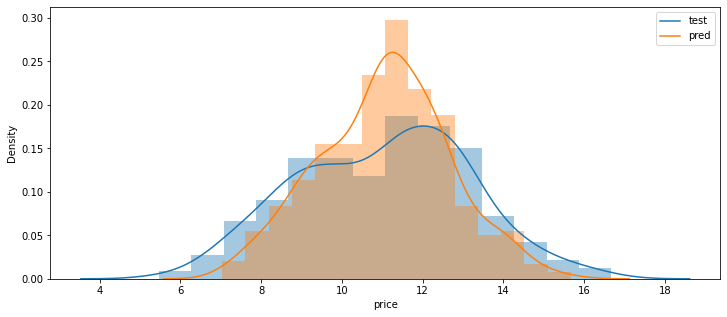

07	total: 12m 6s	remaining: 10.2s
4931:	learn: 0.6551517	total: 12m 6s	remaining: 10s
4932:	learn: 0.6550707	total: 12m 6s	remaining: 9.87s
4933:	learn: 0.6549070	total: 12m 6s	remaining: 9.72s
4934:	learn: 0.6548317	total: 12m 6s	remaining: 9.57s
4935:	learn: 0.6547876	total: 12m 7s	remaining: 9.43s
4936:	learn: 0.6546929	total: 12m 7s	remaining: 9.28s
4937:	learn: 0.6546932	total: 12m 7s	remaining: 9.13s
4938:	learn: 0.6546666	total: 12m 7s	remaining: 8.98s
4939:	learn: 0.6546283	total: 12m 7s	remaining: 8.84s
4940:	learn: 0.6545208	total: 12m 7s	remaining: 8.69s
4941:	learn: 0.6544634	total: 12m 7s	remaining: 8.54s
4942:	learn: 0.6544428	total: 12m 7s	remaining: 8.39s
4943:	learn: 0.6544386	total: 12m 7s	remaining: 8.24s
4944:	learn: 0.6544047	total: 12m 7s	remaining: 8.1s
4945:	learn: 0.6543938	total: 12m 8s	remaining: 7.95s
4946:	learn: 0.6543967	total: 12m 8s	remaining: 7.8s
4947:	learn: 0.6542772	total: 12m 8s	remaining: 7.65s
4948:	learn: 0.6542653	total: 12m 8s	remaining: 7.5s

4899:	learn: 0.3549669	total: 17m 38s	remaining: 21.6s
4900:	learn: 0.3549048	total: 17m 38s	remaining: 21.4s
4901:	learn: 0.3548623	total: 17m 38s	remaining: 21.2s
4902:	learn: 0.3548363	total: 17m 38s	remaining: 20.9s
4903:	learn: 0.3548100	total: 17m 38s	remaining: 20.7s
4904:	learn: 0.3547963	total: 17m 38s	remaining: 20.5s
4905:	learn: 0.3547022	total: 17m 38s	remaining: 20.3s
4906:	learn: 0.3546110	total: 17m 38s	remaining: 20.1s
4907:	learn: 0.3545186	total: 17m 38s	remaining: 19.8s
4908:	learn: 0.3544818	total: 17m 38s	remaining: 19.6s
4909:	learn: 0.3544428	total: 17m 38s	remaining: 19.4s
4910:	learn: 0.3544188	total: 17m 38s	remaining: 19.2s
4911:	learn: 0.3544109	total: 17m 38s	remaining: 19s
4912:	learn: 0.3543426	total: 17m 38s	remaining: 18.8s
4913:	learn: 0.3542617	total: 17m 38s	remaining: 18.5s
4914:	learn: 0.3541968	total: 17m 39s	remaining: 18.3s
4915:	learn: 0.3540486	total: 17m 39s	remaining: 18.1s
4916:	learn: 0.3540162	total: 17m 39s	remaining: 17.9s
4917:	learn:

4983:	learn: 0.4995440	total: 23m 19s	remaining: 4.49s
4984:	learn: 0.4994419	total: 23m 19s	remaining: 4.21s
4985:	learn: 0.4994215	total: 23m 19s	remaining: 3.93s
4986:	learn: 0.4994142	total: 23m 19s	remaining: 3.65s
4987:	learn: 0.4993989	total: 23m 19s	remaining: 3.37s
4988:	learn: 0.4993880	total: 23m 19s	remaining: 3.09s
4989:	learn: 0.4993809	total: 23m 19s	remaining: 2.81s
4990:	learn: 0.4993502	total: 23m 19s	remaining: 2.52s
4991:	learn: 0.4993383	total: 23m 19s	remaining: 2.24s
4992:	learn: 0.4992920	total: 23m 20s	remaining: 1.96s
4993:	learn: 0.4991667	total: 23m 20s	remaining: 1.68s
4994:	learn: 0.4990606	total: 23m 20s	remaining: 1.4s
4995:	learn: 0.4990390	total: 23m 20s	remaining: 1.12s
4996:	learn: 0.4990251	total: 23m 20s	remaining: 841ms
4997:	learn: 0.4990043	total: 23m 20s	remaining: 560ms
4998:	learn: 0.4989525	total: 23m 20s	remaining: 280ms
4999:	learn: 0.4989478	total: 23m 20s	remaining: 0us
[CV 1/5] END depth=4, iterations=5000, learning_rate=0.0656288789744

In [53]:
plt.figure(figsize=(12, 5))
sns.distplot(y_test)
sns.distplot(y_pred)
plt.legend(['test', 'pred'])
plt.show()

In [54]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   2.1426979484361195
RMSE:  1.4637957331663867
R2:    0.5382214155248195
MAE:   1.1255382566211452
MedAE: 0.9073292669397963
------------------------------
